In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'xgboost'

In [2]:
df = pd.read_csv("Data/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'] = df['quality'].replace(3, 7)
df['quality'] = df['quality'].replace(4, 7)
df['quality'] = df['quality'].replace(8, 7)

df.quality.value_counts()

5    681
6    638
7    280
Name: quality, dtype: int64

In [6]:
cols =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [17]:
def remove_outliers(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
#     return lower_range, upper_range    
    for column in cols:
        lr, ur = remove_outliers(df[column])
        df[column] = np.where(df[column]>ur, ur, df[column])
        df[column] = np.where(df[column]<lr, lr, df[column])
    return df

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.322358,0.081194,15.689181,45.714822,0.996742,3.310353,0.649831,10.419627,5.749218
std,1.655860,0.174045,0.194614,0.609493,0.017822,9.837494,30.374029,0.001806,0.149851,0.137086,1.054808,0.733789
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.992248,2.925000,0.330000,8.400000,5.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.915000,3.650000,0.120000,42.000000,122.000000,1.001187,3.685000,1.000000,13.500000,7.000000


In [60]:
X = df.drop("quality", axis=1)

In [61]:
y = df.quality

In [63]:
numeric_feature = MinMaxScaler()
X = numeric_feature.fit_transform(X)

In [64]:
X

array([[0.36129032, 0.64804469, 0.        , ..., 0.76973684, 0.34328358,
        0.19607843],
       [0.41290323, 0.84916201, 0.        , ..., 0.36184211, 0.52238806,
        0.2745098 ],
       [0.41290323, 0.7150838 , 0.04371585, ..., 0.44078947, 0.47761194,
        0.2745098 ],
       ...,
       [0.21935484, 0.43575419, 0.1420765 , ..., 0.65131579, 0.62686567,
        0.50980392],
       [0.16774194, 0.58659218, 0.13114754, ..., 0.84868421, 0.56716418,
        0.35294118],
       [0.18064516, 0.2122905 , 0.5136612 , ..., 0.61184211, 0.49253731,
        0.50980392]])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

In [67]:
y_train.shape, y_test.shape

((1279,), (320,))

In [80]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

### Evaluate Function to give all metrics after model training

In [68]:
# def evaluate_model(true, predicted):
#     mae = mean_absolute_error(true, predicted)
#     mse = mean_squared_error(true, predicted)
#     rmse = np.sqrt(mean_squared_error(true, predicted))
#     r2_squared = r2_score(true, predicted)
#     return mae, rmse, r2_squared

In [81]:
models = {
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'SVC' : SVC(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'XGBClassifier' : XGBClassifier(),
    'CatBoostClassifier' : CatBoostClassifier(verbose=False),
    'AdaBoostClassifier' : AdaBoostClassifier()
}

model_list = []
score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    model_list.append(list(models.keys())[i])
    
    print(f"Model Performance of Training set of {list(models.keys())[i]}")
    print(f"Train Score: {train_score}")
    
    print("------------------------------------------------------------------")
    
    print(f"Model Performance of Test set of {list(models.keys())[i]}")
    print(f"Train Score: {test_score}")
    score_list.append(test_score)
    
    print("="*35)
    print('\n')

Model Performance of Training set of DecisionTreeClassifier
Train Score: 1.0
------------------------------------------------------------------
Model Performance of Test set of DecisionTreeClassifier
Train Score: 0.625


Model Performance of Training set of LogisticRegression
Train Score: 0.6184519155590305
------------------------------------------------------------------
Model Performance of Test set of LogisticRegression
Train Score: 0.575


Model Performance of Training set of KNeighborsClassifier
Train Score: 0.7263487099296325
------------------------------------------------------------------
Model Performance of Test set of KNeighborsClassifier
Train Score: 0.6


Model Performance of Training set of SVC
Train Score: 0.6849100860046912
------------------------------------------------------------------
Model Performance of Test set of SVC
Train Score: 0.6


Model Performance of Training set of RandomForestClassifier
Train Score: 1.0
------------------------------------------------

In [82]:
pd.DataFrame(list(zip(model_list, score_list)), columns=['Model Name', 'Score']).sort_values(by=['Score'], ascending=False, ignore_index=True)

,Model Name,Score
0,CatBoostClassifier,0.734375
1,RandomForestClassifier,0.678125
2,XGBClassifier,0.659375
3,DecisionTreeClassifier,0.625000
4,KNeighborsClassifier,0.600000
5,SVC,0.600000
6,LogisticRegression,0.575000
7,AdaBoostClassifier,0.540625


Now we will doing **Hyperparameter Tuning.** For how to choose best model.

In [168]:
model_params = {
    'svm':{
        'model' : SVC(gamma='auto'),
        'params' :{
            'C' : [1, 10, 20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'random_forest' :{
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' :{
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'C': [1,5,10],
            'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga']
        }
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' :{
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter' : ['best', 'random']
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' :{
            'n_neighbors' : [1,5,11],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['ball_tree', 'kd_tree', 'brute']
        }
    },
    'catboost' :{
        'model' : CatBoostClassifier(),
        'params' : {
            'depth' : [6, 8 ,10],
            'learning_rate' : [.1, .01, .05, .001], 
        }
    },
    'Adaboost' :{
        'model' : AdaBoostClassifier(),
        'params' : {
            'learning_rate' : [.1, .01, .05, .001],
            'n_estimators' : [8, 16, 32, 64, 128, 256]  
        }
    },
    'XGBRegressor' :{
        'model' : XGBClassifier(),
        'params' : {
            'learning_rate' : [.1, .01, .05, .001],
            'n_estimators' : [8, 16, 32, 64, 128, 256]  
        }
    }
}

In [169]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=3)
    clf.fit(X_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_parameter' : clf.best_params_
    })

0:	learn: 1.0651426	total: 8.04ms	remaining: 8.03s
1:	learn: 1.0382558	total: 15.1ms	remaining: 7.54s
2:	learn: 1.0093863	total: 19.4ms	remaining: 6.45s
3:	learn: 0.9867058	total: 23.9ms	remaining: 5.96s
4:	learn: 0.9647716	total: 28.5ms	remaining: 5.67s
5:	learn: 0.9455766	total: 33.5ms	remaining: 5.55s
6:	learn: 0.9301477	total: 38.1ms	remaining: 5.41s
7:	learn: 0.9133381	total: 42.4ms	remaining: 5.26s
8:	learn: 0.8969828	total: 46.8ms	remaining: 5.15s
9:	learn: 0.8792491	total: 51.1ms	remaining: 5.06s
10:	learn: 0.8665895	total: 55.3ms	remaining: 4.98s
11:	learn: 0.8558582	total: 59.6ms	remaining: 4.91s
12:	learn: 0.8441837	total: 64.2ms	remaining: 4.87s
13:	learn: 0.8347981	total: 68ms	remaining: 4.79s
14:	learn: 0.8254226	total: 72.4ms	remaining: 4.75s
15:	learn: 0.8197879	total: 76.6ms	remaining: 4.71s
16:	learn: 0.8110931	total: 81.1ms	remaining: 4.69s
17:	learn: 0.8025562	total: 86ms	remaining: 4.69s
18:	learn: 0.7965549	total: 90.5ms	remaining: 4.67s
19:	learn: 0.7905447	total

193:	learn: 0.3574034	total: 814ms	remaining: 3.38s
194:	learn: 0.3563279	total: 818ms	remaining: 3.38s
195:	learn: 0.3554457	total: 822ms	remaining: 3.37s
196:	learn: 0.3543669	total: 826ms	remaining: 3.37s
197:	learn: 0.3533032	total: 830ms	remaining: 3.36s
198:	learn: 0.3522559	total: 834ms	remaining: 3.36s
199:	learn: 0.3513735	total: 838ms	remaining: 3.35s
200:	learn: 0.3505210	total: 842ms	remaining: 3.35s
201:	learn: 0.3487567	total: 846ms	remaining: 3.34s
202:	learn: 0.3474171	total: 850ms	remaining: 3.34s
203:	learn: 0.3459558	total: 854ms	remaining: 3.33s
204:	learn: 0.3448898	total: 858ms	remaining: 3.33s
205:	learn: 0.3438324	total: 862ms	remaining: 3.32s
206:	learn: 0.3423647	total: 866ms	remaining: 3.32s
207:	learn: 0.3405569	total: 869ms	remaining: 3.31s
208:	learn: 0.3396007	total: 873ms	remaining: 3.31s
209:	learn: 0.3378089	total: 878ms	remaining: 3.3s
210:	learn: 0.3367258	total: 881ms	remaining: 3.29s
211:	learn: 0.3351719	total: 885ms	remaining: 3.29s
212:	learn: 0

390:	learn: 0.1891406	total: 1.6s	remaining: 2.5s
391:	learn: 0.1889337	total: 1.61s	remaining: 2.49s
392:	learn: 0.1882682	total: 1.61s	remaining: 2.49s
393:	learn: 0.1880608	total: 1.61s	remaining: 2.48s
394:	learn: 0.1871514	total: 1.62s	remaining: 2.48s
395:	learn: 0.1868113	total: 1.62s	remaining: 2.48s
396:	learn: 0.1861302	total: 1.63s	remaining: 2.47s
397:	learn: 0.1856415	total: 1.63s	remaining: 2.47s
398:	learn: 0.1853580	total: 1.64s	remaining: 2.46s
399:	learn: 0.1846815	total: 1.64s	remaining: 2.46s
400:	learn: 0.1843295	total: 1.64s	remaining: 2.45s
401:	learn: 0.1838238	total: 1.65s	remaining: 2.45s
402:	learn: 0.1832321	total: 1.65s	remaining: 2.45s
403:	learn: 0.1827122	total: 1.66s	remaining: 2.44s
404:	learn: 0.1821176	total: 1.66s	remaining: 2.44s
405:	learn: 0.1815308	total: 1.66s	remaining: 2.43s
406:	learn: 0.1810731	total: 1.67s	remaining: 2.43s
407:	learn: 0.1805662	total: 1.67s	remaining: 2.42s
408:	learn: 0.1799969	total: 1.68s	remaining: 2.42s
409:	learn: 0.

592:	learn: 0.1162891	total: 2.41s	remaining: 1.65s
593:	learn: 0.1160264	total: 2.42s	remaining: 1.65s
594:	learn: 0.1157501	total: 2.42s	remaining: 1.65s
595:	learn: 0.1154220	total: 2.42s	remaining: 1.64s
596:	learn: 0.1152542	total: 2.43s	remaining: 1.64s
597:	learn: 0.1149874	total: 2.44s	remaining: 1.64s
598:	learn: 0.1146914	total: 2.44s	remaining: 1.64s
599:	learn: 0.1146431	total: 2.45s	remaining: 1.63s
600:	learn: 0.1143451	total: 2.45s	remaining: 1.63s
601:	learn: 0.1141754	total: 2.46s	remaining: 1.62s
602:	learn: 0.1138385	total: 2.46s	remaining: 1.62s
603:	learn: 0.1135932	total: 2.46s	remaining: 1.61s
604:	learn: 0.1132922	total: 2.47s	remaining: 1.61s
605:	learn: 0.1129845	total: 2.47s	remaining: 1.61s
606:	learn: 0.1128281	total: 2.48s	remaining: 1.6s
607:	learn: 0.1125766	total: 2.48s	remaining: 1.6s
608:	learn: 0.1123900	total: 2.48s	remaining: 1.59s
609:	learn: 0.1122601	total: 2.49s	remaining: 1.59s
610:	learn: 0.1120970	total: 2.49s	remaining: 1.59s
611:	learn: 0.

788:	learn: 0.0796168	total: 3.21s	remaining: 860ms
789:	learn: 0.0794446	total: 3.22s	remaining: 856ms
790:	learn: 0.0792557	total: 3.22s	remaining: 852ms
791:	learn: 0.0791781	total: 3.23s	remaining: 848ms
792:	learn: 0.0790590	total: 3.23s	remaining: 843ms
793:	learn: 0.0788676	total: 3.23s	remaining: 840ms
794:	learn: 0.0788274	total: 3.24s	remaining: 835ms
795:	learn: 0.0786741	total: 3.24s	remaining: 831ms
796:	learn: 0.0785984	total: 3.25s	remaining: 827ms
797:	learn: 0.0784650	total: 3.25s	remaining: 823ms
798:	learn: 0.0783316	total: 3.25s	remaining: 819ms
799:	learn: 0.0781739	total: 3.26s	remaining: 815ms
800:	learn: 0.0779884	total: 3.26s	remaining: 811ms
801:	learn: 0.0778013	total: 3.27s	remaining: 807ms
802:	learn: 0.0776191	total: 3.27s	remaining: 803ms
803:	learn: 0.0775224	total: 3.28s	remaining: 799ms
804:	learn: 0.0773126	total: 3.28s	remaining: 795ms
805:	learn: 0.0771571	total: 3.28s	remaining: 790ms
806:	learn: 0.0770351	total: 3.29s	remaining: 786ms
807:	learn: 

983:	learn: 0.0586263	total: 4s	remaining: 65ms
984:	learn: 0.0585575	total: 4s	remaining: 61ms
985:	learn: 0.0584737	total: 4.01s	remaining: 56.9ms
986:	learn: 0.0583527	total: 4.01s	remaining: 52.8ms
987:	learn: 0.0583240	total: 4.01s	remaining: 48.8ms
988:	learn: 0.0582248	total: 4.02s	remaining: 44.7ms
989:	learn: 0.0581629	total: 4.02s	remaining: 40.6ms
990:	learn: 0.0580634	total: 4.03s	remaining: 36.6ms
991:	learn: 0.0579851	total: 4.03s	remaining: 32.5ms
992:	learn: 0.0579168	total: 4.04s	remaining: 28.4ms
993:	learn: 0.0578426	total: 4.04s	remaining: 24.4ms
994:	learn: 0.0577597	total: 4.04s	remaining: 20.3ms
995:	learn: 0.0576411	total: 4.05s	remaining: 16.3ms
996:	learn: 0.0575665	total: 4.05s	remaining: 12.2ms
997:	learn: 0.0575078	total: 4.05s	remaining: 8.13ms
998:	learn: 0.0573938	total: 4.06s	remaining: 4.06ms
999:	learn: 0.0573536	total: 4.06s	remaining: 0us
0:	learn: 1.0659490	total: 6.61ms	remaining: 6.6s
1:	learn: 1.0362715	total: 12ms	remaining: 5.99s
2:	learn: 1.0

151:	learn: 0.4265004	total: 650ms	remaining: 3.62s
152:	learn: 0.4249743	total: 654ms	remaining: 3.62s
153:	learn: 0.4231024	total: 658ms	remaining: 3.62s
154:	learn: 0.4210591	total: 662ms	remaining: 3.61s
155:	learn: 0.4199852	total: 666ms	remaining: 3.6s
156:	learn: 0.4181210	total: 671ms	remaining: 3.6s
157:	learn: 0.4153001	total: 675ms	remaining: 3.6s
158:	learn: 0.4141320	total: 678ms	remaining: 3.59s
159:	learn: 0.4118507	total: 682ms	remaining: 3.58s
160:	learn: 0.4109327	total: 686ms	remaining: 3.57s
161:	learn: 0.4094584	total: 690ms	remaining: 3.57s
162:	learn: 0.4070887	total: 694ms	remaining: 3.56s
163:	learn: 0.4058965	total: 698ms	remaining: 3.56s
164:	learn: 0.4039429	total: 702ms	remaining: 3.55s
165:	learn: 0.4010991	total: 705ms	remaining: 3.54s
166:	learn: 0.3989442	total: 709ms	remaining: 3.54s
167:	learn: 0.3967896	total: 713ms	remaining: 3.53s
168:	learn: 0.3948666	total: 717ms	remaining: 3.53s
169:	learn: 0.3939295	total: 721ms	remaining: 3.52s
170:	learn: 0.3

354:	learn: 0.2160688	total: 1.45s	remaining: 2.63s
355:	learn: 0.2156027	total: 1.45s	remaining: 2.63s
356:	learn: 0.2149620	total: 1.46s	remaining: 2.63s
357:	learn: 0.2142576	total: 1.46s	remaining: 2.62s
358:	learn: 0.2136546	total: 1.47s	remaining: 2.62s
359:	learn: 0.2129014	total: 1.47s	remaining: 2.62s
360:	learn: 0.2120610	total: 1.48s	remaining: 2.61s
361:	learn: 0.2115104	total: 1.48s	remaining: 2.61s
362:	learn: 0.2108981	total: 1.48s	remaining: 2.6s
363:	learn: 0.2103416	total: 1.49s	remaining: 2.6s
364:	learn: 0.2100606	total: 1.49s	remaining: 2.59s
365:	learn: 0.2098639	total: 1.49s	remaining: 2.59s
366:	learn: 0.2093602	total: 1.5s	remaining: 2.58s
367:	learn: 0.2087545	total: 1.5s	remaining: 2.58s
368:	learn: 0.2081493	total: 1.5s	remaining: 2.57s
369:	learn: 0.2077836	total: 1.51s	remaining: 2.57s
370:	learn: 0.2067932	total: 1.51s	remaining: 2.56s
371:	learn: 0.2059742	total: 1.52s	remaining: 2.56s
372:	learn: 0.2055128	total: 1.52s	remaining: 2.56s
373:	learn: 0.204

552:	learn: 0.1322241	total: 2.23s	remaining: 1.8s
553:	learn: 0.1318794	total: 2.23s	remaining: 1.79s
554:	learn: 0.1316267	total: 2.23s	remaining: 1.79s
555:	learn: 0.1312926	total: 2.24s	remaining: 1.79s
556:	learn: 0.1310184	total: 2.24s	remaining: 1.78s
557:	learn: 0.1305896	total: 2.25s	remaining: 1.78s
558:	learn: 0.1302938	total: 2.25s	remaining: 1.77s
559:	learn: 0.1301253	total: 2.25s	remaining: 1.77s
560:	learn: 0.1296073	total: 2.26s	remaining: 1.77s
561:	learn: 0.1294412	total: 2.26s	remaining: 1.76s
562:	learn: 0.1292311	total: 2.27s	remaining: 1.76s
563:	learn: 0.1290093	total: 2.27s	remaining: 1.75s
564:	learn: 0.1288078	total: 2.27s	remaining: 1.75s
565:	learn: 0.1285876	total: 2.28s	remaining: 1.75s
566:	learn: 0.1283233	total: 2.28s	remaining: 1.74s
567:	learn: 0.1280589	total: 2.29s	remaining: 1.74s
568:	learn: 0.1278758	total: 2.29s	remaining: 1.73s
569:	learn: 0.1276811	total: 2.29s	remaining: 1.73s
570:	learn: 0.1271085	total: 2.3s	remaining: 1.73s
571:	learn: 0.

748:	learn: 0.0905946	total: 2.99s	remaining: 1s
749:	learn: 0.0903577	total: 3s	remaining: 998ms
750:	learn: 0.0902432	total: 3s	remaining: 994ms
751:	learn: 0.0901247	total: 3s	remaining: 991ms
752:	learn: 0.0900333	total: 3.01s	remaining: 987ms
753:	learn: 0.0897949	total: 3.01s	remaining: 983ms
754:	learn: 0.0896112	total: 3.02s	remaining: 979ms
755:	learn: 0.0894667	total: 3.02s	remaining: 975ms
756:	learn: 0.0893503	total: 3.02s	remaining: 971ms
757:	learn: 0.0891722	total: 3.03s	remaining: 967ms
758:	learn: 0.0890303	total: 3.03s	remaining: 963ms
759:	learn: 0.0888823	total: 3.04s	remaining: 959ms
760:	learn: 0.0886882	total: 3.04s	remaining: 955ms
761:	learn: 0.0885815	total: 3.04s	remaining: 951ms
762:	learn: 0.0884046	total: 3.05s	remaining: 947ms
763:	learn: 0.0882421	total: 3.05s	remaining: 943ms
764:	learn: 0.0880343	total: 3.06s	remaining: 938ms
765:	learn: 0.0878562	total: 3.06s	remaining: 934ms
766:	learn: 0.0876790	total: 3.06s	remaining: 930ms
767:	learn: 0.0876153	to

941:	learn: 0.0661854	total: 3.78s	remaining: 233ms
942:	learn: 0.0660951	total: 3.78s	remaining: 229ms
943:	learn: 0.0660284	total: 3.79s	remaining: 225ms
944:	learn: 0.0659528	total: 3.79s	remaining: 221ms
945:	learn: 0.0658587	total: 3.79s	remaining: 217ms
946:	learn: 0.0657657	total: 3.8s	remaining: 213ms
947:	learn: 0.0656711	total: 3.8s	remaining: 209ms
948:	learn: 0.0655806	total: 3.81s	remaining: 205ms
949:	learn: 0.0654910	total: 3.81s	remaining: 201ms
950:	learn: 0.0654591	total: 3.81s	remaining: 197ms
951:	learn: 0.0653744	total: 3.82s	remaining: 193ms
952:	learn: 0.0652935	total: 3.82s	remaining: 189ms
953:	learn: 0.0651812	total: 3.83s	remaining: 185ms
954:	learn: 0.0650293	total: 3.83s	remaining: 181ms
955:	learn: 0.0649992	total: 3.83s	remaining: 177ms
956:	learn: 0.0649528	total: 3.84s	remaining: 172ms
957:	learn: 0.0648587	total: 3.84s	remaining: 168ms
958:	learn: 0.0647227	total: 3.85s	remaining: 164ms
959:	learn: 0.0645786	total: 3.85s	remaining: 160ms
960:	learn: 0.

117:	learn: 0.5038812	total: 487ms	remaining: 3.64s
118:	learn: 0.5009805	total: 492ms	remaining: 3.64s
119:	learn: 0.4981601	total: 496ms	remaining: 3.64s
120:	learn: 0.4961024	total: 500ms	remaining: 3.63s
121:	learn: 0.4945876	total: 504ms	remaining: 3.62s
122:	learn: 0.4915054	total: 508ms	remaining: 3.62s
123:	learn: 0.4888315	total: 512ms	remaining: 3.61s
124:	learn: 0.4875970	total: 516ms	remaining: 3.61s
125:	learn: 0.4862494	total: 519ms	remaining: 3.6s
126:	learn: 0.4847090	total: 523ms	remaining: 3.6s
127:	learn: 0.4833434	total: 527ms	remaining: 3.59s
128:	learn: 0.4818232	total: 531ms	remaining: 3.58s
129:	learn: 0.4795162	total: 535ms	remaining: 3.58s
130:	learn: 0.4775459	total: 539ms	remaining: 3.57s
131:	learn: 0.4766767	total: 543ms	remaining: 3.57s
132:	learn: 0.4745976	total: 547ms	remaining: 3.56s
133:	learn: 0.4725963	total: 551ms	remaining: 3.56s
134:	learn: 0.4714757	total: 555ms	remaining: 3.55s
135:	learn: 0.4693558	total: 559ms	remaining: 3.55s
136:	learn: 0.

316:	learn: 0.2475494	total: 1.27s	remaining: 2.75s
317:	learn: 0.2468001	total: 1.28s	remaining: 2.74s
318:	learn: 0.2465739	total: 1.28s	remaining: 2.74s
319:	learn: 0.2454359	total: 1.29s	remaining: 2.73s
320:	learn: 0.2448443	total: 1.29s	remaining: 2.73s
321:	learn: 0.2442877	total: 1.29s	remaining: 2.73s
322:	learn: 0.2431997	total: 1.3s	remaining: 2.72s
323:	learn: 0.2425948	total: 1.3s	remaining: 2.72s
324:	learn: 0.2421876	total: 1.31s	remaining: 2.71s
325:	learn: 0.2414786	total: 1.31s	remaining: 2.71s
326:	learn: 0.2412305	total: 1.31s	remaining: 2.71s
327:	learn: 0.2406652	total: 1.32s	remaining: 2.7s
328:	learn: 0.2401990	total: 1.32s	remaining: 2.7s
329:	learn: 0.2399216	total: 1.33s	remaining: 2.69s
330:	learn: 0.2394430	total: 1.33s	remaining: 2.69s
331:	learn: 0.2384688	total: 1.33s	remaining: 2.69s
332:	learn: 0.2376910	total: 1.34s	remaining: 2.68s
333:	learn: 0.2370356	total: 1.34s	remaining: 2.68s
334:	learn: 0.2359504	total: 1.35s	remaining: 2.67s
335:	learn: 0.23

512:	learn: 0.1483112	total: 2.08s	remaining: 1.98s
513:	learn: 0.1479037	total: 2.09s	remaining: 1.97s
514:	learn: 0.1476736	total: 2.09s	remaining: 1.97s
515:	learn: 0.1473669	total: 2.09s	remaining: 1.96s
516:	learn: 0.1469373	total: 2.1s	remaining: 1.96s
517:	learn: 0.1466075	total: 2.1s	remaining: 1.96s
518:	learn: 0.1462609	total: 2.11s	remaining: 1.95s
519:	learn: 0.1460754	total: 2.11s	remaining: 1.95s
520:	learn: 0.1457796	total: 2.11s	remaining: 1.94s
521:	learn: 0.1455142	total: 2.12s	remaining: 1.94s
522:	learn: 0.1449892	total: 2.12s	remaining: 1.94s
523:	learn: 0.1444826	total: 2.13s	remaining: 1.93s
524:	learn: 0.1441849	total: 2.13s	remaining: 1.93s
525:	learn: 0.1439543	total: 2.13s	remaining: 1.92s
526:	learn: 0.1437021	total: 2.14s	remaining: 1.92s
527:	learn: 0.1433750	total: 2.14s	remaining: 1.91s
528:	learn: 0.1432235	total: 2.15s	remaining: 1.91s
529:	learn: 0.1429577	total: 2.15s	remaining: 1.91s
530:	learn: 0.1427201	total: 2.15s	remaining: 1.9s
531:	learn: 0.1

711:	learn: 0.0993440	total: 2.89s	remaining: 1.17s
712:	learn: 0.0991994	total: 2.89s	remaining: 1.17s
713:	learn: 0.0990763	total: 2.9s	remaining: 1.16s
714:	learn: 0.0988727	total: 2.9s	remaining: 1.16s
715:	learn: 0.0986910	total: 2.91s	remaining: 1.15s
716:	learn: 0.0985434	total: 2.91s	remaining: 1.15s
717:	learn: 0.0983307	total: 2.92s	remaining: 1.15s
718:	learn: 0.0981927	total: 2.92s	remaining: 1.14s
719:	learn: 0.0979886	total: 2.92s	remaining: 1.14s
720:	learn: 0.0978863	total: 2.93s	remaining: 1.13s
721:	learn: 0.0976002	total: 2.93s	remaining: 1.13s
722:	learn: 0.0974129	total: 2.94s	remaining: 1.12s
723:	learn: 0.0972253	total: 2.94s	remaining: 1.12s
724:	learn: 0.0970051	total: 2.94s	remaining: 1.12s
725:	learn: 0.0968744	total: 2.95s	remaining: 1.11s
726:	learn: 0.0967301	total: 2.95s	remaining: 1.11s
727:	learn: 0.0965932	total: 2.96s	remaining: 1.1s
728:	learn: 0.0964833	total: 2.96s	remaining: 1.1s
729:	learn: 0.0963133	total: 2.96s	remaining: 1.1s
730:	learn: 0.096

907:	learn: 0.0707831	total: 3.68s	remaining: 373ms
908:	learn: 0.0706493	total: 3.68s	remaining: 369ms
909:	learn: 0.0705974	total: 3.69s	remaining: 365ms
910:	learn: 0.0704920	total: 3.69s	remaining: 361ms
911:	learn: 0.0703393	total: 3.7s	remaining: 357ms
912:	learn: 0.0702071	total: 3.7s	remaining: 353ms
913:	learn: 0.0700210	total: 3.71s	remaining: 349ms
914:	learn: 0.0699332	total: 3.71s	remaining: 345ms
915:	learn: 0.0698395	total: 3.71s	remaining: 341ms
916:	learn: 0.0697792	total: 3.72s	remaining: 337ms
917:	learn: 0.0697123	total: 3.72s	remaining: 333ms
918:	learn: 0.0695693	total: 3.73s	remaining: 328ms
919:	learn: 0.0694935	total: 3.73s	remaining: 324ms
920:	learn: 0.0693585	total: 3.73s	remaining: 320ms
921:	learn: 0.0692390	total: 3.74s	remaining: 316ms
922:	learn: 0.0691562	total: 3.74s	remaining: 312ms
923:	learn: 0.0690569	total: 3.75s	remaining: 308ms
924:	learn: 0.0689695	total: 3.75s	remaining: 304ms
925:	learn: 0.0688751	total: 3.75s	remaining: 300ms
926:	learn: 0.

97:	learn: 0.8798859	total: 417ms	remaining: 3.84s
98:	learn: 0.8785477	total: 422ms	remaining: 3.84s
99:	learn: 0.8773361	total: 426ms	remaining: 3.83s
100:	learn: 0.8761398	total: 430ms	remaining: 3.82s
101:	learn: 0.8746343	total: 434ms	remaining: 3.82s
102:	learn: 0.8733448	total: 438ms	remaining: 3.81s
103:	learn: 0.8720431	total: 442ms	remaining: 3.81s
104:	learn: 0.8707228	total: 446ms	remaining: 3.8s
105:	learn: 0.8694278	total: 450ms	remaining: 3.79s
106:	learn: 0.8680956	total: 453ms	remaining: 3.78s
107:	learn: 0.8667897	total: 458ms	remaining: 3.78s
108:	learn: 0.8655824	total: 461ms	remaining: 3.77s
109:	learn: 0.8644154	total: 465ms	remaining: 3.76s
110:	learn: 0.8634010	total: 469ms	remaining: 3.76s
111:	learn: 0.8622824	total: 473ms	remaining: 3.75s
112:	learn: 0.8610466	total: 477ms	remaining: 3.74s
113:	learn: 0.8597602	total: 481ms	remaining: 3.73s
114:	learn: 0.8585009	total: 485ms	remaining: 3.73s
115:	learn: 0.8572536	total: 489ms	remaining: 3.72s
116:	learn: 0.85

306:	learn: 0.7240487	total: 1.23s	remaining: 2.78s
307:	learn: 0.7236905	total: 1.24s	remaining: 2.78s
308:	learn: 0.7230784	total: 1.24s	remaining: 2.77s
309:	learn: 0.7227389	total: 1.24s	remaining: 2.77s
310:	learn: 0.7221467	total: 1.25s	remaining: 2.77s
311:	learn: 0.7216320	total: 1.25s	remaining: 2.76s
312:	learn: 0.7210368	total: 1.26s	remaining: 2.76s
313:	learn: 0.7204429	total: 1.26s	remaining: 2.75s
314:	learn: 0.7200124	total: 1.26s	remaining: 2.75s
315:	learn: 0.7195835	total: 1.27s	remaining: 2.75s
316:	learn: 0.7190092	total: 1.27s	remaining: 2.74s
317:	learn: 0.7186445	total: 1.27s	remaining: 2.74s
318:	learn: 0.7181121	total: 1.28s	remaining: 2.73s
319:	learn: 0.7176928	total: 1.28s	remaining: 2.73s
320:	learn: 0.7172843	total: 1.29s	remaining: 2.72s
321:	learn: 0.7167278	total: 1.29s	remaining: 2.72s
322:	learn: 0.7164156	total: 1.29s	remaining: 2.71s
323:	learn: 0.7158544	total: 1.3s	remaining: 2.71s
324:	learn: 0.7153283	total: 1.3s	remaining: 2.71s
325:	learn: 0.

511:	learn: 0.6518730	total: 2.04s	remaining: 1.95s
512:	learn: 0.6514384	total: 2.05s	remaining: 1.94s
513:	learn: 0.6510476	total: 2.05s	remaining: 1.94s
514:	learn: 0.6507935	total: 2.06s	remaining: 1.94s
515:	learn: 0.6504978	total: 2.06s	remaining: 1.93s
516:	learn: 0.6502863	total: 2.06s	remaining: 1.93s
517:	learn: 0.6500655	total: 2.07s	remaining: 1.92s
518:	learn: 0.6497711	total: 2.07s	remaining: 1.92s
519:	learn: 0.6494658	total: 2.08s	remaining: 1.92s
520:	learn: 0.6490534	total: 2.08s	remaining: 1.91s
521:	learn: 0.6487721	total: 2.08s	remaining: 1.91s
522:	learn: 0.6484884	total: 2.09s	remaining: 1.9s
523:	learn: 0.6483250	total: 2.09s	remaining: 1.9s
524:	learn: 0.6481245	total: 2.09s	remaining: 1.9s
525:	learn: 0.6479466	total: 2.1s	remaining: 1.89s
526:	learn: 0.6476912	total: 2.1s	remaining: 1.89s
527:	learn: 0.6474601	total: 2.11s	remaining: 1.88s
528:	learn: 0.6472169	total: 2.11s	remaining: 1.88s
529:	learn: 0.6470131	total: 2.11s	remaining: 1.87s
530:	learn: 0.646

722:	learn: 0.5949017	total: 2.86s	remaining: 1.09s
723:	learn: 0.5946567	total: 2.86s	remaining: 1.09s
724:	learn: 0.5944884	total: 2.86s	remaining: 1.09s
725:	learn: 0.5943088	total: 2.87s	remaining: 1.08s
726:	learn: 0.5939845	total: 2.87s	remaining: 1.08s
727:	learn: 0.5937327	total: 2.88s	remaining: 1.07s
728:	learn: 0.5935459	total: 2.88s	remaining: 1.07s
729:	learn: 0.5932660	total: 2.89s	remaining: 1.07s
730:	learn: 0.5930138	total: 2.89s	remaining: 1.06s
731:	learn: 0.5928263	total: 2.89s	remaining: 1.06s
732:	learn: 0.5924563	total: 2.9s	remaining: 1.05s
733:	learn: 0.5922177	total: 2.9s	remaining: 1.05s
734:	learn: 0.5918522	total: 2.9s	remaining: 1.05s
735:	learn: 0.5915612	total: 2.91s	remaining: 1.04s
736:	learn: 0.5913159	total: 2.91s	remaining: 1.04s
737:	learn: 0.5909474	total: 2.92s	remaining: 1.03s
738:	learn: 0.5906318	total: 2.92s	remaining: 1.03s
739:	learn: 0.5903165	total: 2.92s	remaining: 1.03s
740:	learn: 0.5901733	total: 2.93s	remaining: 1.02s
741:	learn: 0.5

925:	learn: 0.5414172	total: 3.64s	remaining: 291ms
926:	learn: 0.5411912	total: 3.65s	remaining: 287ms
927:	learn: 0.5409827	total: 3.65s	remaining: 283ms
928:	learn: 0.5407851	total: 3.65s	remaining: 279ms
929:	learn: 0.5405257	total: 3.66s	remaining: 275ms
930:	learn: 0.5403439	total: 3.66s	remaining: 272ms
931:	learn: 0.5400149	total: 3.67s	remaining: 268ms
932:	learn: 0.5396525	total: 3.67s	remaining: 264ms
933:	learn: 0.5394288	total: 3.67s	remaining: 260ms
934:	learn: 0.5392298	total: 3.68s	remaining: 256ms
935:	learn: 0.5390247	total: 3.68s	remaining: 252ms
936:	learn: 0.5388025	total: 3.69s	remaining: 248ms
937:	learn: 0.5385983	total: 3.69s	remaining: 244ms
938:	learn: 0.5383476	total: 3.69s	remaining: 240ms
939:	learn: 0.5380992	total: 3.7s	remaining: 236ms
940:	learn: 0.5378348	total: 3.7s	remaining: 232ms
941:	learn: 0.5376310	total: 3.71s	remaining: 228ms
942:	learn: 0.5373512	total: 3.71s	remaining: 224ms
943:	learn: 0.5369608	total: 3.71s	remaining: 220ms
944:	learn: 0.

97:	learn: 0.8839292	total: 430ms	remaining: 3.96s
98:	learn: 0.8827382	total: 435ms	remaining: 3.96s
99:	learn: 0.8814612	total: 439ms	remaining: 3.95s
100:	learn: 0.8801731	total: 443ms	remaining: 3.94s
101:	learn: 0.8789981	total: 447ms	remaining: 3.94s
102:	learn: 0.8778025	total: 451ms	remaining: 3.93s
103:	learn: 0.8766922	total: 455ms	remaining: 3.92s
104:	learn: 0.8753300	total: 459ms	remaining: 3.91s
105:	learn: 0.8742408	total: 463ms	remaining: 3.9s
106:	learn: 0.8732938	total: 467ms	remaining: 3.89s
107:	learn: 0.8719522	total: 470ms	remaining: 3.88s
108:	learn: 0.8708779	total: 474ms	remaining: 3.88s
109:	learn: 0.8698915	total: 478ms	remaining: 3.87s
110:	learn: 0.8684517	total: 482ms	remaining: 3.86s
111:	learn: 0.8672417	total: 486ms	remaining: 3.85s
112:	learn: 0.8661397	total: 490ms	remaining: 3.84s
113:	learn: 0.8651027	total: 493ms	remaining: 3.83s
114:	learn: 0.8638598	total: 497ms	remaining: 3.83s
115:	learn: 0.8628281	total: 501ms	remaining: 3.82s
116:	learn: 0.86

305:	learn: 0.7313611	total: 1.24s	remaining: 2.81s
306:	learn: 0.7310422	total: 1.24s	remaining: 2.81s
307:	learn: 0.7306073	total: 1.25s	remaining: 2.8s
308:	learn: 0.7301457	total: 1.25s	remaining: 2.8s
309:	learn: 0.7297250	total: 1.25s	remaining: 2.79s
310:	learn: 0.7293811	total: 1.26s	remaining: 2.8s
311:	learn: 0.7288461	total: 1.27s	remaining: 2.81s
312:	learn: 0.7283559	total: 1.28s	remaining: 2.81s
313:	learn: 0.7278685	total: 1.28s	remaining: 2.8s
314:	learn: 0.7275370	total: 1.29s	remaining: 2.8s
315:	learn: 0.7271301	total: 1.29s	remaining: 2.79s
316:	learn: 0.7268294	total: 1.29s	remaining: 2.79s
317:	learn: 0.7265905	total: 1.3s	remaining: 2.79s
318:	learn: 0.7262200	total: 1.3s	remaining: 2.78s
319:	learn: 0.7256701	total: 1.31s	remaining: 2.78s
320:	learn: 0.7253514	total: 1.31s	remaining: 2.77s
321:	learn: 0.7249371	total: 1.31s	remaining: 2.77s
322:	learn: 0.7247429	total: 1.32s	remaining: 2.76s
323:	learn: 0.7243662	total: 1.32s	remaining: 2.76s
324:	learn: 0.72379

509:	learn: 0.6590149	total: 2.04s	remaining: 1.96s
510:	learn: 0.6587653	total: 2.05s	remaining: 1.96s
511:	learn: 0.6584584	total: 2.05s	remaining: 1.95s
512:	learn: 0.6581392	total: 2.05s	remaining: 1.95s
513:	learn: 0.6576866	total: 2.06s	remaining: 1.95s
514:	learn: 0.6572897	total: 2.06s	remaining: 1.94s
515:	learn: 0.6569460	total: 2.07s	remaining: 1.94s
516:	learn: 0.6567728	total: 2.07s	remaining: 1.94s
517:	learn: 0.6566180	total: 2.08s	remaining: 1.93s
518:	learn: 0.6563780	total: 2.08s	remaining: 1.93s
519:	learn: 0.6560584	total: 2.08s	remaining: 1.92s
520:	learn: 0.6557214	total: 2.09s	remaining: 1.92s
521:	learn: 0.6554137	total: 2.09s	remaining: 1.91s
522:	learn: 0.6552062	total: 2.09s	remaining: 1.91s
523:	learn: 0.6550502	total: 2.1s	remaining: 1.91s
524:	learn: 0.6548059	total: 2.1s	remaining: 1.9s
525:	learn: 0.6545690	total: 2.1s	remaining: 1.9s
526:	learn: 0.6542222	total: 2.11s	remaining: 1.89s
527:	learn: 0.6538821	total: 2.11s	remaining: 1.89s
528:	learn: 0.653

715:	learn: 0.6034601	total: 2.84s	remaining: 1.13s
716:	learn: 0.6032115	total: 2.85s	remaining: 1.12s
717:	learn: 0.6030100	total: 2.85s	remaining: 1.12s
718:	learn: 0.6028052	total: 2.86s	remaining: 1.12s
719:	learn: 0.6025797	total: 2.86s	remaining: 1.11s
720:	learn: 0.6024493	total: 2.86s	remaining: 1.11s
721:	learn: 0.6022248	total: 2.87s	remaining: 1.1s
722:	learn: 0.6018976	total: 2.87s	remaining: 1.1s
723:	learn: 0.6017866	total: 2.88s	remaining: 1.1s
724:	learn: 0.6013073	total: 2.88s	remaining: 1.09s
725:	learn: 0.6011243	total: 2.88s	remaining: 1.09s
726:	learn: 0.6007876	total: 2.89s	remaining: 1.08s
727:	learn: 0.6004824	total: 2.89s	remaining: 1.08s
728:	learn: 0.6000831	total: 2.9s	remaining: 1.08s
729:	learn: 0.5998375	total: 2.9s	remaining: 1.07s
730:	learn: 0.5995366	total: 2.9s	remaining: 1.07s
731:	learn: 0.5993288	total: 2.91s	remaining: 1.06s
732:	learn: 0.5990555	total: 2.91s	remaining: 1.06s
733:	learn: 0.5988897	total: 2.92s	remaining: 1.06s
734:	learn: 0.5986

923:	learn: 0.5502735	total: 3.65s	remaining: 300ms
924:	learn: 0.5501501	total: 3.65s	remaining: 296ms
925:	learn: 0.5498341	total: 3.66s	remaining: 292ms
926:	learn: 0.5494838	total: 3.66s	remaining: 288ms
927:	learn: 0.5492108	total: 3.67s	remaining: 284ms
928:	learn: 0.5490268	total: 3.67s	remaining: 281ms
929:	learn: 0.5488550	total: 3.67s	remaining: 277ms
930:	learn: 0.5485421	total: 3.68s	remaining: 273ms
931:	learn: 0.5482270	total: 3.68s	remaining: 269ms
932:	learn: 0.5480331	total: 3.69s	remaining: 265ms
933:	learn: 0.5478355	total: 3.69s	remaining: 261ms
934:	learn: 0.5476601	total: 3.69s	remaining: 257ms
935:	learn: 0.5473101	total: 3.7s	remaining: 253ms
936:	learn: 0.5470490	total: 3.7s	remaining: 249ms
937:	learn: 0.5467374	total: 3.71s	remaining: 245ms
938:	learn: 0.5464539	total: 3.71s	remaining: 241ms
939:	learn: 0.5462593	total: 3.71s	remaining: 237ms
940:	learn: 0.5460413	total: 3.72s	remaining: 233ms
941:	learn: 0.5457488	total: 3.72s	remaining: 229ms
942:	learn: 0.

103:	learn: 0.8934703	total: 418ms	remaining: 3.6s
104:	learn: 0.8922285	total: 423ms	remaining: 3.6s
105:	learn: 0.8912676	total: 427ms	remaining: 3.6s
106:	learn: 0.8900027	total: 431ms	remaining: 3.6s
107:	learn: 0.8888659	total: 435ms	remaining: 3.6s
108:	learn: 0.8877048	total: 439ms	remaining: 3.59s
109:	learn: 0.8868058	total: 444ms	remaining: 3.59s
110:	learn: 0.8858359	total: 448ms	remaining: 3.59s
111:	learn: 0.8848673	total: 452ms	remaining: 3.58s
112:	learn: 0.8836764	total: 456ms	remaining: 3.58s
113:	learn: 0.8827215	total: 459ms	remaining: 3.57s
114:	learn: 0.8817050	total: 463ms	remaining: 3.56s
115:	learn: 0.8806842	total: 467ms	remaining: 3.56s
116:	learn: 0.8797022	total: 471ms	remaining: 3.55s
117:	learn: 0.8785705	total: 474ms	remaining: 3.54s
118:	learn: 0.8773777	total: 478ms	remaining: 3.54s
119:	learn: 0.8767480	total: 482ms	remaining: 3.53s
120:	learn: 0.8756022	total: 486ms	remaining: 3.53s
121:	learn: 0.8745517	total: 490ms	remaining: 3.52s
122:	learn: 0.873

306:	learn: 0.7524925	total: 1.21s	remaining: 2.73s
307:	learn: 0.7520980	total: 1.21s	remaining: 2.73s
308:	learn: 0.7516392	total: 1.22s	remaining: 2.73s
309:	learn: 0.7514403	total: 1.22s	remaining: 2.72s
310:	learn: 0.7510682	total: 1.23s	remaining: 2.72s
311:	learn: 0.7504512	total: 1.24s	remaining: 2.74s
312:	learn: 0.7500743	total: 1.25s	remaining: 2.74s
313:	learn: 0.7496298	total: 1.25s	remaining: 2.73s
314:	learn: 0.7491935	total: 1.25s	remaining: 2.73s
315:	learn: 0.7487614	total: 1.26s	remaining: 2.73s
316:	learn: 0.7482482	total: 1.26s	remaining: 2.72s
317:	learn: 0.7478345	total: 1.27s	remaining: 2.72s
318:	learn: 0.7471422	total: 1.27s	remaining: 2.71s
319:	learn: 0.7467188	total: 1.27s	remaining: 2.71s
320:	learn: 0.7464460	total: 1.28s	remaining: 2.71s
321:	learn: 0.7459845	total: 1.28s	remaining: 2.7s
322:	learn: 0.7456189	total: 1.29s	remaining: 2.7s
323:	learn: 0.7451749	total: 1.29s	remaining: 2.69s
324:	learn: 0.7448101	total: 1.29s	remaining: 2.69s
325:	learn: 0.

505:	learn: 0.6812219	total: 2s	remaining: 1.95s
506:	learn: 0.6809203	total: 2s	remaining: 1.95s
507:	learn: 0.6806387	total: 2.01s	remaining: 1.94s
508:	learn: 0.6804275	total: 2.01s	remaining: 1.94s
509:	learn: 0.6801510	total: 2.02s	remaining: 1.94s
510:	learn: 0.6798525	total: 2.02s	remaining: 1.93s
511:	learn: 0.6795184	total: 2.02s	remaining: 1.93s
512:	learn: 0.6792100	total: 2.03s	remaining: 1.93s
513:	learn: 0.6788179	total: 2.03s	remaining: 1.92s
514:	learn: 0.6785985	total: 2.04s	remaining: 1.92s
515:	learn: 0.6783786	total: 2.04s	remaining: 1.91s
516:	learn: 0.6781204	total: 2.04s	remaining: 1.91s
517:	learn: 0.6779141	total: 2.05s	remaining: 1.91s
518:	learn: 0.6776016	total: 2.05s	remaining: 1.9s
519:	learn: 0.6772693	total: 2.06s	remaining: 1.9s
520:	learn: 0.6770131	total: 2.06s	remaining: 1.89s
521:	learn: 0.6768853	total: 2.06s	remaining: 1.89s
522:	learn: 0.6767095	total: 2.07s	remaining: 1.89s
523:	learn: 0.6764384	total: 2.07s	remaining: 1.88s
524:	learn: 0.676143

714:	learn: 0.6219241	total: 2.81s	remaining: 1.12s
715:	learn: 0.6217153	total: 2.82s	remaining: 1.12s
716:	learn: 0.6214313	total: 2.82s	remaining: 1.11s
717:	learn: 0.6210628	total: 2.83s	remaining: 1.11s
718:	learn: 0.6208047	total: 2.83s	remaining: 1.11s
719:	learn: 0.6205039	total: 2.83s	remaining: 1.1s
720:	learn: 0.6203034	total: 2.84s	remaining: 1.1s
721:	learn: 0.6197999	total: 2.84s	remaining: 1.09s
722:	learn: 0.6195095	total: 2.85s	remaining: 1.09s
723:	learn: 0.6192783	total: 2.85s	remaining: 1.09s
724:	learn: 0.6189120	total: 2.85s	remaining: 1.08s
725:	learn: 0.6187217	total: 2.86s	remaining: 1.08s
726:	learn: 0.6184480	total: 2.86s	remaining: 1.07s
727:	learn: 0.6182367	total: 2.87s	remaining: 1.07s
728:	learn: 0.6180108	total: 2.87s	remaining: 1.07s
729:	learn: 0.6176863	total: 2.87s	remaining: 1.06s
730:	learn: 0.6174859	total: 2.88s	remaining: 1.06s
731:	learn: 0.6171973	total: 2.88s	remaining: 1.05s
732:	learn: 0.6169015	total: 2.88s	remaining: 1.05s
733:	learn: 0.

919:	learn: 0.5659713	total: 3.61s	remaining: 314ms
920:	learn: 0.5658088	total: 3.61s	remaining: 310ms
921:	learn: 0.5654979	total: 3.62s	remaining: 306ms
922:	learn: 0.5652847	total: 3.62s	remaining: 302ms
923:	learn: 0.5650412	total: 3.63s	remaining: 298ms
924:	learn: 0.5646829	total: 3.63s	remaining: 294ms
925:	learn: 0.5643978	total: 3.63s	remaining: 291ms
926:	learn: 0.5641766	total: 3.64s	remaining: 287ms
927:	learn: 0.5639141	total: 3.64s	remaining: 283ms
928:	learn: 0.5636132	total: 3.65s	remaining: 279ms
929:	learn: 0.5632982	total: 3.65s	remaining: 275ms
930:	learn: 0.5630073	total: 3.65s	remaining: 271ms
931:	learn: 0.5626866	total: 3.66s	remaining: 267ms
932:	learn: 0.5623478	total: 3.66s	remaining: 263ms
933:	learn: 0.5622343	total: 3.67s	remaining: 259ms
934:	learn: 0.5620185	total: 3.67s	remaining: 255ms
935:	learn: 0.5617245	total: 3.67s	remaining: 251ms
936:	learn: 0.5614109	total: 3.68s	remaining: 247ms
937:	learn: 0.5611820	total: 3.68s	remaining: 243ms
938:	learn: 

94:	learn: 0.6683246	total: 422ms	remaining: 4.02s
95:	learn: 0.6675591	total: 427ms	remaining: 4.02s
96:	learn: 0.6654226	total: 430ms	remaining: 4.01s
97:	learn: 0.6644487	total: 434ms	remaining: 4s
98:	learn: 0.6627718	total: 438ms	remaining: 3.99s
99:	learn: 0.6617007	total: 442ms	remaining: 3.98s
100:	learn: 0.6603286	total: 447ms	remaining: 3.98s
101:	learn: 0.6589806	total: 451ms	remaining: 3.97s
102:	learn: 0.6565806	total: 455ms	remaining: 3.96s
103:	learn: 0.6553943	total: 459ms	remaining: 3.95s
104:	learn: 0.6542160	total: 463ms	remaining: 3.94s
105:	learn: 0.6533114	total: 467ms	remaining: 3.93s
106:	learn: 0.6517751	total: 470ms	remaining: 3.92s
107:	learn: 0.6514063	total: 474ms	remaining: 3.92s
108:	learn: 0.6500214	total: 478ms	remaining: 3.91s
109:	learn: 0.6482148	total: 482ms	remaining: 3.9s
110:	learn: 0.6471942	total: 486ms	remaining: 3.89s
111:	learn: 0.6449535	total: 489ms	remaining: 3.88s
112:	learn: 0.6439721	total: 493ms	remaining: 3.87s
113:	learn: 0.6434046	

305:	learn: 0.4181597	total: 1.24s	remaining: 2.81s
306:	learn: 0.4172545	total: 1.24s	remaining: 2.81s
307:	learn: 0.4160365	total: 1.25s	remaining: 2.8s
308:	learn: 0.4154719	total: 1.25s	remaining: 2.8s
309:	learn: 0.4145286	total: 1.25s	remaining: 2.79s
310:	learn: 0.4134594	total: 1.26s	remaining: 2.79s
311:	learn: 0.4124468	total: 1.27s	remaining: 2.81s
312:	learn: 0.4110124	total: 1.28s	remaining: 2.81s
313:	learn: 0.4097653	total: 1.28s	remaining: 2.81s
314:	learn: 0.4089343	total: 1.29s	remaining: 2.8s
315:	learn: 0.4082284	total: 1.29s	remaining: 2.8s
316:	learn: 0.4076303	total: 1.3s	remaining: 2.8s
317:	learn: 0.4063834	total: 1.3s	remaining: 2.79s
318:	learn: 0.4056322	total: 1.3s	remaining: 2.79s
319:	learn: 0.4050725	total: 1.31s	remaining: 2.78s
320:	learn: 0.4044616	total: 1.31s	remaining: 2.78s
321:	learn: 0.4038514	total: 1.32s	remaining: 2.77s
322:	learn: 0.4033367	total: 1.32s	remaining: 2.77s
323:	learn: 0.4025244	total: 1.32s	remaining: 2.76s
324:	learn: 0.401543

509:	learn: 0.2866525	total: 2.05s	remaining: 1.97s
510:	learn: 0.2861304	total: 2.05s	remaining: 1.96s
511:	learn: 0.2858234	total: 2.06s	remaining: 1.96s
512:	learn: 0.2851058	total: 2.06s	remaining: 1.96s
513:	learn: 0.2843669	total: 2.06s	remaining: 1.95s
514:	learn: 0.2840718	total: 2.07s	remaining: 1.95s
515:	learn: 0.2833555	total: 2.07s	remaining: 1.94s
516:	learn: 0.2826821	total: 2.08s	remaining: 1.94s
517:	learn: 0.2818410	total: 2.08s	remaining: 1.94s
518:	learn: 0.2815167	total: 2.08s	remaining: 1.93s
519:	learn: 0.2808871	total: 2.09s	remaining: 1.93s
520:	learn: 0.2806733	total: 2.09s	remaining: 1.92s
521:	learn: 0.2801831	total: 2.1s	remaining: 1.92s
522:	learn: 0.2799733	total: 2.1s	remaining: 1.91s
523:	learn: 0.2793689	total: 2.1s	remaining: 1.91s
524:	learn: 0.2788828	total: 2.11s	remaining: 1.91s
525:	learn: 0.2783810	total: 2.11s	remaining: 1.9s
526:	learn: 0.2779977	total: 2.11s	remaining: 1.9s
527:	learn: 0.2777414	total: 2.12s	remaining: 1.89s
528:	learn: 0.277

714:	learn: 0.2055670	total: 2.84s	remaining: 1.13s
715:	learn: 0.2053500	total: 2.85s	remaining: 1.13s
716:	learn: 0.2050867	total: 2.85s	remaining: 1.13s
717:	learn: 0.2045899	total: 2.86s	remaining: 1.12s
718:	learn: 0.2042100	total: 2.86s	remaining: 1.12s
719:	learn: 0.2040130	total: 2.86s	remaining: 1.11s
720:	learn: 0.2037656	total: 2.87s	remaining: 1.11s
721:	learn: 0.2033814	total: 2.87s	remaining: 1.11s
722:	learn: 0.2030714	total: 2.88s	remaining: 1.1s
723:	learn: 0.2027643	total: 2.88s	remaining: 1.1s
724:	learn: 0.2024349	total: 2.88s	remaining: 1.09s
725:	learn: 0.2019357	total: 2.89s	remaining: 1.09s
726:	learn: 0.2016412	total: 2.89s	remaining: 1.09s
727:	learn: 0.2013808	total: 2.9s	remaining: 1.08s
728:	learn: 0.2011156	total: 2.9s	remaining: 1.08s
729:	learn: 0.2008855	total: 2.9s	remaining: 1.07s
730:	learn: 0.2006811	total: 2.91s	remaining: 1.07s
731:	learn: 0.2003387	total: 2.91s	remaining: 1.06s
732:	learn: 0.2000976	total: 2.92s	remaining: 1.06s
733:	learn: 0.199

926:	learn: 0.1528512	total: 3.67s	remaining: 289ms
927:	learn: 0.1525787	total: 3.67s	remaining: 285ms
928:	learn: 0.1523775	total: 3.68s	remaining: 281ms
929:	learn: 0.1520844	total: 3.68s	remaining: 277ms
930:	learn: 0.1518820	total: 3.69s	remaining: 273ms
931:	learn: 0.1516329	total: 3.69s	remaining: 269ms
932:	learn: 0.1513874	total: 3.69s	remaining: 265ms
933:	learn: 0.1511578	total: 3.7s	remaining: 261ms
934:	learn: 0.1509519	total: 3.7s	remaining: 257ms
935:	learn: 0.1508709	total: 3.71s	remaining: 253ms
936:	learn: 0.1506295	total: 3.71s	remaining: 250ms
937:	learn: 0.1504462	total: 3.71s	remaining: 246ms
938:	learn: 0.1502244	total: 3.72s	remaining: 242ms
939:	learn: 0.1500413	total: 3.72s	remaining: 238ms
940:	learn: 0.1498730	total: 3.73s	remaining: 234ms
941:	learn: 0.1497562	total: 3.73s	remaining: 230ms
942:	learn: 0.1495955	total: 3.73s	remaining: 226ms
943:	learn: 0.1494102	total: 3.74s	remaining: 222ms
944:	learn: 0.1492795	total: 3.74s	remaining: 218ms
945:	learn: 0.

98:	learn: 0.6702084	total: 429ms	remaining: 3.91s
99:	learn: 0.6682547	total: 434ms	remaining: 3.9s
100:	learn: 0.6671494	total: 438ms	remaining: 3.9s
101:	learn: 0.6649621	total: 442ms	remaining: 3.89s
102:	learn: 0.6630587	total: 446ms	remaining: 3.88s
103:	learn: 0.6608643	total: 450ms	remaining: 3.88s
104:	learn: 0.6599069	total: 454ms	remaining: 3.87s
105:	learn: 0.6586818	total: 458ms	remaining: 3.86s
106:	learn: 0.6576294	total: 462ms	remaining: 3.86s
107:	learn: 0.6556689	total: 466ms	remaining: 3.85s
108:	learn: 0.6545081	total: 470ms	remaining: 3.84s
109:	learn: 0.6527715	total: 474ms	remaining: 3.84s
110:	learn: 0.6514240	total: 478ms	remaining: 3.83s
111:	learn: 0.6497493	total: 482ms	remaining: 3.82s
112:	learn: 0.6479032	total: 486ms	remaining: 3.81s
113:	learn: 0.6469416	total: 490ms	remaining: 3.81s
114:	learn: 0.6455674	total: 494ms	remaining: 3.8s
115:	learn: 0.6436660	total: 497ms	remaining: 3.79s
116:	learn: 0.6425452	total: 501ms	remaining: 3.78s
117:	learn: 0.640

295:	learn: 0.4379585	total: 1.2s	remaining: 2.85s
296:	learn: 0.4370080	total: 1.2s	remaining: 2.85s
297:	learn: 0.4358096	total: 1.21s	remaining: 2.85s
298:	learn: 0.4348822	total: 1.21s	remaining: 2.84s
299:	learn: 0.4338235	total: 1.22s	remaining: 2.84s
300:	learn: 0.4332580	total: 1.22s	remaining: 2.83s
301:	learn: 0.4322662	total: 1.22s	remaining: 2.83s
302:	learn: 0.4314403	total: 1.23s	remaining: 2.83s
303:	learn: 0.4307001	total: 1.23s	remaining: 2.82s
304:	learn: 0.4299868	total: 1.24s	remaining: 2.82s
305:	learn: 0.4290997	total: 1.24s	remaining: 2.81s
306:	learn: 0.4283885	total: 1.24s	remaining: 2.81s
307:	learn: 0.4278342	total: 1.25s	remaining: 2.81s
308:	learn: 0.4271679	total: 1.25s	remaining: 2.8s
309:	learn: 0.4263181	total: 1.26s	remaining: 2.8s
310:	learn: 0.4254769	total: 1.26s	remaining: 2.79s
311:	learn: 0.4238085	total: 1.26s	remaining: 2.79s
312:	learn: 0.4234583	total: 1.27s	remaining: 2.79s
313:	learn: 0.4225745	total: 1.27s	remaining: 2.78s
314:	learn: 0.42

500:	learn: 0.3024244	total: 2.01s	remaining: 2s
501:	learn: 0.3022153	total: 2.02s	remaining: 2s
502:	learn: 0.3015946	total: 2.02s	remaining: 2s
503:	learn: 0.3010181	total: 2.02s	remaining: 1.99s
504:	learn: 0.3005892	total: 2.03s	remaining: 1.99s
505:	learn: 0.2999485	total: 2.03s	remaining: 1.99s
506:	learn: 0.2994079	total: 2.04s	remaining: 1.98s
507:	learn: 0.2992561	total: 2.04s	remaining: 1.98s
508:	learn: 0.2987949	total: 2.04s	remaining: 1.97s
509:	learn: 0.2981936	total: 2.05s	remaining: 1.97s
510:	learn: 0.2976341	total: 2.05s	remaining: 1.96s
511:	learn: 0.2970363	total: 2.06s	remaining: 1.96s
512:	learn: 0.2964994	total: 2.06s	remaining: 1.96s
513:	learn: 0.2960983	total: 2.06s	remaining: 1.95s
514:	learn: 0.2955585	total: 2.07s	remaining: 1.95s
515:	learn: 0.2947900	total: 2.07s	remaining: 1.94s
516:	learn: 0.2943699	total: 2.08s	remaining: 1.94s
517:	learn: 0.2934179	total: 2.08s	remaining: 1.94s
518:	learn: 0.2925441	total: 2.08s	remaining: 1.93s
519:	learn: 0.2922397

705:	learn: 0.2187907	total: 2.82s	remaining: 1.18s
706:	learn: 0.2183232	total: 2.83s	remaining: 1.17s
707:	learn: 0.2180797	total: 2.83s	remaining: 1.17s
708:	learn: 0.2177829	total: 2.84s	remaining: 1.16s
709:	learn: 0.2172951	total: 2.84s	remaining: 1.16s
710:	learn: 0.2171057	total: 2.85s	remaining: 1.16s
711:	learn: 0.2168090	total: 2.85s	remaining: 1.15s
712:	learn: 0.2165625	total: 2.85s	remaining: 1.15s
713:	learn: 0.2162646	total: 2.86s	remaining: 1.14s
714:	learn: 0.2159726	total: 2.86s	remaining: 1.14s
715:	learn: 0.2158324	total: 2.86s	remaining: 1.14s
716:	learn: 0.2155172	total: 2.87s	remaining: 1.13s
717:	learn: 0.2151938	total: 2.87s	remaining: 1.13s
718:	learn: 0.2148564	total: 2.88s	remaining: 1.12s
719:	learn: 0.2146439	total: 2.88s	remaining: 1.12s
720:	learn: 0.2143558	total: 2.88s	remaining: 1.12s
721:	learn: 0.2141386	total: 2.89s	remaining: 1.11s
722:	learn: 0.2139794	total: 2.89s	remaining: 1.11s
723:	learn: 0.2136238	total: 2.9s	remaining: 1.1s
724:	learn: 0.

911:	learn: 0.1680129	total: 3.63s	remaining: 350ms
912:	learn: 0.1677760	total: 3.63s	remaining: 346ms
913:	learn: 0.1675125	total: 3.64s	remaining: 342ms
914:	learn: 0.1673011	total: 3.64s	remaining: 338ms
915:	learn: 0.1671231	total: 3.65s	remaining: 334ms
916:	learn: 0.1669738	total: 3.65s	remaining: 330ms
917:	learn: 0.1667142	total: 3.65s	remaining: 326ms
918:	learn: 0.1663989	total: 3.66s	remaining: 322ms
919:	learn: 0.1662029	total: 3.66s	remaining: 318ms
920:	learn: 0.1659556	total: 3.67s	remaining: 314ms
921:	learn: 0.1658519	total: 3.67s	remaining: 310ms
922:	learn: 0.1656244	total: 3.67s	remaining: 306ms
923:	learn: 0.1654614	total: 3.68s	remaining: 302ms
924:	learn: 0.1653456	total: 3.68s	remaining: 298ms
925:	learn: 0.1651670	total: 3.68s	remaining: 294ms
926:	learn: 0.1649342	total: 3.69s	remaining: 290ms
927:	learn: 0.1647405	total: 3.69s	remaining: 287ms
928:	learn: 0.1645629	total: 3.7s	remaining: 283ms
929:	learn: 0.1644086	total: 3.7s	remaining: 279ms
930:	learn: 0.

91:	learn: 0.7009855	total: 393ms	remaining: 3.88s
92:	learn: 0.6995024	total: 397ms	remaining: 3.87s
93:	learn: 0.6979757	total: 401ms	remaining: 3.86s
94:	learn: 0.6958911	total: 405ms	remaining: 3.85s
95:	learn: 0.6943675	total: 409ms	remaining: 3.85s
96:	learn: 0.6928230	total: 413ms	remaining: 3.84s
97:	learn: 0.6912145	total: 416ms	remaining: 3.83s
98:	learn: 0.6900269	total: 420ms	remaining: 3.83s
99:	learn: 0.6893482	total: 424ms	remaining: 3.82s
100:	learn: 0.6878958	total: 428ms	remaining: 3.81s
101:	learn: 0.6862531	total: 432ms	remaining: 3.8s
102:	learn: 0.6846412	total: 435ms	remaining: 3.79s
103:	learn: 0.6829592	total: 439ms	remaining: 3.79s
104:	learn: 0.6815104	total: 443ms	remaining: 3.78s
105:	learn: 0.6795619	total: 447ms	remaining: 3.77s
106:	learn: 0.6780543	total: 451ms	remaining: 3.76s
107:	learn: 0.6773427	total: 454ms	remaining: 3.75s
108:	learn: 0.6762700	total: 458ms	remaining: 3.75s
109:	learn: 0.6747271	total: 462ms	remaining: 3.74s
110:	learn: 0.6732116	

299:	learn: 0.4449944	total: 1.2s	remaining: 2.8s
300:	learn: 0.4438980	total: 1.2s	remaining: 2.79s
301:	learn: 0.4431834	total: 1.21s	remaining: 2.79s
302:	learn: 0.4422821	total: 1.21s	remaining: 2.79s
303:	learn: 0.4412828	total: 1.22s	remaining: 2.78s
304:	learn: 0.4402000	total: 1.22s	remaining: 2.78s
305:	learn: 0.4393315	total: 1.22s	remaining: 2.77s
306:	learn: 0.4382829	total: 1.23s	remaining: 2.77s
307:	learn: 0.4373988	total: 1.23s	remaining: 2.77s
308:	learn: 0.4364899	total: 1.24s	remaining: 2.76s
309:	learn: 0.4358106	total: 1.24s	remaining: 2.76s
310:	learn: 0.4344345	total: 1.24s	remaining: 2.75s
311:	learn: 0.4340043	total: 1.25s	remaining: 2.75s
312:	learn: 0.4334418	total: 1.25s	remaining: 2.74s
313:	learn: 0.4328076	total: 1.25s	remaining: 2.74s
314:	learn: 0.4319873	total: 1.26s	remaining: 2.73s
315:	learn: 0.4310761	total: 1.26s	remaining: 2.73s
316:	learn: 0.4303557	total: 1.26s	remaining: 2.73s
317:	learn: 0.4296059	total: 1.27s	remaining: 2.72s
318:	learn: 0.4

507:	learn: 0.3021939	total: 2s	remaining: 1.94s
508:	learn: 0.3015343	total: 2.01s	remaining: 1.94s
509:	learn: 0.3008804	total: 2.01s	remaining: 1.93s
510:	learn: 0.3005255	total: 2.01s	remaining: 1.93s
511:	learn: 0.3002807	total: 2.02s	remaining: 1.92s
512:	learn: 0.2996740	total: 2.04s	remaining: 1.93s
513:	learn: 0.2994617	total: 2.04s	remaining: 1.93s
514:	learn: 0.2990015	total: 2.04s	remaining: 1.93s
515:	learn: 0.2986287	total: 2.05s	remaining: 1.92s
516:	learn: 0.2983665	total: 2.05s	remaining: 1.92s
517:	learn: 0.2978127	total: 2.06s	remaining: 1.91s
518:	learn: 0.2973156	total: 2.06s	remaining: 1.91s
519:	learn: 0.2970599	total: 2.06s	remaining: 1.91s
520:	learn: 0.2964852	total: 2.07s	remaining: 1.9s
521:	learn: 0.2958156	total: 2.07s	remaining: 1.9s
522:	learn: 0.2948138	total: 2.08s	remaining: 1.89s
523:	learn: 0.2940217	total: 2.08s	remaining: 1.89s
524:	learn: 0.2937584	total: 2.08s	remaining: 1.89s
525:	learn: 0.2933244	total: 2.09s	remaining: 1.88s
526:	learn: 0.293

710:	learn: 0.2210918	total: 2.81s	remaining: 1.14s
711:	learn: 0.2207496	total: 2.81s	remaining: 1.14s
712:	learn: 0.2204990	total: 2.81s	remaining: 1.13s
713:	learn: 0.2201922	total: 2.82s	remaining: 1.13s
714:	learn: 0.2197444	total: 2.82s	remaining: 1.13s
715:	learn: 0.2194628	total: 2.83s	remaining: 1.12s
716:	learn: 0.2191626	total: 2.83s	remaining: 1.12s
717:	learn: 0.2186760	total: 2.83s	remaining: 1.11s
718:	learn: 0.2183943	total: 2.84s	remaining: 1.11s
719:	learn: 0.2180256	total: 2.84s	remaining: 1.1s
720:	learn: 0.2178241	total: 2.85s	remaining: 1.1s
721:	learn: 0.2172748	total: 2.85s	remaining: 1.1s
722:	learn: 0.2169529	total: 2.85s	remaining: 1.09s
723:	learn: 0.2166237	total: 2.86s	remaining: 1.09s
724:	learn: 0.2163471	total: 2.86s	remaining: 1.08s
725:	learn: 0.2160928	total: 2.87s	remaining: 1.08s
726:	learn: 0.2156967	total: 2.87s	remaining: 1.08s
727:	learn: 0.2152734	total: 2.87s	remaining: 1.07s
728:	learn: 0.2148678	total: 2.88s	remaining: 1.07s
729:	learn: 0.2

913:	learn: 0.1671188	total: 3.6s	remaining: 338ms
914:	learn: 0.1669093	total: 3.6s	remaining: 335ms
915:	learn: 0.1667289	total: 3.6s	remaining: 331ms
916:	learn: 0.1665523	total: 3.61s	remaining: 327ms
917:	learn: 0.1664173	total: 3.61s	remaining: 323ms
918:	learn: 0.1661605	total: 3.62s	remaining: 319ms
919:	learn: 0.1660247	total: 3.62s	remaining: 315ms
920:	learn: 0.1658445	total: 3.63s	remaining: 311ms
921:	learn: 0.1656137	total: 3.63s	remaining: 307ms
922:	learn: 0.1654165	total: 3.63s	remaining: 303ms
923:	learn: 0.1651869	total: 3.64s	remaining: 299ms
924:	learn: 0.1649689	total: 3.64s	remaining: 295ms
925:	learn: 0.1648112	total: 3.65s	remaining: 291ms
926:	learn: 0.1646331	total: 3.65s	remaining: 287ms
927:	learn: 0.1644469	total: 3.65s	remaining: 283ms
928:	learn: 0.1643696	total: 3.66s	remaining: 279ms
929:	learn: 0.1641759	total: 3.66s	remaining: 276ms
930:	learn: 0.1639224	total: 3.66s	remaining: 272ms
931:	learn: 0.1636589	total: 3.67s	remaining: 268ms
932:	learn: 0.1

87:	learn: 1.0676050	total: 411ms	remaining: 4.26s
88:	learn: 1.0673103	total: 415ms	remaining: 4.25s
89:	learn: 1.0669509	total: 419ms	remaining: 4.24s
90:	learn: 1.0666203	total: 424ms	remaining: 4.23s
91:	learn: 1.0662990	total: 427ms	remaining: 4.22s
92:	learn: 1.0659971	total: 432ms	remaining: 4.21s
93:	learn: 1.0657203	total: 436ms	remaining: 4.2s
94:	learn: 1.0653769	total: 440ms	remaining: 4.2s
95:	learn: 1.0650056	total: 444ms	remaining: 4.18s
96:	learn: 1.0647438	total: 448ms	remaining: 4.17s
97:	learn: 1.0644034	total: 452ms	remaining: 4.16s
98:	learn: 1.0640665	total: 456ms	remaining: 4.15s
99:	learn: 1.0637358	total: 460ms	remaining: 4.14s
100:	learn: 1.0633917	total: 464ms	remaining: 4.13s
101:	learn: 1.0630414	total: 468ms	remaining: 4.12s
102:	learn: 1.0626979	total: 472ms	remaining: 4.11s
103:	learn: 1.0623139	total: 475ms	remaining: 4.09s
104:	learn: 1.0619767	total: 479ms	remaining: 4.09s
105:	learn: 1.0616057	total: 483ms	remaining: 4.08s
106:	learn: 1.0612993	total

292:	learn: 1.0080141	total: 1.23s	remaining: 2.97s
293:	learn: 1.0077710	total: 1.23s	remaining: 2.96s
294:	learn: 1.0075229	total: 1.24s	remaining: 2.96s
295:	learn: 1.0072119	total: 1.24s	remaining: 2.95s
296:	learn: 1.0069478	total: 1.25s	remaining: 2.95s
297:	learn: 1.0067095	total: 1.25s	remaining: 2.94s
298:	learn: 1.0064245	total: 1.25s	remaining: 2.94s
299:	learn: 1.0061440	total: 1.26s	remaining: 2.94s
300:	learn: 1.0059505	total: 1.26s	remaining: 2.93s
301:	learn: 1.0057176	total: 1.26s	remaining: 2.92s
302:	learn: 1.0054331	total: 1.27s	remaining: 2.92s
303:	learn: 1.0051740	total: 1.27s	remaining: 2.92s
304:	learn: 1.0048997	total: 1.28s	remaining: 2.91s
305:	learn: 1.0046653	total: 1.28s	remaining: 2.91s
306:	learn: 1.0043963	total: 1.28s	remaining: 2.9s
307:	learn: 1.0041516	total: 1.29s	remaining: 2.89s
308:	learn: 1.0038859	total: 1.29s	remaining: 2.89s
309:	learn: 1.0036338	total: 1.29s	remaining: 2.88s
310:	learn: 1.0033564	total: 1.3s	remaining: 2.88s
311:	learn: 1.

502:	learn: 0.9595877	total: 2.04s	remaining: 2.02s
503:	learn: 0.9594016	total: 2.05s	remaining: 2.02s
504:	learn: 0.9591821	total: 2.05s	remaining: 2.01s
505:	learn: 0.9589996	total: 2.06s	remaining: 2.01s
506:	learn: 0.9588063	total: 2.06s	remaining: 2s
507:	learn: 0.9586306	total: 2.06s	remaining: 2s
508:	learn: 0.9584256	total: 2.07s	remaining: 2s
509:	learn: 0.9582613	total: 2.07s	remaining: 1.99s
510:	learn: 0.9580698	total: 2.08s	remaining: 1.99s
511:	learn: 0.9578977	total: 2.08s	remaining: 1.98s
512:	learn: 0.9576782	total: 2.08s	remaining: 1.98s
513:	learn: 0.9574743	total: 2.09s	remaining: 1.98s
514:	learn: 0.9572810	total: 2.09s	remaining: 1.97s
515:	learn: 0.9570626	total: 2.1s	remaining: 1.97s
516:	learn: 0.9568558	total: 2.1s	remaining: 1.96s
517:	learn: 0.9566629	total: 2.1s	remaining: 1.96s
518:	learn: 0.9564548	total: 2.11s	remaining: 1.95s
519:	learn: 0.9562514	total: 2.11s	remaining: 1.95s
520:	learn: 0.9560805	total: 2.12s	remaining: 1.95s
521:	learn: 0.9558786	to

704:	learn: 0.9222175	total: 2.83s	remaining: 1.19s
705:	learn: 0.9219952	total: 2.84s	remaining: 1.18s
706:	learn: 0.9218453	total: 2.84s	remaining: 1.18s
707:	learn: 0.9216751	total: 2.85s	remaining: 1.17s
708:	learn: 0.9214785	total: 2.85s	remaining: 1.17s
709:	learn: 0.9213176	total: 2.85s	remaining: 1.17s
710:	learn: 0.9211687	total: 2.87s	remaining: 1.17s
711:	learn: 0.9209969	total: 2.88s	remaining: 1.16s
712:	learn: 0.9208270	total: 2.88s	remaining: 1.16s
713:	learn: 0.9206556	total: 2.89s	remaining: 1.16s
714:	learn: 0.9204604	total: 2.89s	remaining: 1.15s
715:	learn: 0.9202964	total: 2.9s	remaining: 1.15s
716:	learn: 0.9201246	total: 2.9s	remaining: 1.14s
717:	learn: 0.9199873	total: 2.9s	remaining: 1.14s
718:	learn: 0.9197850	total: 2.91s	remaining: 1.14s
719:	learn: 0.9196161	total: 2.91s	remaining: 1.13s
720:	learn: 0.9194548	total: 2.92s	remaining: 1.13s
721:	learn: 0.9193104	total: 2.92s	remaining: 1.12s
722:	learn: 0.9191213	total: 2.92s	remaining: 1.12s
723:	learn: 0.9

909:	learn: 0.8903413	total: 3.65s	remaining: 361ms
910:	learn: 0.8902146	total: 3.66s	remaining: 357ms
911:	learn: 0.8900553	total: 3.66s	remaining: 353ms
912:	learn: 0.8899172	total: 3.67s	remaining: 349ms
913:	learn: 0.8897711	total: 3.67s	remaining: 345ms
914:	learn: 0.8896485	total: 3.67s	remaining: 341ms
915:	learn: 0.8894995	total: 3.68s	remaining: 337ms
916:	learn: 0.8893430	total: 3.68s	remaining: 333ms
917:	learn: 0.8892080	total: 3.69s	remaining: 329ms
918:	learn: 0.8890549	total: 3.69s	remaining: 325ms
919:	learn: 0.8889168	total: 3.69s	remaining: 321ms
920:	learn: 0.8887733	total: 3.7s	remaining: 317ms
921:	learn: 0.8886409	total: 3.7s	remaining: 313ms
922:	learn: 0.8884929	total: 3.71s	remaining: 309ms
923:	learn: 0.8883411	total: 3.71s	remaining: 305ms
924:	learn: 0.8881920	total: 3.71s	remaining: 301ms
925:	learn: 0.8880420	total: 3.72s	remaining: 297ms
926:	learn: 0.8879148	total: 3.72s	remaining: 293ms
927:	learn: 0.8877708	total: 3.73s	remaining: 289ms
928:	learn: 0.

89:	learn: 1.0677258	total: 400ms	remaining: 4.05s
90:	learn: 1.0674431	total: 405ms	remaining: 4.04s
91:	learn: 1.0671267	total: 409ms	remaining: 4.03s
92:	learn: 1.0668099	total: 413ms	remaining: 4.03s
93:	learn: 1.0665035	total: 417ms	remaining: 4.02s
94:	learn: 1.0662031	total: 421ms	remaining: 4.01s
95:	learn: 1.0658474	total: 425ms	remaining: 4s
96:	learn: 1.0655147	total: 429ms	remaining: 4s
97:	learn: 1.0652001	total: 434ms	remaining: 3.99s
98:	learn: 1.0649077	total: 438ms	remaining: 3.98s
99:	learn: 1.0646000	total: 442ms	remaining: 3.97s
100:	learn: 1.0642690	total: 446ms	remaining: 3.97s
101:	learn: 1.0639613	total: 449ms	remaining: 3.96s
102:	learn: 1.0636435	total: 453ms	remaining: 3.95s
103:	learn: 1.0633745	total: 458ms	remaining: 3.94s
104:	learn: 1.0630487	total: 461ms	remaining: 3.93s
105:	learn: 1.0627552	total: 466ms	remaining: 3.93s
106:	learn: 1.0624295	total: 469ms	remaining: 3.92s
107:	learn: 1.0621211	total: 473ms	remaining: 3.91s
108:	learn: 1.0618213	total: 

290:	learn: 1.0111091	total: 1.2s	remaining: 2.91s
291:	learn: 1.0108651	total: 1.2s	remaining: 2.91s
292:	learn: 1.0106390	total: 1.21s	remaining: 2.91s
293:	learn: 1.0104354	total: 1.21s	remaining: 2.9s
294:	learn: 1.0101314	total: 1.21s	remaining: 2.9s
295:	learn: 1.0098407	total: 1.22s	remaining: 2.9s
296:	learn: 1.0095364	total: 1.22s	remaining: 2.89s
297:	learn: 1.0092726	total: 1.23s	remaining: 2.89s
298:	learn: 1.0090111	total: 1.23s	remaining: 2.88s
299:	learn: 1.0087300	total: 1.23s	remaining: 2.88s
300:	learn: 1.0085080	total: 1.24s	remaining: 2.87s
301:	learn: 1.0082457	total: 1.24s	remaining: 2.87s
302:	learn: 1.0079684	total: 1.25s	remaining: 2.86s
303:	learn: 1.0077480	total: 1.25s	remaining: 2.86s
304:	learn: 1.0075394	total: 1.25s	remaining: 2.85s
305:	learn: 1.0073108	total: 1.26s	remaining: 2.85s
306:	learn: 1.0070810	total: 1.26s	remaining: 2.85s
307:	learn: 1.0068585	total: 1.26s	remaining: 2.84s
308:	learn: 1.0065892	total: 1.27s	remaining: 2.84s
309:	learn: 1.006

491:	learn: 0.9655550	total: 1.99s	remaining: 2.05s
492:	learn: 0.9653299	total: 1.99s	remaining: 2.05s
493:	learn: 0.9651505	total: 2s	remaining: 2.04s
494:	learn: 0.9649358	total: 2s	remaining: 2.04s
495:	learn: 0.9647132	total: 2s	remaining: 2.04s
496:	learn: 0.9644978	total: 2.01s	remaining: 2.03s
497:	learn: 0.9642789	total: 2.01s	remaining: 2.03s
498:	learn: 0.9640834	total: 2.02s	remaining: 2.02s
499:	learn: 0.9638920	total: 2.02s	remaining: 2.02s
500:	learn: 0.9636691	total: 2.02s	remaining: 2.02s
501:	learn: 0.9634764	total: 2.03s	remaining: 2.01s
502:	learn: 0.9632895	total: 2.03s	remaining: 2.01s
503:	learn: 0.9630823	total: 2.04s	remaining: 2.01s
504:	learn: 0.9628577	total: 2.04s	remaining: 2s
505:	learn: 0.9626832	total: 2.05s	remaining: 2s
506:	learn: 0.9625079	total: 2.05s	remaining: 1.99s
507:	learn: 0.9623180	total: 2.06s	remaining: 1.99s
508:	learn: 0.9621016	total: 2.06s	remaining: 1.99s
509:	learn: 0.9618762	total: 2.06s	remaining: 1.98s
510:	learn: 0.9616657	total

686:	learn: 0.9296477	total: 2.78s	remaining: 1.27s
687:	learn: 0.9294958	total: 2.79s	remaining: 1.26s
688:	learn: 0.9293390	total: 2.79s	remaining: 1.26s
689:	learn: 0.9292175	total: 2.79s	remaining: 1.25s
690:	learn: 0.9290309	total: 2.8s	remaining: 1.25s
691:	learn: 0.9288360	total: 2.8s	remaining: 1.25s
692:	learn: 0.9286810	total: 2.81s	remaining: 1.24s
693:	learn: 0.9285098	total: 2.81s	remaining: 1.24s
694:	learn: 0.9283553	total: 2.81s	remaining: 1.23s
695:	learn: 0.9281920	total: 2.82s	remaining: 1.23s
696:	learn: 0.9280550	total: 2.82s	remaining: 1.23s
697:	learn: 0.9278535	total: 2.83s	remaining: 1.22s
698:	learn: 0.9276565	total: 2.83s	remaining: 1.22s
699:	learn: 0.9274567	total: 2.83s	remaining: 1.21s
700:	learn: 0.9273038	total: 2.84s	remaining: 1.21s
701:	learn: 0.9271346	total: 2.84s	remaining: 1.21s
702:	learn: 0.9269500	total: 2.85s	remaining: 1.2s
703:	learn: 0.9267621	total: 2.85s	remaining: 1.2s
704:	learn: 0.9265550	total: 2.85s	remaining: 1.19s
705:	learn: 0.92

877:	learn: 0.8999051	total: 3.56s	remaining: 495ms
878:	learn: 0.8997591	total: 3.57s	remaining: 491ms
879:	learn: 0.8996157	total: 3.57s	remaining: 487ms
880:	learn: 0.8994662	total: 3.58s	remaining: 483ms
881:	learn: 0.8993332	total: 3.58s	remaining: 479ms
882:	learn: 0.8992087	total: 3.58s	remaining: 475ms
883:	learn: 0.8990791	total: 3.59s	remaining: 471ms
884:	learn: 0.8989296	total: 3.59s	remaining: 467ms
885:	learn: 0.8987957	total: 3.6s	remaining: 463ms
886:	learn: 0.8986610	total: 3.6s	remaining: 459ms
887:	learn: 0.8985041	total: 3.6s	remaining: 455ms
888:	learn: 0.8983695	total: 3.61s	remaining: 451ms
889:	learn: 0.8982137	total: 3.61s	remaining: 447ms
890:	learn: 0.8980616	total: 3.62s	remaining: 443ms
891:	learn: 0.8979079	total: 3.62s	remaining: 438ms
892:	learn: 0.8977401	total: 3.63s	remaining: 434ms
893:	learn: 0.8975960	total: 3.63s	remaining: 430ms
894:	learn: 0.8974734	total: 3.63s	remaining: 426ms
895:	learn: 0.8973509	total: 3.64s	remaining: 422ms
896:	learn: 0.8

43:	learn: 1.0846231	total: 205ms	remaining: 4.45s
44:	learn: 1.0843179	total: 209ms	remaining: 4.44s
45:	learn: 1.0839792	total: 214ms	remaining: 4.43s
46:	learn: 1.0836984	total: 218ms	remaining: 4.43s
47:	learn: 1.0834007	total: 222ms	remaining: 4.4s
48:	learn: 1.0830483	total: 226ms	remaining: 4.39s
49:	learn: 1.0827258	total: 230ms	remaining: 4.37s
50:	learn: 1.0824441	total: 234ms	remaining: 4.36s
51:	learn: 1.0821444	total: 238ms	remaining: 4.34s
52:	learn: 1.0818647	total: 242ms	remaining: 4.33s
53:	learn: 1.0815517	total: 246ms	remaining: 4.31s
54:	learn: 1.0812783	total: 250ms	remaining: 4.29s
55:	learn: 1.0809389	total: 254ms	remaining: 4.28s
56:	learn: 1.0806298	total: 257ms	remaining: 4.26s
57:	learn: 1.0803032	total: 262ms	remaining: 4.25s
58:	learn: 1.0799956	total: 266ms	remaining: 4.24s
59:	learn: 1.0796768	total: 270ms	remaining: 4.22s
60:	learn: 1.0793476	total: 274ms	remaining: 4.21s
61:	learn: 1.0790153	total: 277ms	remaining: 4.2s
62:	learn: 1.0787412	total: 281ms

238:	learn: 1.0304868	total: 994ms	remaining: 3.17s
239:	learn: 1.0302803	total: 999ms	remaining: 3.16s
240:	learn: 1.0300364	total: 1s	remaining: 3.16s
241:	learn: 1.0297727	total: 1.01s	remaining: 3.15s
242:	learn: 1.0295368	total: 1.01s	remaining: 3.15s
243:	learn: 1.0292972	total: 1.01s	remaining: 3.14s
244:	learn: 1.0290627	total: 1.02s	remaining: 3.14s
245:	learn: 1.0288143	total: 1.02s	remaining: 3.14s
246:	learn: 1.0286192	total: 1.03s	remaining: 3.13s
247:	learn: 1.0283885	total: 1.03s	remaining: 3.13s
248:	learn: 1.0281538	total: 1.03s	remaining: 3.12s
249:	learn: 1.0279294	total: 1.04s	remaining: 3.12s
250:	learn: 1.0276830	total: 1.04s	remaining: 3.11s
251:	learn: 1.0274437	total: 1.05s	remaining: 3.11s
252:	learn: 1.0272119	total: 1.05s	remaining: 3.1s
253:	learn: 1.0269751	total: 1.05s	remaining: 3.1s
254:	learn: 1.0267060	total: 1.06s	remaining: 3.09s
255:	learn: 1.0264227	total: 1.06s	remaining: 3.09s
256:	learn: 1.0261682	total: 1.07s	remaining: 3.08s
257:	learn: 1.025

435:	learn: 0.9866055	total: 1.77s	remaining: 2.3s
436:	learn: 0.9864106	total: 1.78s	remaining: 2.29s
437:	learn: 0.9861944	total: 1.78s	remaining: 2.29s
438:	learn: 0.9860098	total: 1.79s	remaining: 2.28s
439:	learn: 0.9858456	total: 1.79s	remaining: 2.28s
440:	learn: 0.9856145	total: 1.79s	remaining: 2.28s
441:	learn: 0.9854001	total: 1.8s	remaining: 2.27s
442:	learn: 0.9852066	total: 1.8s	remaining: 2.27s
443:	learn: 0.9850267	total: 1.81s	remaining: 2.26s
444:	learn: 0.9847993	total: 1.81s	remaining: 2.26s
445:	learn: 0.9845754	total: 1.81s	remaining: 2.25s
446:	learn: 0.9843675	total: 1.82s	remaining: 2.25s
447:	learn: 0.9841717	total: 1.82s	remaining: 2.25s
448:	learn: 0.9839959	total: 1.83s	remaining: 2.24s
449:	learn: 0.9837685	total: 1.83s	remaining: 2.24s
450:	learn: 0.9835809	total: 1.83s	remaining: 2.23s
451:	learn: 0.9834002	total: 1.84s	remaining: 2.23s
452:	learn: 0.9832081	total: 1.84s	remaining: 2.22s
453:	learn: 0.9830351	total: 1.84s	remaining: 2.22s
454:	learn: 0.9

636:	learn: 0.9504179	total: 2.57s	remaining: 1.46s
637:	learn: 0.9502422	total: 2.57s	remaining: 1.46s
638:	learn: 0.9500967	total: 2.58s	remaining: 1.46s
639:	learn: 0.9499318	total: 2.58s	remaining: 1.45s
640:	learn: 0.9497686	total: 2.58s	remaining: 1.45s
641:	learn: 0.9496196	total: 2.59s	remaining: 1.44s
642:	learn: 0.9494613	total: 2.59s	remaining: 1.44s
643:	learn: 0.9492805	total: 2.6s	remaining: 1.44s
644:	learn: 0.9490961	total: 2.6s	remaining: 1.43s
645:	learn: 0.9489099	total: 2.61s	remaining: 1.43s
646:	learn: 0.9487318	total: 2.61s	remaining: 1.42s
647:	learn: 0.9485555	total: 2.62s	remaining: 1.42s
648:	learn: 0.9484249	total: 2.62s	remaining: 1.42s
649:	learn: 0.9482601	total: 2.62s	remaining: 1.41s
650:	learn: 0.9481038	total: 2.63s	remaining: 1.41s
651:	learn: 0.9479729	total: 2.63s	remaining: 1.4s
652:	learn: 0.9478144	total: 2.63s	remaining: 1.4s
653:	learn: 0.9476703	total: 2.64s	remaining: 1.4s
654:	learn: 0.9475355	total: 2.64s	remaining: 1.39s
655:	learn: 0.947

834:	learn: 0.9203934	total: 3.36s	remaining: 664ms
835:	learn: 0.9202623	total: 3.37s	remaining: 660ms
836:	learn: 0.9201345	total: 3.37s	remaining: 656ms
837:	learn: 0.9199979	total: 3.37s	remaining: 652ms
838:	learn: 0.9198920	total: 3.38s	remaining: 648ms
839:	learn: 0.9197369	total: 3.38s	remaining: 644ms
840:	learn: 0.9196291	total: 3.38s	remaining: 640ms
841:	learn: 0.9194893	total: 3.39s	remaining: 636ms
842:	learn: 0.9193463	total: 3.39s	remaining: 632ms
843:	learn: 0.9191909	total: 3.4s	remaining: 628ms
844:	learn: 0.9190863	total: 3.4s	remaining: 624ms
845:	learn: 0.9189698	total: 3.4s	remaining: 620ms
846:	learn: 0.9188119	total: 3.41s	remaining: 616ms
847:	learn: 0.9186592	total: 3.41s	remaining: 612ms
848:	learn: 0.9184935	total: 3.42s	remaining: 608ms
849:	learn: 0.9183595	total: 3.42s	remaining: 603ms
850:	learn: 0.9182355	total: 3.42s	remaining: 599ms
851:	learn: 0.9181044	total: 3.43s	remaining: 595ms
852:	learn: 0.9179747	total: 3.43s	remaining: 591ms
853:	learn: 0.9

1:	learn: 1.0304157	total: 46.9ms	remaining: 23.4s
2:	learn: 1.0015067	total: 64.8ms	remaining: 21.5s
3:	learn: 0.9718707	total: 83.4ms	remaining: 20.8s
4:	learn: 0.9531822	total: 103ms	remaining: 20.5s
5:	learn: 0.9318354	total: 121ms	remaining: 20.1s
6:	learn: 0.9107913	total: 140ms	remaining: 19.8s
7:	learn: 0.8922572	total: 159ms	remaining: 19.7s
8:	learn: 0.8758370	total: 178ms	remaining: 19.6s
9:	learn: 0.8609961	total: 199ms	remaining: 19.7s
10:	learn: 0.8473077	total: 217ms	remaining: 19.5s
11:	learn: 0.8325418	total: 235ms	remaining: 19.3s
12:	learn: 0.8191994	total: 254ms	remaining: 19.3s
13:	learn: 0.8051597	total: 272ms	remaining: 19.1s
14:	learn: 0.7942971	total: 291ms	remaining: 19.1s
15:	learn: 0.7830435	total: 309ms	remaining: 19s
16:	learn: 0.7731823	total: 326ms	remaining: 18.9s
17:	learn: 0.7642529	total: 344ms	remaining: 18.8s
18:	learn: 0.7550205	total: 361ms	remaining: 18.7s
19:	learn: 0.7458849	total: 408ms	remaining: 20s
20:	learn: 0.7376087	total: 424ms	remaini

166:	learn: 0.2727857	total: 2.79s	remaining: 13.9s
167:	learn: 0.2716987	total: 2.81s	remaining: 13.9s
168:	learn: 0.2702789	total: 2.82s	remaining: 13.9s
169:	learn: 0.2687693	total: 2.84s	remaining: 13.9s
170:	learn: 0.2669230	total: 2.85s	remaining: 13.8s
171:	learn: 0.2654938	total: 2.87s	remaining: 13.8s
172:	learn: 0.2645360	total: 2.88s	remaining: 13.8s
173:	learn: 0.2633058	total: 2.9s	remaining: 13.8s
174:	learn: 0.2619810	total: 2.92s	remaining: 13.7s
175:	learn: 0.2607341	total: 2.93s	remaining: 13.7s
176:	learn: 0.2592886	total: 2.95s	remaining: 13.7s
177:	learn: 0.2573776	total: 2.97s	remaining: 13.7s
178:	learn: 0.2557062	total: 2.98s	remaining: 13.7s
179:	learn: 0.2540738	total: 3s	remaining: 13.7s
180:	learn: 0.2522690	total: 3.02s	remaining: 13.7s
181:	learn: 0.2508677	total: 3.03s	remaining: 13.6s
182:	learn: 0.2497732	total: 3.05s	remaining: 13.6s
183:	learn: 0.2484713	total: 3.06s	remaining: 13.6s
184:	learn: 0.2475542	total: 3.08s	remaining: 13.6s
185:	learn: 0.24

334:	learn: 0.1267251	total: 5.49s	remaining: 10.9s
335:	learn: 0.1262307	total: 5.51s	remaining: 10.9s
336:	learn: 0.1256701	total: 5.53s	remaining: 10.9s
337:	learn: 0.1250929	total: 5.54s	remaining: 10.9s
338:	learn: 0.1247141	total: 5.56s	remaining: 10.8s
339:	learn: 0.1242931	total: 5.58s	remaining: 10.8s
340:	learn: 0.1239023	total: 5.59s	remaining: 10.8s
341:	learn: 0.1232972	total: 5.61s	remaining: 10.8s
342:	learn: 0.1231262	total: 5.62s	remaining: 10.8s
343:	learn: 0.1227158	total: 5.64s	remaining: 10.7s
344:	learn: 0.1223189	total: 5.65s	remaining: 10.7s
345:	learn: 0.1218297	total: 5.67s	remaining: 10.7s
346:	learn: 0.1214242	total: 5.68s	remaining: 10.7s
347:	learn: 0.1209153	total: 5.7s	remaining: 10.7s
348:	learn: 0.1204646	total: 5.71s	remaining: 10.7s
349:	learn: 0.1200224	total: 5.73s	remaining: 10.6s
350:	learn: 0.1194477	total: 5.75s	remaining: 10.6s
351:	learn: 0.1190205	total: 5.76s	remaining: 10.6s
352:	learn: 0.1184746	total: 5.78s	remaining: 10.6s
353:	learn: 0

493:	learn: 0.0766561	total: 8.07s	remaining: 8.26s
494:	learn: 0.0765087	total: 8.08s	remaining: 8.25s
495:	learn: 0.0763144	total: 8.1s	remaining: 8.23s
496:	learn: 0.0760152	total: 8.11s	remaining: 8.21s
497:	learn: 0.0758499	total: 8.13s	remaining: 8.2s
498:	learn: 0.0756895	total: 8.14s	remaining: 8.18s
499:	learn: 0.0754268	total: 8.16s	remaining: 8.16s
500:	learn: 0.0751802	total: 8.18s	remaining: 8.14s
501:	learn: 0.0749671	total: 8.19s	remaining: 8.13s
502:	learn: 0.0747134	total: 8.21s	remaining: 8.11s
503:	learn: 0.0745466	total: 8.22s	remaining: 8.09s
504:	learn: 0.0744375	total: 8.23s	remaining: 8.07s
505:	learn: 0.0742550	total: 8.25s	remaining: 8.05s
506:	learn: 0.0740603	total: 8.27s	remaining: 8.04s
507:	learn: 0.0739030	total: 8.28s	remaining: 8.02s
508:	learn: 0.0737176	total: 8.3s	remaining: 8.01s
509:	learn: 0.0735113	total: 8.31s	remaining: 7.99s
510:	learn: 0.0733794	total: 8.33s	remaining: 7.97s
511:	learn: 0.0731343	total: 8.35s	remaining: 7.96s
512:	learn: 0.0

653:	learn: 0.0535691	total: 10.6s	remaining: 5.62s
654:	learn: 0.0534484	total: 10.6s	remaining: 5.6s
655:	learn: 0.0533044	total: 10.7s	remaining: 5.59s
656:	learn: 0.0531668	total: 10.7s	remaining: 5.57s
657:	learn: 0.0530440	total: 10.7s	remaining: 5.56s
658:	learn: 0.0529667	total: 10.7s	remaining: 5.54s
659:	learn: 0.0528798	total: 10.7s	remaining: 5.52s
660:	learn: 0.0527503	total: 10.7s	remaining: 5.51s
661:	learn: 0.0526777	total: 10.8s	remaining: 5.49s
662:	learn: 0.0526008	total: 10.8s	remaining: 5.47s
663:	learn: 0.0525328	total: 10.8s	remaining: 5.46s
664:	learn: 0.0524333	total: 10.8s	remaining: 5.44s
665:	learn: 0.0523103	total: 10.8s	remaining: 5.43s
666:	learn: 0.0522213	total: 10.8s	remaining: 5.41s
667:	learn: 0.0521185	total: 10.9s	remaining: 5.39s
668:	learn: 0.0520379	total: 10.9s	remaining: 5.38s
669:	learn: 0.0519331	total: 10.9s	remaining: 5.36s
670:	learn: 0.0518423	total: 10.9s	remaining: 5.34s
671:	learn: 0.0518014	total: 10.9s	remaining: 5.33s
672:	learn: 0

816:	learn: 0.0401561	total: 13.2s	remaining: 2.96s
817:	learn: 0.0400800	total: 13.2s	remaining: 2.94s
818:	learn: 0.0400320	total: 13.2s	remaining: 2.92s
819:	learn: 0.0399780	total: 13.2s	remaining: 2.91s
820:	learn: 0.0399187	total: 13.3s	remaining: 2.89s
821:	learn: 0.0398634	total: 13.3s	remaining: 2.88s
822:	learn: 0.0398166	total: 13.3s	remaining: 2.86s
823:	learn: 0.0397729	total: 13.3s	remaining: 2.84s
824:	learn: 0.0396879	total: 13.3s	remaining: 2.83s
825:	learn: 0.0396175	total: 13.3s	remaining: 2.81s
826:	learn: 0.0395459	total: 13.4s	remaining: 2.79s
827:	learn: 0.0394830	total: 13.4s	remaining: 2.78s
828:	learn: 0.0393850	total: 13.4s	remaining: 2.76s
829:	learn: 0.0393235	total: 13.4s	remaining: 2.74s
830:	learn: 0.0392614	total: 13.4s	remaining: 2.73s
831:	learn: 0.0392131	total: 13.4s	remaining: 2.71s
832:	learn: 0.0391395	total: 13.4s	remaining: 2.69s
833:	learn: 0.0390783	total: 13.5s	remaining: 2.68s
834:	learn: 0.0390111	total: 13.5s	remaining: 2.66s
835:	learn: 

978:	learn: 0.0314739	total: 15.7s	remaining: 338ms
979:	learn: 0.0314388	total: 15.8s	remaining: 322ms
980:	learn: 0.0314142	total: 15.8s	remaining: 306ms
981:	learn: 0.0313736	total: 15.8s	remaining: 289ms
982:	learn: 0.0313252	total: 15.8s	remaining: 273ms
983:	learn: 0.0312906	total: 15.8s	remaining: 257ms
984:	learn: 0.0312413	total: 15.8s	remaining: 241ms
985:	learn: 0.0311985	total: 15.9s	remaining: 225ms
986:	learn: 0.0311366	total: 15.9s	remaining: 209ms
987:	learn: 0.0311024	total: 15.9s	remaining: 193ms
988:	learn: 0.0310582	total: 15.9s	remaining: 177ms
989:	learn: 0.0310184	total: 15.9s	remaining: 161ms
990:	learn: 0.0309940	total: 15.9s	remaining: 145ms
991:	learn: 0.0309623	total: 15.9s	remaining: 129ms
992:	learn: 0.0309181	total: 16s	remaining: 113ms
993:	learn: 0.0308852	total: 16s	remaining: 96.5ms
994:	learn: 0.0308468	total: 16s	remaining: 80.4ms
995:	learn: 0.0308063	total: 16s	remaining: 64.3ms
996:	learn: 0.0307845	total: 16s	remaining: 48.2ms
997:	learn: 0.0307

141:	learn: 0.3139616	total: 2.12s	remaining: 12.8s
142:	learn: 0.3124389	total: 2.13s	remaining: 12.8s
143:	learn: 0.3107056	total: 2.15s	remaining: 12.8s
144:	learn: 0.3087199	total: 2.16s	remaining: 12.7s
145:	learn: 0.3077255	total: 2.18s	remaining: 12.7s
146:	learn: 0.3059104	total: 2.19s	remaining: 12.7s
147:	learn: 0.3039643	total: 2.2s	remaining: 12.7s
148:	learn: 0.3017068	total: 2.22s	remaining: 12.7s
149:	learn: 0.3004566	total: 2.23s	remaining: 12.7s
150:	learn: 0.2985676	total: 2.25s	remaining: 12.6s
151:	learn: 0.2964659	total: 2.26s	remaining: 12.6s
152:	learn: 0.2954322	total: 2.28s	remaining: 12.6s
153:	learn: 0.2937795	total: 2.29s	remaining: 12.6s
154:	learn: 0.2925248	total: 2.31s	remaining: 12.6s
155:	learn: 0.2905447	total: 2.32s	remaining: 12.6s
156:	learn: 0.2896226	total: 2.34s	remaining: 12.6s
157:	learn: 0.2884128	total: 2.35s	remaining: 12.5s
158:	learn: 0.2866646	total: 2.37s	remaining: 12.5s
159:	learn: 0.2855497	total: 2.38s	remaining: 12.5s
160:	learn: 0

311:	learn: 0.1428797	total: 4.65s	remaining: 10.3s
312:	learn: 0.1423684	total: 4.67s	remaining: 10.2s
313:	learn: 0.1417988	total: 4.68s	remaining: 10.2s
314:	learn: 0.1414174	total: 4.7s	remaining: 10.2s
315:	learn: 0.1406984	total: 4.71s	remaining: 10.2s
316:	learn: 0.1402946	total: 4.73s	remaining: 10.2s
317:	learn: 0.1398275	total: 4.74s	remaining: 10.2s
318:	learn: 0.1392257	total: 4.76s	remaining: 10.2s
319:	learn: 0.1387305	total: 4.77s	remaining: 10.1s
320:	learn: 0.1383077	total: 4.79s	remaining: 10.1s
321:	learn: 0.1377956	total: 4.8s	remaining: 10.1s
322:	learn: 0.1371483	total: 4.82s	remaining: 10.1s
323:	learn: 0.1367764	total: 4.83s	remaining: 10.1s
324:	learn: 0.1364098	total: 4.84s	remaining: 10.1s
325:	learn: 0.1358593	total: 4.86s	remaining: 10s
326:	learn: 0.1352512	total: 4.88s	remaining: 10s
327:	learn: 0.1349880	total: 4.89s	remaining: 10s
328:	learn: 0.1345441	total: 4.9s	remaining: 10s
329:	learn: 0.1341067	total: 4.92s	remaining: 9.99s
330:	learn: 0.1337600	t

481:	learn: 0.0847327	total: 7.16s	remaining: 7.7s
482:	learn: 0.0845089	total: 7.18s	remaining: 7.68s
483:	learn: 0.0842416	total: 7.19s	remaining: 7.67s
484:	learn: 0.0840754	total: 7.21s	remaining: 7.65s
485:	learn: 0.0839022	total: 7.22s	remaining: 7.64s
486:	learn: 0.0836944	total: 7.24s	remaining: 7.62s
487:	learn: 0.0834655	total: 7.25s	remaining: 7.61s
488:	learn: 0.0832018	total: 7.26s	remaining: 7.59s
489:	learn: 0.0829730	total: 7.28s	remaining: 7.58s
490:	learn: 0.0827340	total: 7.29s	remaining: 7.56s
491:	learn: 0.0825413	total: 7.31s	remaining: 7.55s
492:	learn: 0.0822339	total: 7.32s	remaining: 7.53s
493:	learn: 0.0819653	total: 7.34s	remaining: 7.52s
494:	learn: 0.0817327	total: 7.35s	remaining: 7.5s
495:	learn: 0.0815564	total: 7.37s	remaining: 7.49s
496:	learn: 0.0812861	total: 7.38s	remaining: 7.47s
497:	learn: 0.0810441	total: 7.4s	remaining: 7.46s
498:	learn: 0.0808686	total: 7.41s	remaining: 7.44s
499:	learn: 0.0806821	total: 7.43s	remaining: 7.43s
500:	learn: 0.0

643:	learn: 0.0575223	total: 9.54s	remaining: 5.28s
644:	learn: 0.0573892	total: 9.56s	remaining: 5.26s
645:	learn: 0.0572576	total: 9.57s	remaining: 5.25s
646:	learn: 0.0571108	total: 9.59s	remaining: 5.23s
647:	learn: 0.0570111	total: 9.61s	remaining: 5.22s
648:	learn: 0.0569196	total: 9.62s	remaining: 5.2s
649:	learn: 0.0568110	total: 9.63s	remaining: 5.19s
650:	learn: 0.0567360	total: 9.65s	remaining: 5.17s
651:	learn: 0.0566519	total: 9.66s	remaining: 5.16s
652:	learn: 0.0565890	total: 9.68s	remaining: 5.14s
653:	learn: 0.0564948	total: 9.69s	remaining: 5.13s
654:	learn: 0.0563679	total: 9.71s	remaining: 5.11s
655:	learn: 0.0563168	total: 9.72s	remaining: 5.1s
656:	learn: 0.0561854	total: 9.73s	remaining: 5.08s
657:	learn: 0.0560752	total: 9.75s	remaining: 5.07s
658:	learn: 0.0559689	total: 9.76s	remaining: 5.05s
659:	learn: 0.0558513	total: 9.78s	remaining: 5.04s
660:	learn: 0.0557731	total: 9.79s	remaining: 5.02s
661:	learn: 0.0556455	total: 9.81s	remaining: 5.01s
662:	learn: 0.

815:	learn: 0.0425973	total: 12.1s	remaining: 2.72s
816:	learn: 0.0425206	total: 12.1s	remaining: 2.71s
817:	learn: 0.0424614	total: 12.1s	remaining: 2.69s
818:	learn: 0.0423899	total: 12.1s	remaining: 2.68s
819:	learn: 0.0423345	total: 12.1s	remaining: 2.66s
820:	learn: 0.0422630	total: 12.1s	remaining: 2.65s
821:	learn: 0.0421517	total: 12.2s	remaining: 2.63s
822:	learn: 0.0420794	total: 12.2s	remaining: 2.62s
823:	learn: 0.0419952	total: 12.2s	remaining: 2.6s
824:	learn: 0.0419383	total: 12.2s	remaining: 2.59s
825:	learn: 0.0418658	total: 12.2s	remaining: 2.57s
826:	learn: 0.0418038	total: 12.2s	remaining: 2.56s
827:	learn: 0.0417307	total: 12.2s	remaining: 2.54s
828:	learn: 0.0416654	total: 12.3s	remaining: 2.53s
829:	learn: 0.0415684	total: 12.3s	remaining: 2.51s
830:	learn: 0.0414539	total: 12.3s	remaining: 2.5s
831:	learn: 0.0413881	total: 12.3s	remaining: 2.48s
832:	learn: 0.0413058	total: 12.3s	remaining: 2.47s
833:	learn: 0.0412526	total: 12.3s	remaining: 2.45s
834:	learn: 0.

976:	learn: 0.0336174	total: 14.4s	remaining: 338ms
977:	learn: 0.0335581	total: 14.4s	remaining: 324ms
978:	learn: 0.0335281	total: 14.4s	remaining: 309ms
979:	learn: 0.0334791	total: 14.4s	remaining: 294ms
980:	learn: 0.0334155	total: 14.4s	remaining: 280ms
981:	learn: 0.0333623	total: 14.4s	remaining: 265ms
982:	learn: 0.0333090	total: 14.5s	remaining: 250ms
983:	learn: 0.0332767	total: 14.5s	remaining: 235ms
984:	learn: 0.0332462	total: 14.5s	remaining: 221ms
985:	learn: 0.0332139	total: 14.5s	remaining: 206ms
986:	learn: 0.0331669	total: 14.5s	remaining: 191ms
987:	learn: 0.0331182	total: 14.5s	remaining: 177ms
988:	learn: 0.0330854	total: 14.6s	remaining: 162ms
989:	learn: 0.0330398	total: 14.6s	remaining: 147ms
990:	learn: 0.0330072	total: 14.6s	remaining: 132ms
991:	learn: 0.0329496	total: 14.6s	remaining: 118ms
992:	learn: 0.0329165	total: 14.6s	remaining: 103ms
993:	learn: 0.0328691	total: 14.6s	remaining: 88.3ms
994:	learn: 0.0328142	total: 14.6s	remaining: 73.6ms
995:	learn

143:	learn: 0.3255011	total: 2.15s	remaining: 12.8s
144:	learn: 0.3240472	total: 2.17s	remaining: 12.8s
145:	learn: 0.3224369	total: 2.18s	remaining: 12.8s
146:	learn: 0.3205409	total: 2.2s	remaining: 12.8s
147:	learn: 0.3186135	total: 2.21s	remaining: 12.7s
148:	learn: 0.3173938	total: 2.23s	remaining: 12.7s
149:	learn: 0.3158085	total: 2.24s	remaining: 12.7s
150:	learn: 0.3146412	total: 2.26s	remaining: 12.7s
151:	learn: 0.3136861	total: 2.27s	remaining: 12.7s
152:	learn: 0.3118287	total: 2.29s	remaining: 12.7s
153:	learn: 0.3097740	total: 2.3s	remaining: 12.6s
154:	learn: 0.3090718	total: 2.31s	remaining: 12.6s
155:	learn: 0.3074138	total: 2.33s	remaining: 12.6s
156:	learn: 0.3056574	total: 2.34s	remaining: 12.6s
157:	learn: 0.3043672	total: 2.36s	remaining: 12.6s
158:	learn: 0.3030123	total: 2.37s	remaining: 12.6s
159:	learn: 0.3012600	total: 2.39s	remaining: 12.6s
160:	learn: 0.2997459	total: 2.4s	remaining: 12.5s
161:	learn: 0.2980361	total: 2.42s	remaining: 12.5s
162:	learn: 0.2

302:	learn: 0.1527013	total: 4.52s	remaining: 10.4s
303:	learn: 0.1520667	total: 4.54s	remaining: 10.4s
304:	learn: 0.1513863	total: 4.55s	remaining: 10.4s
305:	learn: 0.1506711	total: 4.56s	remaining: 10.4s
306:	learn: 0.1500174	total: 4.58s	remaining: 10.3s
307:	learn: 0.1493657	total: 4.59s	remaining: 10.3s
308:	learn: 0.1488350	total: 4.61s	remaining: 10.3s
309:	learn: 0.1481390	total: 4.62s	remaining: 10.3s
310:	learn: 0.1476782	total: 4.64s	remaining: 10.3s
311:	learn: 0.1470535	total: 4.65s	remaining: 10.3s
312:	learn: 0.1464608	total: 4.67s	remaining: 10.2s
313:	learn: 0.1458773	total: 4.68s	remaining: 10.2s
314:	learn: 0.1455284	total: 4.7s	remaining: 10.2s
315:	learn: 0.1451116	total: 4.71s	remaining: 10.2s
316:	learn: 0.1444080	total: 4.72s	remaining: 10.2s
317:	learn: 0.1439280	total: 4.74s	remaining: 10.2s
318:	learn: 0.1433963	total: 4.75s	remaining: 10.2s
319:	learn: 0.1426321	total: 4.77s	remaining: 10.1s
320:	learn: 0.1420401	total: 4.78s	remaining: 10.1s
321:	learn: 0

469:	learn: 0.0884958	total: 7.01s	remaining: 7.9s
470:	learn: 0.0882823	total: 7.03s	remaining: 7.89s
471:	learn: 0.0880793	total: 7.04s	remaining: 7.88s
472:	learn: 0.0878966	total: 7.06s	remaining: 7.86s
473:	learn: 0.0876486	total: 7.07s	remaining: 7.85s
474:	learn: 0.0873979	total: 7.08s	remaining: 7.83s
475:	learn: 0.0871588	total: 7.1s	remaining: 7.82s
476:	learn: 0.0868877	total: 7.11s	remaining: 7.8s
477:	learn: 0.0866038	total: 7.13s	remaining: 7.78s
478:	learn: 0.0864042	total: 7.14s	remaining: 7.77s
479:	learn: 0.0861462	total: 7.16s	remaining: 7.75s
480:	learn: 0.0858789	total: 7.17s	remaining: 7.74s
481:	learn: 0.0856057	total: 7.19s	remaining: 7.72s
482:	learn: 0.0854078	total: 7.2s	remaining: 7.71s
483:	learn: 0.0852305	total: 7.21s	remaining: 7.69s
484:	learn: 0.0849629	total: 7.23s	remaining: 7.68s
485:	learn: 0.0848125	total: 7.25s	remaining: 7.66s
486:	learn: 0.0845373	total: 7.26s	remaining: 7.65s
487:	learn: 0.0842458	total: 7.28s	remaining: 7.63s
488:	learn: 0.08

639:	learn: 0.0593773	total: 9.51s	remaining: 5.35s
640:	learn: 0.0592804	total: 9.53s	remaining: 5.34s
641:	learn: 0.0591832	total: 9.54s	remaining: 5.32s
642:	learn: 0.0590792	total: 9.56s	remaining: 5.31s
643:	learn: 0.0589604	total: 9.57s	remaining: 5.29s
644:	learn: 0.0588720	total: 9.59s	remaining: 5.28s
645:	learn: 0.0587524	total: 9.6s	remaining: 5.26s
646:	learn: 0.0586118	total: 9.62s	remaining: 5.25s
647:	learn: 0.0584649	total: 9.63s	remaining: 5.23s
648:	learn: 0.0583298	total: 9.65s	remaining: 5.22s
649:	learn: 0.0581774	total: 9.66s	remaining: 5.2s
650:	learn: 0.0580584	total: 9.68s	remaining: 5.19s
651:	learn: 0.0579743	total: 9.69s	remaining: 5.17s
652:	learn: 0.0578852	total: 9.71s	remaining: 5.16s
653:	learn: 0.0577591	total: 9.72s	remaining: 5.14s
654:	learn: 0.0576078	total: 9.74s	remaining: 5.13s
655:	learn: 0.0575263	total: 9.75s	remaining: 5.11s
656:	learn: 0.0574323	total: 9.77s	remaining: 5.1s
657:	learn: 0.0572504	total: 9.78s	remaining: 5.08s
658:	learn: 0.0

799:	learn: 0.0443208	total: 11.9s	remaining: 2.96s
800:	learn: 0.0442646	total: 11.9s	remaining: 2.95s
801:	learn: 0.0441613	total: 11.9s	remaining: 2.93s
802:	learn: 0.0440945	total: 11.9s	remaining: 2.92s
803:	learn: 0.0439986	total: 11.9s	remaining: 2.9s
804:	learn: 0.0439155	total: 11.9s	remaining: 2.89s
805:	learn: 0.0438504	total: 11.9s	remaining: 2.87s
806:	learn: 0.0437854	total: 12s	remaining: 2.86s
807:	learn: 0.0437307	total: 12s	remaining: 2.85s
808:	learn: 0.0436514	total: 12s	remaining: 2.83s
809:	learn: 0.0435644	total: 12s	remaining: 2.81s
810:	learn: 0.0434882	total: 12s	remaining: 2.8s
811:	learn: 0.0434159	total: 12s	remaining: 2.79s
812:	learn: 0.0433367	total: 12s	remaining: 2.77s
813:	learn: 0.0432523	total: 12.1s	remaining: 2.75s
814:	learn: 0.0431655	total: 12.1s	remaining: 2.74s
815:	learn: 0.0430877	total: 12.1s	remaining: 2.73s
816:	learn: 0.0430078	total: 12.1s	remaining: 2.71s
817:	learn: 0.0429285	total: 12.1s	remaining: 2.7s
818:	learn: 0.0429019	total: 

971:	learn: 0.0341486	total: 14.4s	remaining: 415ms
972:	learn: 0.0340929	total: 14.4s	remaining: 400ms
973:	learn: 0.0340483	total: 14.4s	remaining: 385ms
974:	learn: 0.0340005	total: 14.4s	remaining: 370ms
975:	learn: 0.0339530	total: 14.5s	remaining: 356ms
976:	learn: 0.0339068	total: 14.5s	remaining: 341ms
977:	learn: 0.0338729	total: 14.5s	remaining: 326ms
978:	learn: 0.0338217	total: 14.5s	remaining: 311ms
979:	learn: 0.0337918	total: 14.5s	remaining: 296ms
980:	learn: 0.0337495	total: 14.5s	remaining: 281ms
981:	learn: 0.0337042	total: 14.5s	remaining: 267ms
982:	learn: 0.0336701	total: 14.6s	remaining: 252ms
983:	learn: 0.0336424	total: 14.6s	remaining: 237ms
984:	learn: 0.0336206	total: 14.6s	remaining: 222ms
985:	learn: 0.0335772	total: 14.6s	remaining: 207ms
986:	learn: 0.0335295	total: 14.6s	remaining: 193ms
987:	learn: 0.0334902	total: 14.6s	remaining: 178ms
988:	learn: 0.0334490	total: 14.7s	remaining: 163ms
989:	learn: 0.0334032	total: 14.7s	remaining: 148ms
990:	learn: 

144:	learn: 0.8006013	total: 2.18s	remaining: 12.9s
145:	learn: 0.7994978	total: 2.2s	remaining: 12.9s
146:	learn: 0.7984450	total: 2.21s	remaining: 12.8s
147:	learn: 0.7973760	total: 2.23s	remaining: 12.8s
148:	learn: 0.7961689	total: 2.24s	remaining: 12.8s
149:	learn: 0.7949838	total: 2.26s	remaining: 12.8s
150:	learn: 0.7937454	total: 2.27s	remaining: 12.8s
151:	learn: 0.7928795	total: 2.29s	remaining: 12.8s
152:	learn: 0.7916756	total: 2.3s	remaining: 12.7s
153:	learn: 0.7906884	total: 2.32s	remaining: 12.7s
154:	learn: 0.7895436	total: 2.33s	remaining: 12.7s
155:	learn: 0.7882391	total: 2.35s	remaining: 12.7s
156:	learn: 0.7871233	total: 2.36s	remaining: 12.7s
157:	learn: 0.7859349	total: 2.37s	remaining: 12.7s
158:	learn: 0.7849220	total: 2.39s	remaining: 12.6s
159:	learn: 0.7838627	total: 2.4s	remaining: 12.6s
160:	learn: 0.7828908	total: 2.42s	remaining: 12.6s
161:	learn: 0.7817006	total: 2.44s	remaining: 12.6s
162:	learn: 0.7808097	total: 2.45s	remaining: 12.6s
163:	learn: 0.7

312:	learn: 0.6642462	total: 4.72s	remaining: 10.4s
313:	learn: 0.6635735	total: 4.74s	remaining: 10.4s
314:	learn: 0.6629141	total: 4.76s	remaining: 10.3s
315:	learn: 0.6624182	total: 4.77s	remaining: 10.3s
316:	learn: 0.6619468	total: 4.79s	remaining: 10.3s
317:	learn: 0.6612193	total: 4.8s	remaining: 10.3s
318:	learn: 0.6607213	total: 4.82s	remaining: 10.3s
319:	learn: 0.6600890	total: 4.83s	remaining: 10.3s
320:	learn: 0.6594108	total: 4.85s	remaining: 10.3s
321:	learn: 0.6591985	total: 4.86s	remaining: 10.2s
322:	learn: 0.6586384	total: 4.88s	remaining: 10.2s
323:	learn: 0.6581018	total: 4.89s	remaining: 10.2s
324:	learn: 0.6573831	total: 4.91s	remaining: 10.2s
325:	learn: 0.6568574	total: 4.92s	remaining: 10.2s
326:	learn: 0.6564648	total: 4.93s	remaining: 10.2s
327:	learn: 0.6558290	total: 4.95s	remaining: 10.1s
328:	learn: 0.6552267	total: 4.97s	remaining: 10.1s
329:	learn: 0.6546332	total: 4.98s	remaining: 10.1s
330:	learn: 0.6539220	total: 5s	remaining: 10.1s
331:	learn: 0.65

474:	learn: 0.5848663	total: 7.25s	remaining: 8.01s
475:	learn: 0.5843168	total: 7.26s	remaining: 8s
476:	learn: 0.5839056	total: 7.28s	remaining: 7.98s
477:	learn: 0.5834385	total: 7.3s	remaining: 7.97s
478:	learn: 0.5829559	total: 7.31s	remaining: 7.95s
479:	learn: 0.5822932	total: 7.33s	remaining: 7.94s
480:	learn: 0.5817751	total: 7.34s	remaining: 7.92s
481:	learn: 0.5814565	total: 7.36s	remaining: 7.91s
482:	learn: 0.5810657	total: 7.37s	remaining: 7.89s
483:	learn: 0.5807536	total: 7.39s	remaining: 7.88s
484:	learn: 0.5803019	total: 7.4s	remaining: 7.86s
485:	learn: 0.5797953	total: 7.42s	remaining: 7.84s
486:	learn: 0.5792752	total: 7.43s	remaining: 7.83s
487:	learn: 0.5788590	total: 7.45s	remaining: 7.81s
488:	learn: 0.5786390	total: 7.46s	remaining: 7.79s
489:	learn: 0.5783201	total: 7.48s	remaining: 7.78s
490:	learn: 0.5777990	total: 7.49s	remaining: 7.76s
491:	learn: 0.5775760	total: 7.5s	remaining: 7.75s
492:	learn: 0.5773001	total: 7.52s	remaining: 7.73s
493:	learn: 0.5768

646:	learn: 0.5201470	total: 9.79s	remaining: 5.34s
647:	learn: 0.5198597	total: 9.81s	remaining: 5.33s
648:	learn: 0.5197195	total: 9.82s	remaining: 5.31s
649:	learn: 0.5194406	total: 9.84s	remaining: 5.3s
650:	learn: 0.5191725	total: 9.85s	remaining: 5.28s
651:	learn: 0.5188423	total: 9.87s	remaining: 5.27s
652:	learn: 0.5185314	total: 9.88s	remaining: 5.25s
653:	learn: 0.5181594	total: 9.9s	remaining: 5.24s
654:	learn: 0.5177973	total: 9.91s	remaining: 5.22s
655:	learn: 0.5173881	total: 9.93s	remaining: 5.21s
656:	learn: 0.5169365	total: 9.94s	remaining: 5.19s
657:	learn: 0.5167073	total: 9.96s	remaining: 5.18s
658:	learn: 0.5162468	total: 9.97s	remaining: 5.16s
659:	learn: 0.5158794	total: 9.99s	remaining: 5.15s
660:	learn: 0.5153825	total: 10s	remaining: 5.13s
661:	learn: 0.5149421	total: 10s	remaining: 5.12s
662:	learn: 0.5145615	total: 10s	remaining: 5.1s
663:	learn: 0.5143083	total: 10.1s	remaining: 5.09s
664:	learn: 0.5139951	total: 10.1s	remaining: 5.07s
665:	learn: 0.5137094

814:	learn: 0.4634215	total: 12.4s	remaining: 2.8s
815:	learn: 0.4630382	total: 12.4s	remaining: 2.79s
816:	learn: 0.4626513	total: 12.4s	remaining: 2.77s
817:	learn: 0.4623284	total: 12.4s	remaining: 2.76s
818:	learn: 0.4620272	total: 12.4s	remaining: 2.74s
819:	learn: 0.4616545	total: 12.4s	remaining: 2.73s
820:	learn: 0.4614248	total: 12.4s	remaining: 2.71s
821:	learn: 0.4612183	total: 12.5s	remaining: 2.7s
822:	learn: 0.4608088	total: 12.5s	remaining: 2.68s
823:	learn: 0.4606059	total: 12.5s	remaining: 2.67s
824:	learn: 0.4601838	total: 12.5s	remaining: 2.65s
825:	learn: 0.4599019	total: 12.5s	remaining: 2.63s
826:	learn: 0.4595138	total: 12.5s	remaining: 2.62s
827:	learn: 0.4592053	total: 12.5s	remaining: 2.6s
828:	learn: 0.4589688	total: 12.6s	remaining: 2.59s
829:	learn: 0.4586345	total: 12.6s	remaining: 2.57s
830:	learn: 0.4583080	total: 12.6s	remaining: 2.56s
831:	learn: 0.4581421	total: 12.6s	remaining: 2.54s
832:	learn: 0.4578367	total: 12.6s	remaining: 2.53s
833:	learn: 0.4

985:	learn: 0.4116764	total: 14.9s	remaining: 211ms
986:	learn: 0.4114720	total: 14.9s	remaining: 196ms
987:	learn: 0.4111718	total: 14.9s	remaining: 181ms
988:	learn: 0.4109071	total: 14.9s	remaining: 166ms
989:	learn: 0.4106209	total: 14.9s	remaining: 151ms
990:	learn: 0.4104450	total: 14.9s	remaining: 136ms
991:	learn: 0.4101874	total: 15s	remaining: 121ms
992:	learn: 0.4098671	total: 15s	remaining: 106ms
993:	learn: 0.4095464	total: 15s	remaining: 90.5ms
994:	learn: 0.4092900	total: 15s	remaining: 75.4ms
995:	learn: 0.4091015	total: 15s	remaining: 60.3ms
996:	learn: 0.4088256	total: 15s	remaining: 45.2ms
997:	learn: 0.4086723	total: 15s	remaining: 30.2ms
998:	learn: 0.4083972	total: 15.1s	remaining: 15.1ms
999:	learn: 0.4080707	total: 15.1s	remaining: 0us
0:	learn: 1.0954167	total: 17.3ms	remaining: 17.3s
1:	learn: 1.0920951	total: 34.4ms	remaining: 17.2s
2:	learn: 1.0882793	total: 50.6ms	remaining: 16.8s
3:	learn: 1.0845992	total: 66.5ms	remaining: 16.6s
4:	learn: 1.0811588	total:

157:	learn: 0.7908159	total: 2.35s	remaining: 12.5s
158:	learn: 0.7897515	total: 2.37s	remaining: 12.5s
159:	learn: 0.7885887	total: 2.38s	remaining: 12.5s
160:	learn: 0.7873121	total: 2.4s	remaining: 12.5s
161:	learn: 0.7862722	total: 2.41s	remaining: 12.5s
162:	learn: 0.7851942	total: 2.42s	remaining: 12.5s
163:	learn: 0.7841304	total: 2.44s	remaining: 12.4s
164:	learn: 0.7830586	total: 2.45s	remaining: 12.4s
165:	learn: 0.7820563	total: 2.47s	remaining: 12.4s
166:	learn: 0.7811624	total: 2.48s	remaining: 12.4s
167:	learn: 0.7800847	total: 2.5s	remaining: 12.4s
168:	learn: 0.7790792	total: 2.51s	remaining: 12.4s
169:	learn: 0.7781877	total: 2.53s	remaining: 12.3s
170:	learn: 0.7769096	total: 2.54s	remaining: 12.3s
171:	learn: 0.7760857	total: 2.56s	remaining: 12.3s
172:	learn: 0.7748789	total: 2.57s	remaining: 12.3s
173:	learn: 0.7737790	total: 2.59s	remaining: 12.3s
174:	learn: 0.7728283	total: 2.6s	remaining: 12.3s
175:	learn: 0.7719275	total: 2.62s	remaining: 12.3s
176:	learn: 0.7

330:	learn: 0.6580572	total: 4.91s	remaining: 9.91s
331:	learn: 0.6575417	total: 4.92s	remaining: 9.9s
332:	learn: 0.6570209	total: 4.94s	remaining: 9.89s
333:	learn: 0.6563880	total: 4.95s	remaining: 9.87s
334:	learn: 0.6558479	total: 4.96s	remaining: 9.86s
335:	learn: 0.6552553	total: 4.98s	remaining: 9.84s
336:	learn: 0.6545356	total: 5s	remaining: 9.83s
337:	learn: 0.6539838	total: 5.01s	remaining: 9.81s
338:	learn: 0.6533846	total: 5.03s	remaining: 9.8s
339:	learn: 0.6528551	total: 5.04s	remaining: 9.78s
340:	learn: 0.6523080	total: 5.05s	remaining: 9.77s
341:	learn: 0.6519141	total: 5.07s	remaining: 9.75s
342:	learn: 0.6514355	total: 5.08s	remaining: 9.74s
343:	learn: 0.6509999	total: 5.1s	remaining: 9.72s
344:	learn: 0.6504620	total: 5.11s	remaining: 9.71s
345:	learn: 0.6497156	total: 5.13s	remaining: 9.7s
346:	learn: 0.6491178	total: 5.14s	remaining: 9.68s
347:	learn: 0.6485641	total: 5.16s	remaining: 9.67s
348:	learn: 0.6480601	total: 5.17s	remaining: 9.65s
349:	learn: 0.64745

501:	learn: 0.5781702	total: 7.43s	remaining: 7.37s
502:	learn: 0.5778620	total: 7.45s	remaining: 7.36s
503:	learn: 0.5774834	total: 7.48s	remaining: 7.36s
504:	learn: 0.5770913	total: 7.5s	remaining: 7.35s
505:	learn: 0.5766916	total: 7.52s	remaining: 7.34s
506:	learn: 0.5762239	total: 7.53s	remaining: 7.33s
507:	learn: 0.5757259	total: 7.55s	remaining: 7.31s
508:	learn: 0.5753382	total: 7.56s	remaining: 7.29s
509:	learn: 0.5749474	total: 7.58s	remaining: 7.28s
510:	learn: 0.5747685	total: 7.59s	remaining: 7.26s
511:	learn: 0.5742676	total: 7.61s	remaining: 7.25s
512:	learn: 0.5739756	total: 7.62s	remaining: 7.23s
513:	learn: 0.5736343	total: 7.63s	remaining: 7.22s
514:	learn: 0.5731743	total: 7.65s	remaining: 7.21s
515:	learn: 0.5727591	total: 7.67s	remaining: 7.19s
516:	learn: 0.5724045	total: 7.68s	remaining: 7.18s
517:	learn: 0.5719749	total: 7.7s	remaining: 7.16s
518:	learn: 0.5715830	total: 7.71s	remaining: 7.15s
519:	learn: 0.5711927	total: 7.72s	remaining: 7.13s
520:	learn: 0.

671:	learn: 0.5139559	total: 9.96s	remaining: 4.86s
672:	learn: 0.5135881	total: 9.98s	remaining: 4.85s
673:	learn: 0.5131394	total: 9.99s	remaining: 4.83s
674:	learn: 0.5127902	total: 10s	remaining: 4.82s
675:	learn: 0.5125004	total: 10s	remaining: 4.8s
676:	learn: 0.5121715	total: 10s	remaining: 4.79s
677:	learn: 0.5118175	total: 10s	remaining: 4.77s
678:	learn: 0.5115953	total: 10.1s	remaining: 4.76s
679:	learn: 0.5112914	total: 10.1s	remaining: 4.74s
680:	learn: 0.5109224	total: 10.1s	remaining: 4.73s
681:	learn: 0.5105077	total: 10.1s	remaining: 4.71s
682:	learn: 0.5100793	total: 10.1s	remaining: 4.7s
683:	learn: 0.5097409	total: 10.1s	remaining: 4.68s
684:	learn: 0.5094194	total: 10.2s	remaining: 4.67s
685:	learn: 0.5089736	total: 10.2s	remaining: 4.65s
686:	learn: 0.5085967	total: 10.2s	remaining: 4.64s
687:	learn: 0.5082458	total: 10.2s	remaining: 4.62s
688:	learn: 0.5077417	total: 10.2s	remaining: 4.61s
689:	learn: 0.5073949	total: 10.2s	remaining: 4.59s
690:	learn: 0.5070988	

843:	learn: 0.4581899	total: 12.5s	remaining: 2.31s
844:	learn: 0.4578365	total: 12.5s	remaining: 2.29s
845:	learn: 0.4574239	total: 12.5s	remaining: 2.28s
846:	learn: 0.4571135	total: 12.5s	remaining: 2.26s
847:	learn: 0.4568628	total: 12.5s	remaining: 2.25s
848:	learn: 0.4564893	total: 12.6s	remaining: 2.23s
849:	learn: 0.4560948	total: 12.6s	remaining: 2.22s
850:	learn: 0.4558414	total: 12.6s	remaining: 2.2s
851:	learn: 0.4555441	total: 12.6s	remaining: 2.19s
852:	learn: 0.4551000	total: 12.6s	remaining: 2.17s
853:	learn: 0.4547666	total: 12.6s	remaining: 2.16s
854:	learn: 0.4544737	total: 12.6s	remaining: 2.15s
855:	learn: 0.4541283	total: 12.7s	remaining: 2.13s
856:	learn: 0.4537898	total: 12.7s	remaining: 2.12s
857:	learn: 0.4533802	total: 12.7s	remaining: 2.1s
858:	learn: 0.4530092	total: 12.7s	remaining: 2.09s
859:	learn: 0.4527530	total: 12.7s	remaining: 2.07s
860:	learn: 0.4524616	total: 12.7s	remaining: 2.06s
861:	learn: 0.4520834	total: 12.8s	remaining: 2.04s
862:	learn: 0.

14:	learn: 1.0540538	total: 226ms	remaining: 14.8s
15:	learn: 1.0512796	total: 242ms	remaining: 14.9s
16:	learn: 1.0486264	total: 257ms	remaining: 14.9s
17:	learn: 1.0460285	total: 271ms	remaining: 14.8s
18:	learn: 1.0433320	total: 286ms	remaining: 14.8s
19:	learn: 1.0406658	total: 300ms	remaining: 14.7s
20:	learn: 1.0378643	total: 316ms	remaining: 14.7s
21:	learn: 1.0353379	total: 330ms	remaining: 14.7s
22:	learn: 1.0329642	total: 345ms	remaining: 14.6s
23:	learn: 1.0304207	total: 359ms	remaining: 14.6s
24:	learn: 1.0274738	total: 374ms	remaining: 14.6s
25:	learn: 1.0249290	total: 389ms	remaining: 14.6s
26:	learn: 1.0223635	total: 404ms	remaining: 14.6s
27:	learn: 1.0197179	total: 418ms	remaining: 14.5s
28:	learn: 1.0173760	total: 433ms	remaining: 14.5s
29:	learn: 1.0148680	total: 449ms	remaining: 14.5s
30:	learn: 1.0123652	total: 464ms	remaining: 14.5s
31:	learn: 1.0099596	total: 479ms	remaining: 14.5s
32:	learn: 1.0075124	total: 493ms	remaining: 14.4s
33:	learn: 1.0053276	total: 507

183:	learn: 0.7839726	total: 2.78s	remaining: 12.3s
184:	learn: 0.7830809	total: 2.8s	remaining: 12.3s
185:	learn: 0.7821775	total: 2.81s	remaining: 12.3s
186:	learn: 0.7813800	total: 2.83s	remaining: 12.3s
187:	learn: 0.7804060	total: 2.84s	remaining: 12.3s
188:	learn: 0.7794277	total: 2.86s	remaining: 12.3s
189:	learn: 0.7786096	total: 2.87s	remaining: 12.3s
190:	learn: 0.7777906	total: 2.89s	remaining: 12.2s
191:	learn: 0.7767382	total: 2.9s	remaining: 12.2s
192:	learn: 0.7757879	total: 2.92s	remaining: 12.2s
193:	learn: 0.7749116	total: 2.93s	remaining: 12.2s
194:	learn: 0.7741370	total: 2.95s	remaining: 12.2s
195:	learn: 0.7729945	total: 2.96s	remaining: 12.2s
196:	learn: 0.7722676	total: 2.98s	remaining: 12.1s
197:	learn: 0.7714083	total: 2.99s	remaining: 12.1s
198:	learn: 0.7704162	total: 3.01s	remaining: 12.1s
199:	learn: 0.7697176	total: 3.02s	remaining: 12.1s
200:	learn: 0.7688805	total: 3.04s	remaining: 12.1s
201:	learn: 0.7680880	total: 3.05s	remaining: 12.1s
202:	learn: 0.

351:	learn: 0.6676357	total: 5.32s	remaining: 9.79s
352:	learn: 0.6671396	total: 5.34s	remaining: 9.78s
353:	learn: 0.6667539	total: 5.35s	remaining: 9.77s
354:	learn: 0.6663280	total: 5.37s	remaining: 9.75s
355:	learn: 0.6658790	total: 5.38s	remaining: 9.73s
356:	learn: 0.6653731	total: 5.4s	remaining: 9.72s
357:	learn: 0.6648532	total: 5.41s	remaining: 9.7s
358:	learn: 0.6644369	total: 5.42s	remaining: 9.69s
359:	learn: 0.6637818	total: 5.44s	remaining: 9.67s
360:	learn: 0.6631915	total: 5.45s	remaining: 9.65s
361:	learn: 0.6628982	total: 5.47s	remaining: 9.64s
362:	learn: 0.6624706	total: 5.48s	remaining: 9.62s
363:	learn: 0.6619685	total: 5.5s	remaining: 9.61s
364:	learn: 0.6616054	total: 5.51s	remaining: 9.59s
365:	learn: 0.6610932	total: 5.53s	remaining: 9.57s
366:	learn: 0.6605079	total: 5.54s	remaining: 9.56s
367:	learn: 0.6600531	total: 5.56s	remaining: 9.55s
368:	learn: 0.6595403	total: 5.58s	remaining: 9.53s
369:	learn: 0.6591174	total: 5.59s	remaining: 9.52s
370:	learn: 0.6

519:	learn: 0.5910781	total: 7.85s	remaining: 7.25s
520:	learn: 0.5907221	total: 7.87s	remaining: 7.23s
521:	learn: 0.5903259	total: 7.88s	remaining: 7.22s
522:	learn: 0.5899066	total: 7.9s	remaining: 7.2s
523:	learn: 0.5896723	total: 7.91s	remaining: 7.19s
524:	learn: 0.5893573	total: 7.93s	remaining: 7.17s
525:	learn: 0.5891410	total: 7.94s	remaining: 7.16s
526:	learn: 0.5888455	total: 7.96s	remaining: 7.14s
527:	learn: 0.5884176	total: 7.97s	remaining: 7.13s
528:	learn: 0.5881218	total: 7.99s	remaining: 7.11s
529:	learn: 0.5877152	total: 8s	remaining: 7.09s
530:	learn: 0.5873004	total: 8.01s	remaining: 7.08s
531:	learn: 0.5868391	total: 8.03s	remaining: 7.06s
532:	learn: 0.5863420	total: 8.04s	remaining: 7.05s
533:	learn: 0.5858127	total: 8.06s	remaining: 7.03s
534:	learn: 0.5854647	total: 8.07s	remaining: 7.02s
535:	learn: 0.5851062	total: 8.09s	remaining: 7s
536:	learn: 0.5846017	total: 8.1s	remaining: 6.99s
537:	learn: 0.5841160	total: 8.12s	remaining: 6.97s
538:	learn: 0.5838831

687:	learn: 0.5260473	total: 10.4s	remaining: 4.71s
688:	learn: 0.5256356	total: 10.4s	remaining: 4.69s
689:	learn: 0.5252580	total: 10.4s	remaining: 4.68s
690:	learn: 0.5249743	total: 10.4s	remaining: 4.66s
691:	learn: 0.5245601	total: 10.4s	remaining: 4.65s
692:	learn: 0.5241541	total: 10.5s	remaining: 4.63s
693:	learn: 0.5238601	total: 10.5s	remaining: 4.62s
694:	learn: 0.5234347	total: 10.5s	remaining: 4.6s
695:	learn: 0.5230433	total: 10.5s	remaining: 4.59s
696:	learn: 0.5227743	total: 10.5s	remaining: 4.57s
697:	learn: 0.5223702	total: 10.5s	remaining: 4.56s
698:	learn: 0.5220828	total: 10.5s	remaining: 4.54s
699:	learn: 0.5216717	total: 10.6s	remaining: 4.53s
700:	learn: 0.5211962	total: 10.6s	remaining: 4.51s
701:	learn: 0.5207753	total: 10.6s	remaining: 4.5s
702:	learn: 0.5203977	total: 10.6s	remaining: 4.48s
703:	learn: 0.5199827	total: 10.6s	remaining: 4.47s
704:	learn: 0.5197371	total: 10.6s	remaining: 4.45s
705:	learn: 0.5195081	total: 10.7s	remaining: 4.44s
706:	learn: 0.

854:	learn: 0.4689168	total: 12.9s	remaining: 2.19s
855:	learn: 0.4685171	total: 12.9s	remaining: 2.17s
856:	learn: 0.4682282	total: 12.9s	remaining: 2.15s
857:	learn: 0.4678855	total: 12.9s	remaining: 2.14s
858:	learn: 0.4676080	total: 12.9s	remaining: 2.13s
859:	learn: 0.4673193	total: 13s	remaining: 2.11s
860:	learn: 0.4669027	total: 13s	remaining: 2.1s
861:	learn: 0.4665550	total: 13s	remaining: 2.08s
862:	learn: 0.4661569	total: 13s	remaining: 2.06s
863:	learn: 0.4658513	total: 13s	remaining: 2.05s
864:	learn: 0.4654725	total: 13s	remaining: 2.03s
865:	learn: 0.4650865	total: 13.1s	remaining: 2.02s
866:	learn: 0.4647583	total: 13.1s	remaining: 2s
867:	learn: 0.4645015	total: 13.1s	remaining: 1.99s
868:	learn: 0.4641358	total: 13.1s	remaining: 1.97s
869:	learn: 0.4637984	total: 13.1s	remaining: 1.96s
870:	learn: 0.4634645	total: 13.1s	remaining: 1.94s
871:	learn: 0.4631379	total: 13.1s	remaining: 1.93s
872:	learn: 0.4628510	total: 13.2s	remaining: 1.91s
873:	learn: 0.4624553	total:

13:	learn: 0.9147324	total: 222ms	remaining: 15.7s
14:	learn: 0.9047125	total: 238ms	remaining: 15.6s
15:	learn: 0.8954250	total: 254ms	remaining: 15.6s
16:	learn: 0.8863940	total: 269ms	remaining: 15.6s
17:	learn: 0.8786663	total: 284ms	remaining: 15.5s
18:	learn: 0.8698689	total: 299ms	remaining: 15.4s
19:	learn: 0.8616013	total: 313ms	remaining: 15.3s
20:	learn: 0.8544989	total: 328ms	remaining: 15.3s
21:	learn: 0.8470386	total: 343ms	remaining: 15.3s
22:	learn: 0.8410763	total: 357ms	remaining: 15.2s
23:	learn: 0.8352545	total: 372ms	remaining: 15.1s
24:	learn: 0.8278948	total: 386ms	remaining: 15.1s
25:	learn: 0.8219901	total: 401ms	remaining: 15s
26:	learn: 0.8150400	total: 415ms	remaining: 15s
27:	learn: 0.8072601	total: 431ms	remaining: 15s
28:	learn: 0.8003345	total: 447ms	remaining: 15s
29:	learn: 0.7947004	total: 462ms	remaining: 14.9s
30:	learn: 0.7889453	total: 477ms	remaining: 14.9s
31:	learn: 0.7848331	total: 492ms	remaining: 14.9s
32:	learn: 0.7811013	total: 507ms	remai

184:	learn: 0.4332839	total: 2.78s	remaining: 12.2s
185:	learn: 0.4311701	total: 2.79s	remaining: 12.2s
186:	learn: 0.4294916	total: 2.81s	remaining: 12.2s
187:	learn: 0.4281997	total: 2.82s	remaining: 12.2s
188:	learn: 0.4269551	total: 2.84s	remaining: 12.2s
189:	learn: 0.4257245	total: 2.85s	remaining: 12.2s
190:	learn: 0.4243842	total: 2.87s	remaining: 12.2s
191:	learn: 0.4230381	total: 2.88s	remaining: 12.1s
192:	learn: 0.4218666	total: 2.9s	remaining: 12.1s
193:	learn: 0.4209174	total: 2.91s	remaining: 12.1s
194:	learn: 0.4197914	total: 2.93s	remaining: 12.1s
195:	learn: 0.4185895	total: 2.94s	remaining: 12.1s
196:	learn: 0.4169579	total: 2.96s	remaining: 12s
197:	learn: 0.4154809	total: 2.97s	remaining: 12s
198:	learn: 0.4139550	total: 2.98s	remaining: 12s
199:	learn: 0.4122613	total: 3s	remaining: 12s
200:	learn: 0.4109681	total: 3.02s	remaining: 12s
201:	learn: 0.4092526	total: 3.03s	remaining: 12s
202:	learn: 0.4080413	total: 3.05s	remaining: 12s
203:	learn: 0.4065266	total: 3

356:	learn: 0.2568253	total: 5.33s	remaining: 9.59s
357:	learn: 0.2561746	total: 5.34s	remaining: 9.58s
358:	learn: 0.2555499	total: 5.36s	remaining: 9.56s
359:	learn: 0.2549263	total: 5.37s	remaining: 9.55s
360:	learn: 0.2543018	total: 5.38s	remaining: 9.53s
361:	learn: 0.2535309	total: 5.4s	remaining: 9.52s
362:	learn: 0.2528892	total: 5.41s	remaining: 9.5s
363:	learn: 0.2521746	total: 5.43s	remaining: 9.48s
364:	learn: 0.2514645	total: 5.44s	remaining: 9.47s
365:	learn: 0.2503429	total: 5.46s	remaining: 9.45s
366:	learn: 0.2496032	total: 5.47s	remaining: 9.44s
367:	learn: 0.2491292	total: 5.49s	remaining: 9.42s
368:	learn: 0.2482155	total: 5.5s	remaining: 9.41s
369:	learn: 0.2474794	total: 5.51s	remaining: 9.39s
370:	learn: 0.2468831	total: 5.53s	remaining: 9.38s
371:	learn: 0.2462928	total: 5.55s	remaining: 9.36s
372:	learn: 0.2454441	total: 5.56s	remaining: 9.35s
373:	learn: 0.2448375	total: 5.58s	remaining: 9.34s
374:	learn: 0.2438907	total: 5.59s	remaining: 9.32s
375:	learn: 0.2

526:	learn: 0.1679897	total: 7.88s	remaining: 7.07s
527:	learn: 0.1676940	total: 7.9s	remaining: 7.06s
528:	learn: 0.1672194	total: 7.91s	remaining: 7.04s
529:	learn: 0.1668093	total: 7.93s	remaining: 7.03s
530:	learn: 0.1666444	total: 7.94s	remaining: 7.01s
531:	learn: 0.1662042	total: 7.96s	remaining: 7s
532:	learn: 0.1659320	total: 7.97s	remaining: 6.99s
533:	learn: 0.1656986	total: 7.99s	remaining: 6.97s
534:	learn: 0.1653446	total: 8s	remaining: 6.96s
535:	learn: 0.1649432	total: 8.02s	remaining: 6.94s
536:	learn: 0.1645708	total: 8.03s	remaining: 6.93s
537:	learn: 0.1641507	total: 8.05s	remaining: 6.91s
538:	learn: 0.1638163	total: 8.06s	remaining: 6.9s
539:	learn: 0.1632639	total: 8.08s	remaining: 6.88s
540:	learn: 0.1630032	total: 8.09s	remaining: 6.87s
541:	learn: 0.1627965	total: 8.11s	remaining: 6.85s
542:	learn: 0.1624227	total: 8.12s	remaining: 6.84s
543:	learn: 0.1619453	total: 8.14s	remaining: 6.82s
544:	learn: 0.1618248	total: 8.15s	remaining: 6.8s
545:	learn: 0.1615313

698:	learn: 0.1212505	total: 10.4s	remaining: 4.48s
699:	learn: 0.1210569	total: 10.4s	remaining: 4.46s
700:	learn: 0.1208594	total: 10.4s	remaining: 4.45s
701:	learn: 0.1206439	total: 10.4s	remaining: 4.43s
702:	learn: 0.1204471	total: 10.5s	remaining: 4.42s
703:	learn: 0.1201099	total: 10.5s	remaining: 4.4s
704:	learn: 0.1199475	total: 10.5s	remaining: 4.39s
705:	learn: 0.1196550	total: 10.5s	remaining: 4.38s
706:	learn: 0.1195183	total: 10.5s	remaining: 4.36s
707:	learn: 0.1193415	total: 10.5s	remaining: 4.34s
708:	learn: 0.1191570	total: 10.6s	remaining: 4.33s
709:	learn: 0.1189018	total: 10.6s	remaining: 4.32s
710:	learn: 0.1187228	total: 10.6s	remaining: 4.3s
711:	learn: 0.1185099	total: 10.6s	remaining: 4.29s
712:	learn: 0.1182900	total: 10.6s	remaining: 4.27s
713:	learn: 0.1181388	total: 10.6s	remaining: 4.25s
714:	learn: 0.1179308	total: 10.6s	remaining: 4.24s
715:	learn: 0.1176591	total: 10.7s	remaining: 4.22s
716:	learn: 0.1175095	total: 10.7s	remaining: 4.21s
717:	learn: 0.

869:	learn: 0.0924080	total: 12.9s	remaining: 1.93s
870:	learn: 0.0922553	total: 12.9s	remaining: 1.91s
871:	learn: 0.0921211	total: 12.9s	remaining: 1.9s
872:	learn: 0.0920118	total: 12.9s	remaining: 1.88s
873:	learn: 0.0918376	total: 13s	remaining: 1.87s
874:	learn: 0.0917292	total: 13s	remaining: 1.85s
875:	learn: 0.0915667	total: 13s	remaining: 1.84s
876:	learn: 0.0914332	total: 13s	remaining: 1.82s
877:	learn: 0.0913628	total: 13s	remaining: 1.81s
878:	learn: 0.0912330	total: 13s	remaining: 1.79s
879:	learn: 0.0911006	total: 13s	remaining: 1.78s
880:	learn: 0.0909641	total: 13.1s	remaining: 1.76s
881:	learn: 0.0908469	total: 13.1s	remaining: 1.75s
882:	learn: 0.0907667	total: 13.1s	remaining: 1.73s
883:	learn: 0.0906483	total: 13.1s	remaining: 1.72s
884:	learn: 0.0904824	total: 13.1s	remaining: 1.7s
885:	learn: 0.0903084	total: 13.1s	remaining: 1.69s
886:	learn: 0.0901453	total: 13.1s	remaining: 1.67s
887:	learn: 0.0900530	total: 13.2s	remaining: 1.66s
888:	learn: 0.0899565	total:

28:	learn: 0.8073447	total: 466ms	remaining: 15.6s
29:	learn: 0.8024023	total: 482ms	remaining: 15.6s
30:	learn: 0.7964001	total: 497ms	remaining: 15.5s
31:	learn: 0.7916081	total: 511ms	remaining: 15.5s
32:	learn: 0.7876260	total: 526ms	remaining: 15.4s
33:	learn: 0.7832242	total: 540ms	remaining: 15.4s
34:	learn: 0.7777795	total: 555ms	remaining: 15.3s
35:	learn: 0.7736321	total: 569ms	remaining: 15.2s
36:	learn: 0.7698083	total: 585ms	remaining: 15.2s
37:	learn: 0.7662994	total: 600ms	remaining: 15.2s
38:	learn: 0.7612215	total: 615ms	remaining: 15.1s
39:	learn: 0.7579873	total: 630ms	remaining: 15.1s
40:	learn: 0.7525459	total: 645ms	remaining: 15.1s
41:	learn: 0.7473006	total: 659ms	remaining: 15s
42:	learn: 0.7430765	total: 674ms	remaining: 15s
43:	learn: 0.7384537	total: 690ms	remaining: 15s
44:	learn: 0.7342189	total: 706ms	remaining: 15s
45:	learn: 0.7308770	total: 721ms	remaining: 15s
46:	learn: 0.7272910	total: 736ms	remaining: 14.9s
47:	learn: 0.7232395	total: 750ms	remaini

196:	learn: 0.4151166	total: 2.98s	remaining: 12.2s
197:	learn: 0.4137016	total: 3s	remaining: 12.2s
198:	learn: 0.4126361	total: 3.02s	remaining: 12.1s
199:	learn: 0.4112853	total: 3.03s	remaining: 12.1s
200:	learn: 0.4097321	total: 3.04s	remaining: 12.1s
201:	learn: 0.4082244	total: 3.06s	remaining: 12.1s
202:	learn: 0.4071751	total: 3.07s	remaining: 12.1s
203:	learn: 0.4053887	total: 3.09s	remaining: 12.1s
204:	learn: 0.4037778	total: 3.1s	remaining: 12s
205:	learn: 0.4022008	total: 3.12s	remaining: 12s
206:	learn: 0.4010974	total: 3.13s	remaining: 12s
207:	learn: 0.4000751	total: 3.15s	remaining: 12s
208:	learn: 0.3986542	total: 3.16s	remaining: 12s
209:	learn: 0.3973503	total: 3.17s	remaining: 11.9s
210:	learn: 0.3962415	total: 3.19s	remaining: 11.9s
211:	learn: 0.3949660	total: 3.21s	remaining: 11.9s
212:	learn: 0.3934861	total: 3.22s	remaining: 11.9s
213:	learn: 0.3927229	total: 3.24s	remaining: 11.9s
214:	learn: 0.3911257	total: 3.25s	remaining: 11.9s
215:	learn: 0.3895079	tota

368:	learn: 0.2520233	total: 5.54s	remaining: 9.47s
369:	learn: 0.2513637	total: 5.56s	remaining: 9.46s
370:	learn: 0.2507163	total: 5.57s	remaining: 9.45s
371:	learn: 0.2502370	total: 5.59s	remaining: 9.43s
372:	learn: 0.2495579	total: 5.6s	remaining: 9.42s
373:	learn: 0.2487925	total: 5.62s	remaining: 9.4s
374:	learn: 0.2478831	total: 5.63s	remaining: 9.38s
375:	learn: 0.2472550	total: 5.65s	remaining: 9.37s
376:	learn: 0.2468233	total: 5.66s	remaining: 9.35s
377:	learn: 0.2464932	total: 5.67s	remaining: 9.34s
378:	learn: 0.2457216	total: 5.69s	remaining: 9.32s
379:	learn: 0.2451073	total: 5.7s	remaining: 9.31s
380:	learn: 0.2444153	total: 5.72s	remaining: 9.29s
381:	learn: 0.2442170	total: 5.73s	remaining: 9.28s
382:	learn: 0.2433595	total: 5.75s	remaining: 9.26s
383:	learn: 0.2425710	total: 5.77s	remaining: 9.25s
384:	learn: 0.2419413	total: 5.78s	remaining: 9.24s
385:	learn: 0.2412877	total: 5.8s	remaining: 9.22s
386:	learn: 0.2407166	total: 5.81s	remaining: 9.2s
387:	learn: 0.240

539:	learn: 0.1711913	total: 8.07s	remaining: 6.88s
540:	learn: 0.1709119	total: 8.09s	remaining: 6.86s
541:	learn: 0.1706597	total: 8.1s	remaining: 6.85s
542:	learn: 0.1704630	total: 8.12s	remaining: 6.83s
543:	learn: 0.1700605	total: 8.13s	remaining: 6.82s
544:	learn: 0.1697207	total: 8.15s	remaining: 6.8s
545:	learn: 0.1694169	total: 8.16s	remaining: 6.79s
546:	learn: 0.1688248	total: 8.18s	remaining: 6.77s
547:	learn: 0.1685471	total: 8.19s	remaining: 6.75s
548:	learn: 0.1681814	total: 8.2s	remaining: 6.74s
549:	learn: 0.1677337	total: 8.22s	remaining: 6.72s
550:	learn: 0.1672708	total: 8.23s	remaining: 6.71s
551:	learn: 0.1669908	total: 8.25s	remaining: 6.69s
552:	learn: 0.1668414	total: 8.26s	remaining: 6.68s
553:	learn: 0.1665429	total: 8.28s	remaining: 6.66s
554:	learn: 0.1663313	total: 8.29s	remaining: 6.65s
555:	learn: 0.1660895	total: 8.31s	remaining: 6.63s
556:	learn: 0.1658827	total: 8.32s	remaining: 6.62s
557:	learn: 0.1655916	total: 8.34s	remaining: 6.6s
558:	learn: 0.16

710:	learn: 0.1243101	total: 10.6s	remaining: 4.3s
711:	learn: 0.1240370	total: 10.6s	remaining: 4.29s
712:	learn: 0.1238082	total: 10.6s	remaining: 4.27s
713:	learn: 0.1235949	total: 10.6s	remaining: 4.26s
714:	learn: 0.1233354	total: 10.6s	remaining: 4.24s
715:	learn: 0.1230753	total: 10.7s	remaining: 4.23s
716:	learn: 0.1228219	total: 10.7s	remaining: 4.21s
717:	learn: 0.1227724	total: 10.7s	remaining: 4.2s
718:	learn: 0.1225754	total: 10.7s	remaining: 4.18s
719:	learn: 0.1223258	total: 10.7s	remaining: 4.17s
720:	learn: 0.1220249	total: 10.7s	remaining: 4.15s
721:	learn: 0.1218089	total: 10.7s	remaining: 4.14s
722:	learn: 0.1215450	total: 10.8s	remaining: 4.12s
723:	learn: 0.1214220	total: 10.8s	remaining: 4.11s
724:	learn: 0.1212468	total: 10.8s	remaining: 4.09s
725:	learn: 0.1210479	total: 10.8s	remaining: 4.08s
726:	learn: 0.1209540	total: 10.8s	remaining: 4.06s
727:	learn: 0.1208089	total: 10.8s	remaining: 4.05s
728:	learn: 0.1205827	total: 10.8s	remaining: 4.03s
729:	learn: 0.

880:	learn: 0.0949173	total: 13.1s	remaining: 1.77s
881:	learn: 0.0947879	total: 13.1s	remaining: 1.76s
882:	learn: 0.0945976	total: 13.1s	remaining: 1.74s
883:	learn: 0.0945386	total: 13.2s	remaining: 1.73s
884:	learn: 0.0943898	total: 13.2s	remaining: 1.71s
885:	learn: 0.0943080	total: 13.2s	remaining: 1.7s
886:	learn: 0.0941607	total: 13.2s	remaining: 1.68s
887:	learn: 0.0940777	total: 13.2s	remaining: 1.67s
888:	learn: 0.0939470	total: 13.2s	remaining: 1.65s
889:	learn: 0.0938089	total: 13.2s	remaining: 1.64s
890:	learn: 0.0936780	total: 13.3s	remaining: 1.62s
891:	learn: 0.0935733	total: 13.3s	remaining: 1.61s
892:	learn: 0.0934179	total: 13.3s	remaining: 1.59s
893:	learn: 0.0933204	total: 13.3s	remaining: 1.58s
894:	learn: 0.0931496	total: 13.3s	remaining: 1.56s
895:	learn: 0.0930340	total: 13.3s	remaining: 1.55s
896:	learn: 0.0929454	total: 13.3s	remaining: 1.53s
897:	learn: 0.0928082	total: 13.4s	remaining: 1.52s
898:	learn: 0.0926849	total: 13.4s	remaining: 1.5s
899:	learn: 0.

43:	learn: 0.7598399	total: 654ms	remaining: 14.2s
44:	learn: 0.7558632	total: 669ms	remaining: 14.2s
45:	learn: 0.7527621	total: 685ms	remaining: 14.2s
46:	learn: 0.7488865	total: 699ms	remaining: 14.2s
47:	learn: 0.7448525	total: 714ms	remaining: 14.2s
48:	learn: 0.7409888	total: 729ms	remaining: 14.1s
49:	learn: 0.7374626	total: 743ms	remaining: 14.1s
50:	learn: 0.7332132	total: 758ms	remaining: 14.1s
51:	learn: 0.7292674	total: 772ms	remaining: 14.1s
52:	learn: 0.7239455	total: 787ms	remaining: 14.1s
53:	learn: 0.7193061	total: 802ms	remaining: 14s
54:	learn: 0.7147328	total: 816ms	remaining: 14s
55:	learn: 0.7109120	total: 831ms	remaining: 14s
56:	learn: 0.7067496	total: 846ms	remaining: 14s
57:	learn: 0.7048638	total: 861ms	remaining: 14s
58:	learn: 0.7009655	total: 876ms	remaining: 14s
59:	learn: 0.6974964	total: 891ms	remaining: 14s
60:	learn: 0.6941955	total: 906ms	remaining: 13.9s
61:	learn: 0.6913440	total: 920ms	remaining: 13.9s
62:	learn: 0.6897518	total: 935ms	remaining: 

214:	learn: 0.4040068	total: 3.19s	remaining: 11.6s
215:	learn: 0.4025819	total: 3.2s	remaining: 11.6s
216:	learn: 0.4007763	total: 3.22s	remaining: 11.6s
217:	learn: 0.3993336	total: 3.23s	remaining: 11.6s
218:	learn: 0.3980087	total: 3.25s	remaining: 11.6s
219:	learn: 0.3966334	total: 3.26s	remaining: 11.6s
220:	learn: 0.3955886	total: 3.28s	remaining: 11.6s
221:	learn: 0.3946814	total: 3.29s	remaining: 11.5s
222:	learn: 0.3929760	total: 3.31s	remaining: 11.5s
223:	learn: 0.3917302	total: 3.32s	remaining: 11.5s
224:	learn: 0.3904524	total: 3.34s	remaining: 11.5s
225:	learn: 0.3894585	total: 3.35s	remaining: 11.5s
226:	learn: 0.3887218	total: 3.37s	remaining: 11.5s
227:	learn: 0.3875728	total: 3.39s	remaining: 11.5s
228:	learn: 0.3864493	total: 3.4s	remaining: 11.5s
229:	learn: 0.3846675	total: 3.42s	remaining: 11.4s
230:	learn: 0.3839178	total: 3.44s	remaining: 11.4s
231:	learn: 0.3827509	total: 3.45s	remaining: 11.4s
232:	learn: 0.3812889	total: 3.46s	remaining: 11.4s
233:	learn: 0.

383:	learn: 0.2461127	total: 5.68s	remaining: 9.12s
384:	learn: 0.2453905	total: 5.7s	remaining: 9.11s
385:	learn: 0.2448552	total: 5.72s	remaining: 9.09s
386:	learn: 0.2444021	total: 5.73s	remaining: 9.08s
387:	learn: 0.2438743	total: 5.75s	remaining: 9.06s
388:	learn: 0.2432629	total: 5.76s	remaining: 9.05s
389:	learn: 0.2426411	total: 5.78s	remaining: 9.03s
390:	learn: 0.2420358	total: 5.79s	remaining: 9.02s
391:	learn: 0.2414072	total: 5.8s	remaining: 9s
392:	learn: 0.2409099	total: 5.82s	remaining: 8.99s
393:	learn: 0.2403854	total: 5.83s	remaining: 8.97s
394:	learn: 0.2397329	total: 5.85s	remaining: 8.96s
395:	learn: 0.2390744	total: 5.86s	remaining: 8.94s
396:	learn: 0.2385927	total: 5.88s	remaining: 8.93s
397:	learn: 0.2381043	total: 5.89s	remaining: 8.91s
398:	learn: 0.2375012	total: 5.91s	remaining: 8.9s
399:	learn: 0.2368450	total: 5.92s	remaining: 8.89s
400:	learn: 0.2363329	total: 5.94s	remaining: 8.87s
401:	learn: 0.2358556	total: 5.95s	remaining: 8.86s
402:	learn: 0.2353

551:	learn: 0.1679149	total: 8.18s	remaining: 6.64s
552:	learn: 0.1675593	total: 8.19s	remaining: 6.62s
553:	learn: 0.1672047	total: 8.21s	remaining: 6.61s
554:	learn: 0.1669675	total: 8.22s	remaining: 6.59s
555:	learn: 0.1666929	total: 8.24s	remaining: 6.58s
556:	learn: 0.1662600	total: 8.25s	remaining: 6.57s
557:	learn: 0.1660380	total: 8.27s	remaining: 6.55s
558:	learn: 0.1657819	total: 8.28s	remaining: 6.53s
559:	learn: 0.1654320	total: 8.3s	remaining: 6.52s
560:	learn: 0.1650775	total: 8.31s	remaining: 6.5s
561:	learn: 0.1647163	total: 8.33s	remaining: 6.49s
562:	learn: 0.1642259	total: 8.34s	remaining: 6.47s
563:	learn: 0.1637935	total: 8.36s	remaining: 6.46s
564:	learn: 0.1636225	total: 8.37s	remaining: 6.44s
565:	learn: 0.1632849	total: 8.38s	remaining: 6.43s
566:	learn: 0.1629970	total: 8.4s	remaining: 6.41s
567:	learn: 0.1627610	total: 8.41s	remaining: 6.4s
568:	learn: 0.1625477	total: 8.43s	remaining: 6.38s
569:	learn: 0.1623725	total: 8.44s	remaining: 6.37s
570:	learn: 0.16

723:	learn: 0.1225646	total: 10.7s	remaining: 4.08s
724:	learn: 0.1223006	total: 10.7s	remaining: 4.07s
725:	learn: 0.1221046	total: 10.7s	remaining: 4.05s
726:	learn: 0.1219453	total: 10.7s	remaining: 4.04s
727:	learn: 0.1217755	total: 10.8s	remaining: 4.02s
728:	learn: 0.1215974	total: 10.8s	remaining: 4.01s
729:	learn: 0.1213895	total: 10.8s	remaining: 3.99s
730:	learn: 0.1211489	total: 10.8s	remaining: 3.98s
731:	learn: 0.1210053	total: 10.8s	remaining: 3.96s
732:	learn: 0.1208050	total: 10.8s	remaining: 3.95s
733:	learn: 0.1206849	total: 10.8s	remaining: 3.93s
734:	learn: 0.1204701	total: 10.9s	remaining: 3.92s
735:	learn: 0.1202811	total: 10.9s	remaining: 3.9s
736:	learn: 0.1200835	total: 10.9s	remaining: 3.89s
737:	learn: 0.1199209	total: 10.9s	remaining: 3.87s
738:	learn: 0.1197346	total: 10.9s	remaining: 3.86s
739:	learn: 0.1195923	total: 10.9s	remaining: 3.84s
740:	learn: 0.1193622	total: 11s	remaining: 3.83s
741:	learn: 0.1191753	total: 11s	remaining: 3.81s
742:	learn: 0.118

884:	learn: 0.0954595	total: 13.1s	remaining: 1.7s
885:	learn: 0.0953062	total: 13.1s	remaining: 1.68s
886:	learn: 0.0951659	total: 13.1s	remaining: 1.67s
887:	learn: 0.0950708	total: 13.1s	remaining: 1.65s
888:	learn: 0.0949065	total: 13.1s	remaining: 1.64s
889:	learn: 0.0947644	total: 13.1s	remaining: 1.62s
890:	learn: 0.0946422	total: 13.2s	remaining: 1.61s
891:	learn: 0.0944904	total: 13.2s	remaining: 1.59s
892:	learn: 0.0943709	total: 13.2s	remaining: 1.58s
893:	learn: 0.0942065	total: 13.2s	remaining: 1.56s
894:	learn: 0.0941100	total: 13.2s	remaining: 1.55s
895:	learn: 0.0939460	total: 13.2s	remaining: 1.53s
896:	learn: 0.0938330	total: 13.2s	remaining: 1.52s
897:	learn: 0.0937015	total: 13.3s	remaining: 1.5s
898:	learn: 0.0935735	total: 13.3s	remaining: 1.49s
899:	learn: 0.0934173	total: 13.3s	remaining: 1.48s
900:	learn: 0.0932642	total: 13.3s	remaining: 1.46s
901:	learn: 0.0931214	total: 13.3s	remaining: 1.45s
902:	learn: 0.0929673	total: 13.3s	remaining: 1.43s
903:	learn: 0.

55:	learn: 1.0787781	total: 833ms	remaining: 14s
56:	learn: 1.0783999	total: 849ms	remaining: 14.1s
57:	learn: 1.0780533	total: 865ms	remaining: 14.1s
58:	learn: 1.0777012	total: 881ms	remaining: 14s
59:	learn: 1.0773656	total: 896ms	remaining: 14s
60:	learn: 1.0770217	total: 911ms	remaining: 14s
61:	learn: 1.0766381	total: 926ms	remaining: 14s
62:	learn: 1.0763072	total: 940ms	remaining: 14s
63:	learn: 1.0759359	total: 955ms	remaining: 14s
64:	learn: 1.0755946	total: 969ms	remaining: 13.9s
65:	learn: 1.0752402	total: 983ms	remaining: 13.9s
66:	learn: 1.0749105	total: 998ms	remaining: 13.9s
67:	learn: 1.0745723	total: 1.01s	remaining: 13.9s
68:	learn: 1.0743018	total: 1.03s	remaining: 13.8s
69:	learn: 1.0739767	total: 1.04s	remaining: 13.8s
70:	learn: 1.0736581	total: 1.06s	remaining: 13.8s
71:	learn: 1.0733447	total: 1.07s	remaining: 13.8s
72:	learn: 1.0729880	total: 1.09s	remaining: 13.8s
73:	learn: 1.0726019	total: 1.1s	remaining: 13.8s
74:	learn: 1.0722868	total: 1.12s	remaining: 1

224:	learn: 1.0252421	total: 3.4s	remaining: 11.7s
225:	learn: 1.0249344	total: 3.41s	remaining: 11.7s
226:	learn: 1.0246356	total: 3.43s	remaining: 11.7s
227:	learn: 1.0243308	total: 3.44s	remaining: 11.7s
228:	learn: 1.0240039	total: 3.46s	remaining: 11.6s
229:	learn: 1.0236676	total: 3.47s	remaining: 11.6s
230:	learn: 1.0233652	total: 3.49s	remaining: 11.6s
231:	learn: 1.0230734	total: 3.5s	remaining: 11.6s
232:	learn: 1.0228077	total: 3.52s	remaining: 11.6s
233:	learn: 1.0224977	total: 3.53s	remaining: 11.6s
234:	learn: 1.0222296	total: 3.54s	remaining: 11.5s
235:	learn: 1.0219386	total: 3.56s	remaining: 11.5s
236:	learn: 1.0216572	total: 3.57s	remaining: 11.5s
237:	learn: 1.0213614	total: 3.59s	remaining: 11.5s
238:	learn: 1.0210890	total: 3.6s	remaining: 11.5s
239:	learn: 1.0208200	total: 3.62s	remaining: 11.5s
240:	learn: 1.0205587	total: 3.63s	remaining: 11.4s
241:	learn: 1.0202992	total: 3.65s	remaining: 11.4s
242:	learn: 1.0200405	total: 3.66s	remaining: 11.4s
243:	learn: 1.0

385:	learn: 0.9817003	total: 5.79s	remaining: 9.2s
386:	learn: 0.9814333	total: 5.8s	remaining: 9.19s
387:	learn: 0.9812238	total: 5.82s	remaining: 9.18s
388:	learn: 0.9809718	total: 5.83s	remaining: 9.16s
389:	learn: 0.9807264	total: 5.84s	remaining: 9.14s
390:	learn: 0.9804877	total: 5.86s	remaining: 9.13s
391:	learn: 0.9802561	total: 5.88s	remaining: 9.11s
392:	learn: 0.9800005	total: 5.89s	remaining: 9.1s
393:	learn: 0.9797428	total: 5.9s	remaining: 9.08s
394:	learn: 0.9794826	total: 5.92s	remaining: 9.06s
395:	learn: 0.9792399	total: 5.93s	remaining: 9.05s
396:	learn: 0.9789578	total: 5.95s	remaining: 9.03s
397:	learn: 0.9787367	total: 5.96s	remaining: 9.02s
398:	learn: 0.9784534	total: 5.98s	remaining: 9s
399:	learn: 0.9782150	total: 5.99s	remaining: 8.99s
400:	learn: 0.9779575	total: 6.01s	remaining: 8.97s
401:	learn: 0.9777041	total: 6.02s	remaining: 8.96s
402:	learn: 0.9774582	total: 6.04s	remaining: 8.94s
403:	learn: 0.9772135	total: 6.05s	remaining: 8.93s
404:	learn: 0.97700

544:	learn: 0.9448568	total: 8.12s	remaining: 6.78s
545:	learn: 0.9446300	total: 8.13s	remaining: 6.76s
546:	learn: 0.9444099	total: 8.15s	remaining: 6.75s
547:	learn: 0.9441853	total: 8.16s	remaining: 6.73s
548:	learn: 0.9439605	total: 8.18s	remaining: 6.72s
549:	learn: 0.9437229	total: 8.19s	remaining: 6.7s
550:	learn: 0.9435220	total: 8.21s	remaining: 6.69s
551:	learn: 0.9432751	total: 8.22s	remaining: 6.67s
552:	learn: 0.9430462	total: 8.23s	remaining: 6.66s
553:	learn: 0.9428080	total: 8.25s	remaining: 6.64s
554:	learn: 0.9425644	total: 8.26s	remaining: 6.63s
555:	learn: 0.9423318	total: 8.28s	remaining: 6.61s
556:	learn: 0.9421168	total: 8.29s	remaining: 6.59s
557:	learn: 0.9419238	total: 8.31s	remaining: 6.58s
558:	learn: 0.9416835	total: 8.32s	remaining: 6.56s
559:	learn: 0.9414728	total: 8.34s	remaining: 6.55s
560:	learn: 0.9412579	total: 8.35s	remaining: 6.54s
561:	learn: 0.9410157	total: 8.37s	remaining: 6.52s
562:	learn: 0.9408061	total: 8.38s	remaining: 6.51s
563:	learn: 0

709:	learn: 0.9111150	total: 10.6s	remaining: 4.34s
710:	learn: 0.9109231	total: 10.7s	remaining: 4.33s
711:	learn: 0.9107365	total: 10.7s	remaining: 4.32s
712:	learn: 0.9105537	total: 10.7s	remaining: 4.3s
713:	learn: 0.9103820	total: 10.7s	remaining: 4.29s
714:	learn: 0.9101753	total: 10.7s	remaining: 4.27s
715:	learn: 0.9100092	total: 10.7s	remaining: 4.26s
716:	learn: 0.9098329	total: 10.7s	remaining: 4.24s
717:	learn: 0.9096464	total: 10.8s	remaining: 4.23s
718:	learn: 0.9094515	total: 10.8s	remaining: 4.21s
719:	learn: 0.9092389	total: 10.8s	remaining: 4.2s
720:	learn: 0.9090547	total: 10.8s	remaining: 4.18s
721:	learn: 0.9088727	total: 10.8s	remaining: 4.17s
722:	learn: 0.9086918	total: 10.8s	remaining: 4.15s
723:	learn: 0.9085231	total: 10.9s	remaining: 4.14s
724:	learn: 0.9083520	total: 10.9s	remaining: 4.12s
725:	learn: 0.9081678	total: 10.9s	remaining: 4.11s
726:	learn: 0.9079531	total: 10.9s	remaining: 4.09s
727:	learn: 0.9077960	total: 10.9s	remaining: 4.08s
728:	learn: 0.

881:	learn: 0.8804118	total: 13.2s	remaining: 1.77s
882:	learn: 0.8802408	total: 13.2s	remaining: 1.75s
883:	learn: 0.8800863	total: 13.2s	remaining: 1.74s
884:	learn: 0.8799202	total: 13.3s	remaining: 1.72s
885:	learn: 0.8797652	total: 13.3s	remaining: 1.71s
886:	learn: 0.8795764	total: 13.3s	remaining: 1.69s
887:	learn: 0.8794452	total: 13.3s	remaining: 1.68s
888:	learn: 0.8792738	total: 13.3s	remaining: 1.66s
889:	learn: 0.8791254	total: 13.3s	remaining: 1.65s
890:	learn: 0.8789644	total: 13.3s	remaining: 1.63s
891:	learn: 0.8788144	total: 13.4s	remaining: 1.62s
892:	learn: 0.8786422	total: 13.4s	remaining: 1.6s
893:	learn: 0.8784712	total: 13.4s	remaining: 1.59s
894:	learn: 0.8782991	total: 13.4s	remaining: 1.57s
895:	learn: 0.8780921	total: 13.4s	remaining: 1.56s
896:	learn: 0.8779285	total: 13.4s	remaining: 1.54s
897:	learn: 0.8777646	total: 13.4s	remaining: 1.53s
898:	learn: 0.8775741	total: 13.5s	remaining: 1.51s
899:	learn: 0.8774404	total: 13.5s	remaining: 1.5s
900:	learn: 0.

43:	learn: 1.0837326	total: 659ms	remaining: 14.3s
44:	learn: 1.0834220	total: 675ms	remaining: 14.3s
45:	learn: 1.0830586	total: 690ms	remaining: 14.3s
46:	learn: 1.0827295	total: 705ms	remaining: 14.3s
47:	learn: 1.0824194	total: 720ms	remaining: 14.3s
48:	learn: 1.0820876	total: 734ms	remaining: 14.2s
49:	learn: 1.0817388	total: 749ms	remaining: 14.2s
50:	learn: 1.0813866	total: 764ms	remaining: 14.2s
51:	learn: 1.0810851	total: 779ms	remaining: 14.2s
52:	learn: 1.0807685	total: 793ms	remaining: 14.2s
53:	learn: 1.0804469	total: 808ms	remaining: 14.1s
54:	learn: 1.0801092	total: 822ms	remaining: 14.1s
55:	learn: 1.0797859	total: 836ms	remaining: 14.1s
56:	learn: 1.0793807	total: 851ms	remaining: 14.1s
57:	learn: 1.0790888	total: 865ms	remaining: 14.1s
58:	learn: 1.0787452	total: 881ms	remaining: 14.1s
59:	learn: 1.0784307	total: 897ms	remaining: 14.1s
60:	learn: 1.0781129	total: 912ms	remaining: 14s
61:	learn: 1.0777917	total: 926ms	remaining: 14s
62:	learn: 1.0774742	total: 940ms	r

212:	learn: 1.0313831	total: 3.14s	remaining: 11.6s
213:	learn: 1.0311023	total: 3.15s	remaining: 11.6s
214:	learn: 1.0308241	total: 3.17s	remaining: 11.6s
215:	learn: 1.0305386	total: 3.18s	remaining: 11.6s
216:	learn: 1.0302468	total: 3.2s	remaining: 11.5s
217:	learn: 1.0299563	total: 3.21s	remaining: 11.5s
218:	learn: 1.0296605	total: 3.23s	remaining: 11.5s
219:	learn: 1.0294024	total: 3.24s	remaining: 11.5s
220:	learn: 1.0291002	total: 3.26s	remaining: 11.5s
221:	learn: 1.0288116	total: 3.27s	remaining: 11.5s
222:	learn: 1.0285155	total: 3.29s	remaining: 11.5s
223:	learn: 1.0282523	total: 3.3s	remaining: 11.4s
224:	learn: 1.0279465	total: 3.31s	remaining: 11.4s
225:	learn: 1.0276404	total: 3.33s	remaining: 11.4s
226:	learn: 1.0274182	total: 3.34s	remaining: 11.4s
227:	learn: 1.0271607	total: 3.36s	remaining: 11.4s
228:	learn: 1.0268433	total: 3.38s	remaining: 11.4s
229:	learn: 1.0265503	total: 3.39s	remaining: 11.4s
230:	learn: 1.0262556	total: 3.41s	remaining: 11.3s
231:	learn: 1.

373:	learn: 0.9887742	total: 5.51s	remaining: 9.22s
374:	learn: 0.9885416	total: 5.52s	remaining: 9.21s
375:	learn: 0.9882833	total: 5.54s	remaining: 9.19s
376:	learn: 0.9880293	total: 5.55s	remaining: 9.18s
377:	learn: 0.9877956	total: 5.57s	remaining: 9.16s
378:	learn: 0.9875865	total: 5.58s	remaining: 9.15s
379:	learn: 0.9873700	total: 5.6s	remaining: 9.13s
380:	learn: 0.9871140	total: 5.61s	remaining: 9.12s
381:	learn: 0.9868957	total: 5.62s	remaining: 9.1s
382:	learn: 0.9866329	total: 5.64s	remaining: 9.09s
383:	learn: 0.9863917	total: 5.65s	remaining: 9.07s
384:	learn: 0.9861965	total: 5.67s	remaining: 9.05s
385:	learn: 0.9859710	total: 5.68s	remaining: 9.04s
386:	learn: 0.9857676	total: 5.7s	remaining: 9.02s
387:	learn: 0.9855277	total: 5.71s	remaining: 9.01s
388:	learn: 0.9853016	total: 5.73s	remaining: 9s
389:	learn: 0.9850740	total: 5.74s	remaining: 8.98s
390:	learn: 0.9848072	total: 5.76s	remaining: 8.97s
391:	learn: 0.9846089	total: 5.77s	remaining: 8.95s
392:	learn: 0.9843

536:	learn: 0.9515674	total: 7.88s	remaining: 6.8s
537:	learn: 0.9513428	total: 7.9s	remaining: 6.78s
538:	learn: 0.9511195	total: 7.91s	remaining: 6.77s
539:	learn: 0.9509474	total: 7.93s	remaining: 6.75s
540:	learn: 0.9507508	total: 7.94s	remaining: 6.74s
541:	learn: 0.9505106	total: 7.96s	remaining: 6.72s
542:	learn: 0.9503204	total: 7.97s	remaining: 6.71s
543:	learn: 0.9501099	total: 7.98s	remaining: 6.69s
544:	learn: 0.9498886	total: 8s	remaining: 6.68s
545:	learn: 0.9496623	total: 8.01s	remaining: 6.66s
546:	learn: 0.9494453	total: 8.03s	remaining: 6.65s
547:	learn: 0.9492304	total: 8.04s	remaining: 6.63s
548:	learn: 0.9490049	total: 8.06s	remaining: 6.62s
549:	learn: 0.9487695	total: 8.07s	remaining: 6.6s
550:	learn: 0.9485605	total: 8.09s	remaining: 6.59s
551:	learn: 0.9483193	total: 8.1s	remaining: 6.57s
552:	learn: 0.9481100	total: 8.12s	remaining: 6.56s
553:	learn: 0.9478803	total: 8.13s	remaining: 6.55s
554:	learn: 0.9476763	total: 8.14s	remaining: 6.53s
555:	learn: 0.94748

697:	learn: 0.9188034	total: 10.2s	remaining: 4.42s
698:	learn: 0.9186147	total: 10.2s	remaining: 4.41s
699:	learn: 0.9184249	total: 10.3s	remaining: 4.39s
700:	learn: 0.9182425	total: 10.3s	remaining: 4.38s
701:	learn: 0.9180525	total: 10.3s	remaining: 4.37s
702:	learn: 0.9178483	total: 10.3s	remaining: 4.35s
703:	learn: 0.9176747	total: 10.3s	remaining: 4.33s
704:	learn: 0.9174897	total: 10.3s	remaining: 4.32s
705:	learn: 0.9173138	total: 10.3s	remaining: 4.31s
706:	learn: 0.9171158	total: 10.4s	remaining: 4.29s
707:	learn: 0.9169358	total: 10.4s	remaining: 4.28s
708:	learn: 0.9167523	total: 10.4s	remaining: 4.26s
709:	learn: 0.9165954	total: 10.4s	remaining: 4.25s
710:	learn: 0.9163900	total: 10.4s	remaining: 4.23s
711:	learn: 0.9161974	total: 10.4s	remaining: 4.22s
712:	learn: 0.9159951	total: 10.4s	remaining: 4.2s
713:	learn: 0.9158116	total: 10.5s	remaining: 4.19s
714:	learn: 0.9156135	total: 10.5s	remaining: 4.17s
715:	learn: 0.9154438	total: 10.5s	remaining: 4.16s
716:	learn: 0

869:	learn: 0.8885356	total: 12.8s	remaining: 1.91s
870:	learn: 0.8883630	total: 12.8s	remaining: 1.89s
871:	learn: 0.8882008	total: 12.8s	remaining: 1.88s
872:	learn: 0.8880317	total: 12.8s	remaining: 1.86s
873:	learn: 0.8878914	total: 12.8s	remaining: 1.85s
874:	learn: 0.8877306	total: 12.8s	remaining: 1.83s
875:	learn: 0.8875481	total: 12.9s	remaining: 1.82s
876:	learn: 0.8873919	total: 12.9s	remaining: 1.8s
877:	learn: 0.8872216	total: 12.9s	remaining: 1.79s
878:	learn: 0.8870634	total: 12.9s	remaining: 1.77s
879:	learn: 0.8869097	total: 12.9s	remaining: 1.76s
880:	learn: 0.8867507	total: 12.9s	remaining: 1.75s
881:	learn: 0.8865843	total: 12.9s	remaining: 1.73s
882:	learn: 0.8864026	total: 13s	remaining: 1.72s
883:	learn: 0.8862303	total: 13s	remaining: 1.7s
884:	learn: 0.8860672	total: 13s	remaining: 1.69s
885:	learn: 0.8859151	total: 13s	remaining: 1.67s
886:	learn: 0.8857615	total: 13s	remaining: 1.66s
887:	learn: 0.8856112	total: 13s	remaining: 1.64s
888:	learn: 0.8854319	tota

29:	learn: 1.0891329	total: 449ms	remaining: 14.5s
30:	learn: 1.0887991	total: 466ms	remaining: 14.6s
31:	learn: 1.0884666	total: 481ms	remaining: 14.5s
32:	learn: 1.0881362	total: 496ms	remaining: 14.5s
33:	learn: 1.0878485	total: 510ms	remaining: 14.5s
34:	learn: 1.0875523	total: 526ms	remaining: 14.5s
35:	learn: 1.0872571	total: 540ms	remaining: 14.5s
36:	learn: 1.0869413	total: 555ms	remaining: 14.4s
37:	learn: 1.0866647	total: 571ms	remaining: 14.4s
38:	learn: 1.0863322	total: 585ms	remaining: 14.4s
39:	learn: 1.0860149	total: 600ms	remaining: 14.4s
40:	learn: 1.0856418	total: 614ms	remaining: 14.4s
41:	learn: 1.0853514	total: 629ms	remaining: 14.3s
42:	learn: 1.0850051	total: 643ms	remaining: 14.3s
43:	learn: 1.0847047	total: 658ms	remaining: 14.3s
44:	learn: 1.0844172	total: 674ms	remaining: 14.3s
45:	learn: 1.0840922	total: 690ms	remaining: 14.3s
46:	learn: 1.0837847	total: 705ms	remaining: 14.3s
47:	learn: 1.0835099	total: 720ms	remaining: 14.3s
48:	learn: 1.0831611	total: 734

200:	learn: 1.0392400	total: 2.97s	remaining: 11.8s
201:	learn: 1.0389798	total: 2.99s	remaining: 11.8s
202:	learn: 1.0387445	total: 3s	remaining: 11.8s
203:	learn: 1.0384701	total: 3.02s	remaining: 11.8s
204:	learn: 1.0382116	total: 3.04s	remaining: 11.8s
205:	learn: 1.0379623	total: 3.05s	remaining: 11.8s
206:	learn: 1.0376820	total: 3.06s	remaining: 11.7s
207:	learn: 1.0374010	total: 3.08s	remaining: 11.7s
208:	learn: 1.0371401	total: 3.09s	remaining: 11.7s
209:	learn: 1.0368484	total: 3.11s	remaining: 11.7s
210:	learn: 1.0365844	total: 3.12s	remaining: 11.7s
211:	learn: 1.0362902	total: 3.14s	remaining: 11.7s
212:	learn: 1.0360059	total: 3.15s	remaining: 11.6s
213:	learn: 1.0357718	total: 3.17s	remaining: 11.6s
214:	learn: 1.0355397	total: 3.18s	remaining: 11.6s
215:	learn: 1.0353107	total: 3.2s	remaining: 11.6s
216:	learn: 1.0350571	total: 3.21s	remaining: 11.6s
217:	learn: 1.0347849	total: 3.23s	remaining: 11.6s
218:	learn: 1.0345301	total: 3.24s	remaining: 11.6s
219:	learn: 1.03

370:	learn: 0.9967659	total: 5.48s	remaining: 9.29s
371:	learn: 0.9965401	total: 5.49s	remaining: 9.27s
372:	learn: 0.9963163	total: 5.51s	remaining: 9.26s
373:	learn: 0.9960965	total: 5.52s	remaining: 9.24s
374:	learn: 0.9958913	total: 5.54s	remaining: 9.23s
375:	learn: 0.9956467	total: 5.55s	remaining: 9.22s
376:	learn: 0.9954129	total: 5.57s	remaining: 9.2s
377:	learn: 0.9951467	total: 5.58s	remaining: 9.19s
378:	learn: 0.9949572	total: 5.6s	remaining: 9.17s
379:	learn: 0.9947367	total: 5.61s	remaining: 9.16s
380:	learn: 0.9945029	total: 5.63s	remaining: 9.14s
381:	learn: 0.9942875	total: 5.64s	remaining: 9.13s
382:	learn: 0.9940650	total: 5.66s	remaining: 9.11s
383:	learn: 0.9938163	total: 5.67s	remaining: 9.1s
384:	learn: 0.9935981	total: 5.68s	remaining: 9.08s
385:	learn: 0.9933641	total: 5.7s	remaining: 9.07s
386:	learn: 0.9931644	total: 5.72s	remaining: 9.05s
387:	learn: 0.9929204	total: 5.73s	remaining: 9.04s
388:	learn: 0.9926926	total: 5.75s	remaining: 9.02s
389:	learn: 0.99

540:	learn: 0.9604760	total: 8.03s	remaining: 6.81s
541:	learn: 0.9602873	total: 8.04s	remaining: 6.8s
542:	learn: 0.9601026	total: 8.06s	remaining: 6.78s
543:	learn: 0.9598884	total: 8.08s	remaining: 6.77s
544:	learn: 0.9596689	total: 8.09s	remaining: 6.75s
545:	learn: 0.9594765	total: 8.11s	remaining: 6.74s
546:	learn: 0.9592832	total: 8.12s	remaining: 6.72s
547:	learn: 0.9591118	total: 8.13s	remaining: 6.71s
548:	learn: 0.9588896	total: 8.15s	remaining: 6.7s
549:	learn: 0.9586830	total: 8.16s	remaining: 6.68s
550:	learn: 0.9584719	total: 8.18s	remaining: 6.67s
551:	learn: 0.9582926	total: 8.2s	remaining: 6.65s
552:	learn: 0.9581100	total: 8.21s	remaining: 6.64s
553:	learn: 0.9578968	total: 8.22s	remaining: 6.62s
554:	learn: 0.9577093	total: 8.24s	remaining: 6.61s
555:	learn: 0.9574902	total: 8.26s	remaining: 6.59s
556:	learn: 0.9573292	total: 8.27s	remaining: 6.58s
557:	learn: 0.9571160	total: 8.29s	remaining: 6.56s
558:	learn: 0.9569465	total: 8.3s	remaining: 6.55s
559:	learn: 0.95

700:	learn: 0.9300589	total: 10.4s	remaining: 4.43s
701:	learn: 0.9298780	total: 10.4s	remaining: 4.42s
702:	learn: 0.9297027	total: 10.4s	remaining: 4.4s
703:	learn: 0.9295292	total: 10.4s	remaining: 4.39s
704:	learn: 0.9293455	total: 10.5s	remaining: 4.38s
705:	learn: 0.9291612	total: 10.5s	remaining: 4.36s
706:	learn: 0.9289826	total: 10.5s	remaining: 4.34s
707:	learn: 0.9287929	total: 10.5s	remaining: 4.33s
708:	learn: 0.9286035	total: 10.5s	remaining: 4.32s
709:	learn: 0.9284169	total: 10.5s	remaining: 4.3s
710:	learn: 0.9282318	total: 10.5s	remaining: 4.29s
711:	learn: 0.9280795	total: 10.6s	remaining: 4.27s
712:	learn: 0.9278929	total: 10.6s	remaining: 4.25s
713:	learn: 0.9277055	total: 10.6s	remaining: 4.24s
714:	learn: 0.9275366	total: 10.6s	remaining: 4.22s
715:	learn: 0.9273561	total: 10.6s	remaining: 4.21s
716:	learn: 0.9272030	total: 10.6s	remaining: 4.2s
717:	learn: 0.9270219	total: 10.6s	remaining: 4.18s
718:	learn: 0.9268309	total: 10.7s	remaining: 4.17s
719:	learn: 0.9

859:	learn: 0.9031195	total: 12.7s	remaining: 2.07s
860:	learn: 0.9029656	total: 12.8s	remaining: 2.06s
861:	learn: 0.9027796	total: 12.8s	remaining: 2.04s
862:	learn: 0.9026319	total: 12.8s	remaining: 2.03s
863:	learn: 0.9024624	total: 12.8s	remaining: 2.01s
864:	learn: 0.9022819	total: 12.8s	remaining: 2s
865:	learn: 0.9021291	total: 12.8s	remaining: 1.98s
866:	learn: 0.9019806	total: 12.8s	remaining: 1.97s
867:	learn: 0.9018055	total: 12.9s	remaining: 1.96s
868:	learn: 0.9016519	total: 12.9s	remaining: 1.94s
869:	learn: 0.9014952	total: 12.9s	remaining: 1.93s
870:	learn: 0.9013581	total: 12.9s	remaining: 1.91s
871:	learn: 0.9012421	total: 12.9s	remaining: 1.9s
872:	learn: 0.9010727	total: 12.9s	remaining: 1.88s
873:	learn: 0.9009008	total: 12.9s	remaining: 1.86s
874:	learn: 0.9007171	total: 13s	remaining: 1.85s
875:	learn: 0.9005817	total: 13s	remaining: 1.84s
876:	learn: 0.9004014	total: 13s	remaining: 1.82s
877:	learn: 0.9002482	total: 13s	remaining: 1.81s
878:	learn: 0.9000818	to

19:	learn: 0.7209289	total: 1.36s	remaining: 1m 6s
20:	learn: 0.7093028	total: 1.43s	remaining: 1m 6s
21:	learn: 0.7010481	total: 1.49s	remaining: 1m 6s
22:	learn: 0.6904885	total: 1.56s	remaining: 1m 6s
23:	learn: 0.6798534	total: 1.63s	remaining: 1m 6s
24:	learn: 0.6685983	total: 1.7s	remaining: 1m 6s
25:	learn: 0.6599140	total: 1.76s	remaining: 1m 6s
26:	learn: 0.6532957	total: 1.83s	remaining: 1m 6s
27:	learn: 0.6472567	total: 1.9s	remaining: 1m 6s
28:	learn: 0.6395579	total: 1.97s	remaining: 1m 5s
29:	learn: 0.6339516	total: 2.04s	remaining: 1m 5s
30:	learn: 0.6250306	total: 2.11s	remaining: 1m 5s
31:	learn: 0.6175115	total: 2.17s	remaining: 1m 5s
32:	learn: 0.6105391	total: 2.24s	remaining: 1m 5s
33:	learn: 0.6027315	total: 2.31s	remaining: 1m 5s
34:	learn: 0.5966441	total: 2.37s	remaining: 1m 5s
35:	learn: 0.5888534	total: 2.44s	remaining: 1m 5s
36:	learn: 0.5820504	total: 2.51s	remaining: 1m 5s
37:	learn: 0.5752811	total: 2.58s	remaining: 1m 5s
38:	learn: 0.5695785	total: 2.64s

183:	learn: 0.1755800	total: 12.5s	remaining: 55.6s
184:	learn: 0.1748070	total: 12.6s	remaining: 55.5s
185:	learn: 0.1735582	total: 12.7s	remaining: 55.4s
186:	learn: 0.1724673	total: 12.7s	remaining: 55.3s
187:	learn: 0.1712644	total: 12.8s	remaining: 55.3s
188:	learn: 0.1704406	total: 12.9s	remaining: 55.2s
189:	learn: 0.1696773	total: 12.9s	remaining: 55.1s
190:	learn: 0.1687903	total: 13s	remaining: 55.1s
191:	learn: 0.1681128	total: 13.1s	remaining: 55s
192:	learn: 0.1668675	total: 13.1s	remaining: 54.9s
193:	learn: 0.1657589	total: 13.2s	remaining: 54.9s
194:	learn: 0.1645353	total: 13.3s	remaining: 54.8s
195:	learn: 0.1635278	total: 13.3s	remaining: 54.7s
196:	learn: 0.1627161	total: 13.4s	remaining: 54.7s
197:	learn: 0.1617924	total: 13.5s	remaining: 54.6s
198:	learn: 0.1609013	total: 13.5s	remaining: 54.5s
199:	learn: 0.1600617	total: 13.6s	remaining: 54.5s
200:	learn: 0.1590934	total: 13.7s	remaining: 54.4s
201:	learn: 0.1581671	total: 13.7s	remaining: 54.3s
202:	learn: 0.15

342:	learn: 0.0836238	total: 23.3s	remaining: 44.6s
343:	learn: 0.0832772	total: 23.4s	remaining: 44.6s
344:	learn: 0.0829441	total: 23.4s	remaining: 44.5s
345:	learn: 0.0826628	total: 23.5s	remaining: 44.4s
346:	learn: 0.0822987	total: 23.6s	remaining: 44.4s
347:	learn: 0.0819882	total: 23.7s	remaining: 44.3s
348:	learn: 0.0816606	total: 23.7s	remaining: 44.2s
349:	learn: 0.0813644	total: 23.8s	remaining: 44.2s
350:	learn: 0.0810514	total: 23.9s	remaining: 44.1s
351:	learn: 0.0807102	total: 23.9s	remaining: 44s
352:	learn: 0.0804883	total: 24s	remaining: 44s
353:	learn: 0.0802229	total: 24.1s	remaining: 43.9s
354:	learn: 0.0799136	total: 24.1s	remaining: 43.8s
355:	learn: 0.0796689	total: 24.2s	remaining: 43.8s
356:	learn: 0.0795351	total: 24.3s	remaining: 43.7s
357:	learn: 0.0792878	total: 24.3s	remaining: 43.6s
358:	learn: 0.0789336	total: 24.4s	remaining: 43.6s
359:	learn: 0.0786837	total: 24.5s	remaining: 43.5s
360:	learn: 0.0784171	total: 24.5s	remaining: 43.4s
361:	learn: 0.0780

503:	learn: 0.0511286	total: 34s	remaining: 33.4s
504:	learn: 0.0510205	total: 34.1s	remaining: 33.4s
505:	learn: 0.0508786	total: 34.1s	remaining: 33.3s
506:	learn: 0.0507685	total: 34.2s	remaining: 33.2s
507:	learn: 0.0506304	total: 34.3s	remaining: 33.2s
508:	learn: 0.0505261	total: 34.3s	remaining: 33.1s
509:	learn: 0.0504023	total: 34.4s	remaining: 33s
510:	learn: 0.0502609	total: 34.5s	remaining: 33s
511:	learn: 0.0501268	total: 34.5s	remaining: 32.9s
512:	learn: 0.0500003	total: 34.6s	remaining: 32.8s
513:	learn: 0.0499043	total: 34.7s	remaining: 32.8s
514:	learn: 0.0497711	total: 34.7s	remaining: 32.7s
515:	learn: 0.0496454	total: 34.8s	remaining: 32.6s
516:	learn: 0.0495471	total: 34.9s	remaining: 32.6s
517:	learn: 0.0494175	total: 34.9s	remaining: 32.5s
518:	learn: 0.0492850	total: 35s	remaining: 32.4s
519:	learn: 0.0491578	total: 35.1s	remaining: 32.4s
520:	learn: 0.0490346	total: 35.1s	remaining: 32.3s
521:	learn: 0.0489278	total: 35.2s	remaining: 32.2s
522:	learn: 0.048803

664:	learn: 0.0359550	total: 44.8s	remaining: 22.6s
665:	learn: 0.0358827	total: 44.9s	remaining: 22.5s
666:	learn: 0.0358040	total: 45s	remaining: 22.4s
667:	learn: 0.0357297	total: 45s	remaining: 22.4s
668:	learn: 0.0356525	total: 45.1s	remaining: 22.3s
669:	learn: 0.0355756	total: 45.2s	remaining: 22.2s
670:	learn: 0.0355211	total: 45.2s	remaining: 22.2s
671:	learn: 0.0354486	total: 45.3s	remaining: 22.1s
672:	learn: 0.0353767	total: 45.4s	remaining: 22s
673:	learn: 0.0353077	total: 45.4s	remaining: 22s
674:	learn: 0.0352381	total: 45.5s	remaining: 21.9s
675:	learn: 0.0351716	total: 45.6s	remaining: 21.8s
676:	learn: 0.0351067	total: 45.6s	remaining: 21.8s
677:	learn: 0.0350186	total: 45.7s	remaining: 21.7s
678:	learn: 0.0349695	total: 45.8s	remaining: 21.6s
679:	learn: 0.0349130	total: 45.8s	remaining: 21.6s
680:	learn: 0.0348480	total: 45.9s	remaining: 21.5s
681:	learn: 0.0347792	total: 46s	remaining: 21.4s
682:	learn: 0.0346996	total: 46s	remaining: 21.4s
683:	learn: 0.0346369	to

825:	learn: 0.0272968	total: 55.8s	remaining: 11.7s
826:	learn: 0.0272568	total: 55.8s	remaining: 11.7s
827:	learn: 0.0272075	total: 55.9s	remaining: 11.6s
828:	learn: 0.0271693	total: 56s	remaining: 11.5s
829:	learn: 0.0271254	total: 56s	remaining: 11.5s
830:	learn: 0.0270883	total: 56.1s	remaining: 11.4s
831:	learn: 0.0270492	total: 56.2s	remaining: 11.3s
832:	learn: 0.0270094	total: 56.2s	remaining: 11.3s
833:	learn: 0.0269682	total: 56.3s	remaining: 11.2s
834:	learn: 0.0269320	total: 56.4s	remaining: 11.1s
835:	learn: 0.0268855	total: 56.4s	remaining: 11.1s
836:	learn: 0.0268361	total: 56.5s	remaining: 11s
837:	learn: 0.0267985	total: 56.6s	remaining: 10.9s
838:	learn: 0.0267583	total: 56.6s	remaining: 10.9s
839:	learn: 0.0267153	total: 56.7s	remaining: 10.8s
840:	learn: 0.0266860	total: 56.8s	remaining: 10.7s
841:	learn: 0.0266358	total: 56.8s	remaining: 10.7s
842:	learn: 0.0265894	total: 56.9s	remaining: 10.6s
843:	learn: 0.0265486	total: 57s	remaining: 10.5s
844:	learn: 0.026501

987:	learn: 0.0218779	total: 1m 6s	remaining: 810ms
988:	learn: 0.0218421	total: 1m 6s	remaining: 742ms
989:	learn: 0.0218118	total: 1m 6s	remaining: 675ms
990:	learn: 0.0217851	total: 1m 6s	remaining: 607ms
991:	learn: 0.0217591	total: 1m 6s	remaining: 540ms
992:	learn: 0.0217268	total: 1m 7s	remaining: 472ms
993:	learn: 0.0216904	total: 1m 7s	remaining: 405ms
994:	learn: 0.0216614	total: 1m 7s	remaining: 337ms
995:	learn: 0.0216375	total: 1m 7s	remaining: 270ms
996:	learn: 0.0216094	total: 1m 7s	remaining: 202ms
997:	learn: 0.0215844	total: 1m 7s	remaining: 135ms
998:	learn: 0.0215582	total: 1m 7s	remaining: 67.5ms
999:	learn: 0.0215316	total: 1m 7s	remaining: 0us
0:	learn: 1.0682691	total: 70.6ms	remaining: 1m 10s
1:	learn: 1.0370437	total: 136ms	remaining: 1m 8s
2:	learn: 1.0066062	total: 202ms	remaining: 1m 7s
3:	learn: 0.9829998	total: 269ms	remaining: 1m 6s
4:	learn: 0.9612641	total: 334ms	remaining: 1m 6s
5:	learn: 0.9373002	total: 399ms	remaining: 1m 6s
6:	learn: 0.9169060	tot

151:	learn: 0.2204719	total: 10s	remaining: 56s
152:	learn: 0.2188539	total: 10.1s	remaining: 55.9s
153:	learn: 0.2172443	total: 10.2s	remaining: 55.8s
154:	learn: 0.2155043	total: 10.2s	remaining: 55.8s
155:	learn: 0.2140806	total: 10.3s	remaining: 55.7s
156:	learn: 0.2124666	total: 10.4s	remaining: 55.6s
157:	learn: 0.2110789	total: 10.4s	remaining: 55.6s
158:	learn: 0.2101757	total: 10.5s	remaining: 55.5s
159:	learn: 0.2086714	total: 10.6s	remaining: 55.4s
160:	learn: 0.2075646	total: 10.6s	remaining: 55.4s
161:	learn: 0.2062480	total: 10.7s	remaining: 55.3s
162:	learn: 0.2049962	total: 10.8s	remaining: 55.2s
163:	learn: 0.2035892	total: 10.8s	remaining: 55.2s
164:	learn: 0.2025192	total: 10.9s	remaining: 55.1s
165:	learn: 0.2014286	total: 11s	remaining: 55s
166:	learn: 0.1997834	total: 11s	remaining: 55s
167:	learn: 0.1984069	total: 11.1s	remaining: 54.9s
168:	learn: 0.1975711	total: 11.2s	remaining: 54.9s
169:	learn: 0.1963307	total: 11.2s	remaining: 54.8s
170:	learn: 0.1954220	to

311:	learn: 0.0979114	total: 20.5s	remaining: 45.3s
312:	learn: 0.0974942	total: 20.6s	remaining: 45.2s
313:	learn: 0.0970774	total: 20.7s	remaining: 45.1s
314:	learn: 0.0967344	total: 20.7s	remaining: 45.1s
315:	learn: 0.0962916	total: 20.8s	remaining: 45s
316:	learn: 0.0959306	total: 20.9s	remaining: 44.9s
317:	learn: 0.0955703	total: 20.9s	remaining: 44.9s
318:	learn: 0.0952247	total: 21s	remaining: 44.8s
319:	learn: 0.0948635	total: 21.1s	remaining: 44.7s
320:	learn: 0.0944997	total: 21.1s	remaining: 44.7s
321:	learn: 0.0941333	total: 21.2s	remaining: 44.6s
322:	learn: 0.0938601	total: 21.2s	remaining: 44.5s
323:	learn: 0.0934986	total: 21.3s	remaining: 44.5s
324:	learn: 0.0931239	total: 21.4s	remaining: 44.4s
325:	learn: 0.0928051	total: 21.4s	remaining: 44.3s
326:	learn: 0.0924671	total: 21.5s	remaining: 44.3s
327:	learn: 0.0922125	total: 21.6s	remaining: 44.2s
328:	learn: 0.0918859	total: 21.6s	remaining: 44.1s
329:	learn: 0.0915868	total: 21.7s	remaining: 44.1s
330:	learn: 0.09

473:	learn: 0.0578300	total: 31.2s	remaining: 34.6s
474:	learn: 0.0576620	total: 31.3s	remaining: 34.5s
475:	learn: 0.0575076	total: 31.3s	remaining: 34.5s
476:	learn: 0.0573604	total: 31.4s	remaining: 34.4s
477:	learn: 0.0572230	total: 31.4s	remaining: 34.3s
478:	learn: 0.0570486	total: 31.5s	remaining: 34.3s
479:	learn: 0.0568774	total: 31.6s	remaining: 34.2s
480:	learn: 0.0566884	total: 31.6s	remaining: 34.1s
481:	learn: 0.0565588	total: 31.7s	remaining: 34.1s
482:	learn: 0.0564181	total: 31.8s	remaining: 34s
483:	learn: 0.0562720	total: 31.8s	remaining: 33.9s
484:	learn: 0.0561179	total: 31.9s	remaining: 33.9s
485:	learn: 0.0559462	total: 32s	remaining: 33.8s
486:	learn: 0.0558118	total: 32s	remaining: 33.7s
487:	learn: 0.0556690	total: 32.1s	remaining: 33.7s
488:	learn: 0.0555297	total: 32.2s	remaining: 33.6s
489:	learn: 0.0553813	total: 32.2s	remaining: 33.5s
490:	learn: 0.0552159	total: 32.3s	remaining: 33.5s
491:	learn: 0.0550511	total: 32.4s	remaining: 33.4s
492:	learn: 0.0548

635:	learn: 0.0400397	total: 41.8s	remaining: 23.9s
636:	learn: 0.0399442	total: 41.8s	remaining: 23.8s
637:	learn: 0.0398717	total: 41.9s	remaining: 23.8s
638:	learn: 0.0398018	total: 42s	remaining: 23.7s
639:	learn: 0.0397238	total: 42s	remaining: 23.6s
640:	learn: 0.0396399	total: 42.1s	remaining: 23.6s
641:	learn: 0.0395644	total: 42.2s	remaining: 23.5s
642:	learn: 0.0394899	total: 42.2s	remaining: 23.4s
643:	learn: 0.0394169	total: 42.3s	remaining: 23.4s
644:	learn: 0.0393574	total: 42.4s	remaining: 23.3s
645:	learn: 0.0392968	total: 42.4s	remaining: 23.3s
646:	learn: 0.0392090	total: 42.5s	remaining: 23.2s
647:	learn: 0.0391327	total: 42.6s	remaining: 23.1s
648:	learn: 0.0390512	total: 42.6s	remaining: 23.1s
649:	learn: 0.0389816	total: 42.7s	remaining: 23s
650:	learn: 0.0389092	total: 42.8s	remaining: 22.9s
651:	learn: 0.0388323	total: 42.8s	remaining: 22.9s
652:	learn: 0.0387457	total: 42.9s	remaining: 22.8s
653:	learn: 0.0386634	total: 43s	remaining: 22.7s
654:	learn: 0.038584

795:	learn: 0.0302474	total: 52.3s	remaining: 13.4s
796:	learn: 0.0301950	total: 52.3s	remaining: 13.3s
797:	learn: 0.0301467	total: 52.4s	remaining: 13.3s
798:	learn: 0.0300986	total: 52.5s	remaining: 13.2s
799:	learn: 0.0300625	total: 52.5s	remaining: 13.1s
800:	learn: 0.0299896	total: 52.6s	remaining: 13.1s
801:	learn: 0.0299407	total: 52.7s	remaining: 13s
802:	learn: 0.0298892	total: 52.7s	remaining: 12.9s
803:	learn: 0.0298382	total: 52.8s	remaining: 12.9s
804:	learn: 0.0297929	total: 52.9s	remaining: 12.8s
805:	learn: 0.0297487	total: 52.9s	remaining: 12.7s
806:	learn: 0.0297074	total: 53s	remaining: 12.7s
807:	learn: 0.0296627	total: 53.1s	remaining: 12.6s
808:	learn: 0.0296211	total: 53.1s	remaining: 12.5s
809:	learn: 0.0295699	total: 53.2s	remaining: 12.5s
810:	learn: 0.0295211	total: 53.3s	remaining: 12.4s
811:	learn: 0.0294738	total: 53.3s	remaining: 12.3s
812:	learn: 0.0294215	total: 53.4s	remaining: 12.3s
813:	learn: 0.0293767	total: 53.5s	remaining: 12.2s
814:	learn: 0.02

957:	learn: 0.0241051	total: 1m 3s	remaining: 2.77s
958:	learn: 0.0240730	total: 1m 3s	remaining: 2.7s
959:	learn: 0.0240517	total: 1m 3s	remaining: 2.64s
960:	learn: 0.0240244	total: 1m 3s	remaining: 2.57s
961:	learn: 0.0239900	total: 1m 3s	remaining: 2.51s
962:	learn: 0.0239593	total: 1m 3s	remaining: 2.44s
963:	learn: 0.0239320	total: 1m 3s	remaining: 2.37s
964:	learn: 0.0238999	total: 1m 3s	remaining: 2.31s
965:	learn: 0.0238665	total: 1m 3s	remaining: 2.24s
966:	learn: 0.0238345	total: 1m 3s	remaining: 2.18s
967:	learn: 0.0238081	total: 1m 3s	remaining: 2.11s
968:	learn: 0.0237798	total: 1m 3s	remaining: 2.04s
969:	learn: 0.0237465	total: 1m 3s	remaining: 1.98s
970:	learn: 0.0237180	total: 1m 4s	remaining: 1.91s
971:	learn: 0.0236872	total: 1m 4s	remaining: 1.85s
972:	learn: 0.0236604	total: 1m 4s	remaining: 1.78s
973:	learn: 0.0236269	total: 1m 4s	remaining: 1.72s
974:	learn: 0.0235979	total: 1m 4s	remaining: 1.65s
975:	learn: 0.0235678	total: 1m 4s	remaining: 1.58s
976:	learn: 0

121:	learn: 0.2894873	total: 8.01s	remaining: 57.7s
122:	learn: 0.2864969	total: 8.08s	remaining: 57.6s
123:	learn: 0.2838833	total: 8.14s	remaining: 57.5s
124:	learn: 0.2818578	total: 8.21s	remaining: 57.5s
125:	learn: 0.2799186	total: 8.28s	remaining: 57.4s
126:	learn: 0.2778464	total: 8.34s	remaining: 57.4s
127:	learn: 0.2756875	total: 8.41s	remaining: 57.3s
128:	learn: 0.2736404	total: 8.47s	remaining: 57.2s
129:	learn: 0.2712942	total: 8.54s	remaining: 57.2s
130:	learn: 0.2693327	total: 8.61s	remaining: 57.1s
131:	learn: 0.2672354	total: 8.68s	remaining: 57.1s
132:	learn: 0.2658133	total: 8.74s	remaining: 57s
133:	learn: 0.2644557	total: 8.81s	remaining: 57s
134:	learn: 0.2619723	total: 8.88s	remaining: 56.9s
135:	learn: 0.2602302	total: 8.94s	remaining: 56.8s
136:	learn: 0.2584449	total: 9.01s	remaining: 56.8s
137:	learn: 0.2567719	total: 9.08s	remaining: 56.7s
138:	learn: 0.2547609	total: 9.14s	remaining: 56.6s
139:	learn: 0.2525389	total: 9.2s	remaining: 56.5s
140:	learn: 0.250

281:	learn: 0.1135993	total: 18.6s	remaining: 47.3s
282:	learn: 0.1131583	total: 18.6s	remaining: 47.2s
283:	learn: 0.1127613	total: 18.7s	remaining: 47.2s
284:	learn: 0.1122486	total: 18.8s	remaining: 47.1s
285:	learn: 0.1116577	total: 18.8s	remaining: 47s
286:	learn: 0.1111023	total: 18.9s	remaining: 47s
287:	learn: 0.1107086	total: 19s	remaining: 46.9s
288:	learn: 0.1102729	total: 19s	remaining: 46.8s
289:	learn: 0.1098283	total: 19.1s	remaining: 46.8s
290:	learn: 0.1093636	total: 19.2s	remaining: 46.7s
291:	learn: 0.1087974	total: 19.2s	remaining: 46.6s
292:	learn: 0.1083014	total: 19.3s	remaining: 46.6s
293:	learn: 0.1078787	total: 19.4s	remaining: 46.5s
294:	learn: 0.1074160	total: 19.4s	remaining: 46.4s
295:	learn: 0.1069097	total: 19.5s	remaining: 46.4s
296:	learn: 0.1065173	total: 19.6s	remaining: 46.3s
297:	learn: 0.1060753	total: 19.6s	remaining: 46.2s
298:	learn: 0.1056301	total: 19.7s	remaining: 46.2s
299:	learn: 0.1051448	total: 19.8s	remaining: 46.1s
300:	learn: 0.104799

440:	learn: 0.0652076	total: 29s	remaining: 36.8s
441:	learn: 0.0650259	total: 29.1s	remaining: 36.7s
442:	learn: 0.0647999	total: 29.2s	remaining: 36.7s
443:	learn: 0.0646347	total: 29.2s	remaining: 36.6s
444:	learn: 0.0644582	total: 29.3s	remaining: 36.6s
445:	learn: 0.0642525	total: 29.4s	remaining: 36.5s
446:	learn: 0.0640511	total: 29.4s	remaining: 36.4s
447:	learn: 0.0638734	total: 29.5s	remaining: 36.4s
448:	learn: 0.0636854	total: 29.6s	remaining: 36.3s
449:	learn: 0.0634981	total: 29.7s	remaining: 36.2s
450:	learn: 0.0633802	total: 29.7s	remaining: 36.2s
451:	learn: 0.0631617	total: 29.8s	remaining: 36.1s
452:	learn: 0.0629801	total: 29.8s	remaining: 36s
453:	learn: 0.0628009	total: 29.9s	remaining: 36s
454:	learn: 0.0626297	total: 30s	remaining: 35.9s
455:	learn: 0.0624358	total: 30s	remaining: 35.8s
456:	learn: 0.0622635	total: 30.1s	remaining: 35.8s
457:	learn: 0.0621237	total: 30.2s	remaining: 35.7s
458:	learn: 0.0619332	total: 30.2s	remaining: 35.6s
459:	learn: 0.0617451	

600:	learn: 0.0441502	total: 39.6s	remaining: 26.3s
601:	learn: 0.0440623	total: 39.7s	remaining: 26.2s
602:	learn: 0.0439921	total: 39.7s	remaining: 26.2s
603:	learn: 0.0438913	total: 39.8s	remaining: 26.1s
604:	learn: 0.0438158	total: 39.9s	remaining: 26s
605:	learn: 0.0437318	total: 39.9s	remaining: 26s
606:	learn: 0.0436378	total: 40s	remaining: 25.9s
607:	learn: 0.0435573	total: 40.1s	remaining: 25.8s
608:	learn: 0.0434785	total: 40.1s	remaining: 25.8s
609:	learn: 0.0433908	total: 40.2s	remaining: 25.7s
610:	learn: 0.0432926	total: 40.3s	remaining: 25.6s
611:	learn: 0.0432296	total: 40.3s	remaining: 25.6s
612:	learn: 0.0431410	total: 40.4s	remaining: 25.5s
613:	learn: 0.0430663	total: 40.4s	remaining: 25.4s
614:	learn: 0.0429576	total: 40.5s	remaining: 25.4s
615:	learn: 0.0428725	total: 40.6s	remaining: 25.3s
616:	learn: 0.0427934	total: 40.6s	remaining: 25.2s
617:	learn: 0.0426978	total: 40.7s	remaining: 25.2s
618:	learn: 0.0426171	total: 40.8s	remaining: 25.1s
619:	learn: 0.0425

759:	learn: 0.0328547	total: 50.1s	remaining: 15.8s
760:	learn: 0.0328069	total: 50.1s	remaining: 15.7s
761:	learn: 0.0327618	total: 50.2s	remaining: 15.7s
762:	learn: 0.0327266	total: 50.2s	remaining: 15.6s
763:	learn: 0.0326828	total: 50.3s	remaining: 15.5s
764:	learn: 0.0326254	total: 50.4s	remaining: 15.5s
765:	learn: 0.0325588	total: 50.4s	remaining: 15.4s
766:	learn: 0.0324938	total: 50.5s	remaining: 15.3s
767:	learn: 0.0324396	total: 50.6s	remaining: 15.3s
768:	learn: 0.0323952	total: 50.6s	remaining: 15.2s
769:	learn: 0.0323259	total: 50.7s	remaining: 15.1s
770:	learn: 0.0322750	total: 50.8s	remaining: 15.1s
771:	learn: 0.0322240	total: 50.8s	remaining: 15s
772:	learn: 0.0321803	total: 50.9s	remaining: 14.9s
773:	learn: 0.0321336	total: 51s	remaining: 14.9s
774:	learn: 0.0320840	total: 51s	remaining: 14.8s
775:	learn: 0.0320393	total: 51.1s	remaining: 14.7s
776:	learn: 0.0319914	total: 51.2s	remaining: 14.7s
777:	learn: 0.0319445	total: 51.2s	remaining: 14.6s
778:	learn: 0.0318

918:	learn: 0.0260320	total: 1m	remaining: 5.33s
919:	learn: 0.0259938	total: 1m	remaining: 5.27s
920:	learn: 0.0259546	total: 1m	remaining: 5.2s
921:	learn: 0.0259231	total: 1m	remaining: 5.13s
922:	learn: 0.0258779	total: 1m	remaining: 5.07s
923:	learn: 0.0258358	total: 1m	remaining: 5s
924:	learn: 0.0257933	total: 1m	remaining: 4.94s
925:	learn: 0.0257617	total: 1m	remaining: 4.87s
926:	learn: 0.0257341	total: 1m 1s	remaining: 4.8s
927:	learn: 0.0257000	total: 1m 1s	remaining: 4.74s
928:	learn: 0.0256604	total: 1m 1s	remaining: 4.67s
929:	learn: 0.0256380	total: 1m 1s	remaining: 4.61s
930:	learn: 0.0256074	total: 1m 1s	remaining: 4.54s
931:	learn: 0.0255740	total: 1m 1s	remaining: 4.48s
932:	learn: 0.0255279	total: 1m 1s	remaining: 4.41s
933:	learn: 0.0254924	total: 1m 1s	remaining: 4.34s
934:	learn: 0.0254546	total: 1m 1s	remaining: 4.28s
935:	learn: 0.0254173	total: 1m 1s	remaining: 4.21s
936:	learn: 0.0253893	total: 1m 1s	remaining: 4.15s
937:	learn: 0.0253538	total: 1m 1s	remain

78:	learn: 0.8941800	total: 5.35s	remaining: 1m 2s
79:	learn: 0.8920602	total: 5.42s	remaining: 1m 2s
80:	learn: 0.8902024	total: 5.49s	remaining: 1m 2s
81:	learn: 0.8880809	total: 5.55s	remaining: 1m 2s
82:	learn: 0.8860377	total: 5.62s	remaining: 1m 2s
83:	learn: 0.8841511	total: 5.69s	remaining: 1m 2s
84:	learn: 0.8822683	total: 5.76s	remaining: 1m 2s
85:	learn: 0.8803215	total: 5.83s	remaining: 1m 1s
86:	learn: 0.8782463	total: 5.89s	remaining: 1m 1s
87:	learn: 0.8760583	total: 5.96s	remaining: 1m 1s
88:	learn: 0.8741820	total: 6.03s	remaining: 1m 1s
89:	learn: 0.8723326	total: 6.09s	remaining: 1m 1s
90:	learn: 0.8705444	total: 6.16s	remaining: 1m 1s
91:	learn: 0.8687431	total: 6.23s	remaining: 1m 1s
92:	learn: 0.8667941	total: 6.29s	remaining: 1m 1s
93:	learn: 0.8649535	total: 6.36s	remaining: 1m 1s
94:	learn: 0.8631686	total: 6.43s	remaining: 1m 1s
95:	learn: 0.8613554	total: 6.49s	remaining: 1m 1s
96:	learn: 0.8597211	total: 6.56s	remaining: 1m 1s
97:	learn: 0.8581731	total: 6.6

239:	learn: 0.6791823	total: 16s	remaining: 50.6s
240:	learn: 0.6782763	total: 16s	remaining: 50.5s
241:	learn: 0.6773231	total: 16.1s	remaining: 50.5s
242:	learn: 0.6763257	total: 16.2s	remaining: 50.4s
243:	learn: 0.6754615	total: 16.2s	remaining: 50.3s
244:	learn: 0.6746222	total: 16.3s	remaining: 50.3s
245:	learn: 0.6736884	total: 16.4s	remaining: 50.2s
246:	learn: 0.6726402	total: 16.4s	remaining: 50.1s
247:	learn: 0.6717197	total: 16.5s	remaining: 50.1s
248:	learn: 0.6709328	total: 16.6s	remaining: 50s
249:	learn: 0.6700364	total: 16.6s	remaining: 49.9s
250:	learn: 0.6691963	total: 16.7s	remaining: 49.9s
251:	learn: 0.6683419	total: 16.8s	remaining: 49.8s
252:	learn: 0.6673339	total: 16.8s	remaining: 49.7s
253:	learn: 0.6664788	total: 16.9s	remaining: 49.7s
254:	learn: 0.6657661	total: 17s	remaining: 49.6s
255:	learn: 0.6647724	total: 17s	remaining: 49.5s
256:	learn: 0.6638080	total: 17.1s	remaining: 49.5s
257:	learn: 0.6626672	total: 17.2s	remaining: 49.4s
258:	learn: 0.6617086	

399:	learn: 0.5599048	total: 26.8s	remaining: 40.1s
400:	learn: 0.5593900	total: 26.8s	remaining: 40.1s
401:	learn: 0.5588837	total: 26.9s	remaining: 40s
402:	learn: 0.5580807	total: 27s	remaining: 40s
403:	learn: 0.5574295	total: 27s	remaining: 39.9s
404:	learn: 0.5570888	total: 27.1s	remaining: 39.8s
405:	learn: 0.5566515	total: 27.2s	remaining: 39.8s
406:	learn: 0.5562269	total: 27.2s	remaining: 39.7s
407:	learn: 0.5555308	total: 27.3s	remaining: 39.6s
408:	learn: 0.5549623	total: 27.4s	remaining: 39.6s
409:	learn: 0.5544802	total: 27.4s	remaining: 39.5s
410:	learn: 0.5538010	total: 27.5s	remaining: 39.4s
411:	learn: 0.5532398	total: 27.6s	remaining: 39.4s
412:	learn: 0.5528388	total: 27.6s	remaining: 39.3s
413:	learn: 0.5522594	total: 27.7s	remaining: 39.2s
414:	learn: 0.5518168	total: 27.8s	remaining: 39.2s
415:	learn: 0.5513144	total: 27.9s	remaining: 39.1s
416:	learn: 0.5505155	total: 27.9s	remaining: 39s
417:	learn: 0.5499421	total: 28s	remaining: 39s
418:	learn: 0.5492874	tota

558:	learn: 0.4770432	total: 37.6s	remaining: 29.7s
559:	learn: 0.4764784	total: 37.7s	remaining: 29.6s
560:	learn: 0.4759846	total: 37.8s	remaining: 29.5s
561:	learn: 0.4755682	total: 37.8s	remaining: 29.5s
562:	learn: 0.4751748	total: 37.9s	remaining: 29.4s
563:	learn: 0.4746941	total: 38s	remaining: 29.4s
564:	learn: 0.4742903	total: 38s	remaining: 29.3s
565:	learn: 0.4739403	total: 38.1s	remaining: 29.2s
566:	learn: 0.4734795	total: 38.2s	remaining: 29.2s
567:	learn: 0.4729991	total: 38.2s	remaining: 29.1s
568:	learn: 0.4725111	total: 38.3s	remaining: 29s
569:	learn: 0.4721163	total: 38.4s	remaining: 29s
570:	learn: 0.4716866	total: 38.5s	remaining: 28.9s
571:	learn: 0.4713090	total: 38.5s	remaining: 28.8s
572:	learn: 0.4708704	total: 38.6s	remaining: 28.8s
573:	learn: 0.4704548	total: 38.7s	remaining: 28.7s
574:	learn: 0.4700279	total: 38.7s	remaining: 28.6s
575:	learn: 0.4696073	total: 38.8s	remaining: 28.6s
576:	learn: 0.4692061	total: 38.9s	remaining: 28.5s
577:	learn: 0.468762

719:	learn: 0.4108736	total: 48.7s	remaining: 18.9s
720:	learn: 0.4104342	total: 48.8s	remaining: 18.9s
721:	learn: 0.4100223	total: 48.8s	remaining: 18.8s
722:	learn: 0.4096984	total: 48.9s	remaining: 18.7s
723:	learn: 0.4093439	total: 49s	remaining: 18.7s
724:	learn: 0.4088931	total: 49s	remaining: 18.6s
725:	learn: 0.4084542	total: 49.1s	remaining: 18.5s
726:	learn: 0.4081750	total: 49.2s	remaining: 18.5s
727:	learn: 0.4078328	total: 49.2s	remaining: 18.4s
728:	learn: 0.4075146	total: 49.3s	remaining: 18.3s
729:	learn: 0.4071498	total: 49.4s	remaining: 18.3s
730:	learn: 0.4067221	total: 49.4s	remaining: 18.2s
731:	learn: 0.4062997	total: 49.5s	remaining: 18.1s
732:	learn: 0.4058967	total: 49.6s	remaining: 18.1s
733:	learn: 0.4056237	total: 49.6s	remaining: 18s
734:	learn: 0.4052113	total: 49.7s	remaining: 17.9s
735:	learn: 0.4048701	total: 49.8s	remaining: 17.9s
736:	learn: 0.4044649	total: 49.9s	remaining: 17.8s
737:	learn: 0.4039831	total: 49.9s	remaining: 17.7s
738:	learn: 0.4035

879:	learn: 0.3561883	total: 59.6s	remaining: 8.12s
880:	learn: 0.3559402	total: 59.6s	remaining: 8.06s
881:	learn: 0.3555969	total: 59.7s	remaining: 7.99s
882:	learn: 0.3554287	total: 59.8s	remaining: 7.92s
883:	learn: 0.3551011	total: 59.9s	remaining: 7.85s
884:	learn: 0.3547726	total: 59.9s	remaining: 7.79s
885:	learn: 0.3544712	total: 60s	remaining: 7.72s
886:	learn: 0.3540696	total: 1m	remaining: 7.65s
887:	learn: 0.3537911	total: 1m	remaining: 7.58s
888:	learn: 0.3534536	total: 1m	remaining: 7.51s
889:	learn: 0.3531732	total: 1m	remaining: 7.45s
890:	learn: 0.3528300	total: 1m	remaining: 7.38s
891:	learn: 0.3524734	total: 1m	remaining: 7.31s
892:	learn: 0.3522775	total: 1m	remaining: 7.24s
893:	learn: 0.3518918	total: 1m	remaining: 7.18s
894:	learn: 0.3516527	total: 1m	remaining: 7.11s
895:	learn: 0.3513014	total: 1m	remaining: 7.04s
896:	learn: 0.3509992	total: 1m	remaining: 6.97s
897:	learn: 0.3506212	total: 1m	remaining: 6.91s
898:	learn: 0.3502626	total: 1m	remaining: 6.84s
8

39:	learn: 0.9833850	total: 2.73s	remaining: 1m 5s
40:	learn: 0.9809999	total: 2.8s	remaining: 1m 5s
41:	learn: 0.9785360	total: 2.87s	remaining: 1m 5s
42:	learn: 0.9758037	total: 2.94s	remaining: 1m 5s
43:	learn: 0.9732308	total: 3.01s	remaining: 1m 5s
44:	learn: 0.9707758	total: 3.07s	remaining: 1m 5s
45:	learn: 0.9684942	total: 3.14s	remaining: 1m 5s
46:	learn: 0.9662823	total: 3.2s	remaining: 1m 4s
47:	learn: 0.9640813	total: 3.28s	remaining: 1m 4s
48:	learn: 0.9618376	total: 3.35s	remaining: 1m 4s
49:	learn: 0.9592585	total: 3.41s	remaining: 1m 4s
50:	learn: 0.9569226	total: 3.48s	remaining: 1m 4s
51:	learn: 0.9550541	total: 3.55s	remaining: 1m 4s
52:	learn: 0.9526090	total: 3.62s	remaining: 1m 4s
53:	learn: 0.9503659	total: 3.69s	remaining: 1m 4s
54:	learn: 0.9481954	total: 3.76s	remaining: 1m 4s
55:	learn: 0.9457951	total: 3.82s	remaining: 1m 4s
56:	learn: 0.9437512	total: 3.89s	remaining: 1m 4s
57:	learn: 0.9414720	total: 3.97s	remaining: 1m 4s
58:	learn: 0.9393693	total: 4.04s

202:	learn: 0.7189258	total: 13.9s	remaining: 54.5s
203:	learn: 0.7180406	total: 13.9s	remaining: 54.4s
204:	learn: 0.7169817	total: 14s	remaining: 54.4s
205:	learn: 0.7158166	total: 14.1s	remaining: 54.3s
206:	learn: 0.7147380	total: 14.2s	remaining: 54.2s
207:	learn: 0.7136368	total: 14.2s	remaining: 54.2s
208:	learn: 0.7124801	total: 14.3s	remaining: 54.1s
209:	learn: 0.7115356	total: 14.4s	remaining: 54s
210:	learn: 0.7105008	total: 14.4s	remaining: 54s
211:	learn: 0.7094151	total: 14.5s	remaining: 53.9s
212:	learn: 0.7084744	total: 14.6s	remaining: 53.8s
213:	learn: 0.7073522	total: 14.6s	remaining: 53.8s
214:	learn: 0.7061926	total: 14.7s	remaining: 53.7s
215:	learn: 0.7050417	total: 14.8s	remaining: 53.6s
216:	learn: 0.7040442	total: 14.8s	remaining: 53.6s
217:	learn: 0.7030987	total: 14.9s	remaining: 53.5s
218:	learn: 0.7020473	total: 15s	remaining: 53.4s
219:	learn: 0.7010473	total: 15s	remaining: 53.3s
220:	learn: 0.7000779	total: 15.1s	remaining: 53.3s
221:	learn: 0.6989811	

362:	learn: 0.5855010	total: 24.8s	remaining: 43.6s
363:	learn: 0.5848528	total: 24.9s	remaining: 43.5s
364:	learn: 0.5841496	total: 25s	remaining: 43.4s
365:	learn: 0.5835238	total: 25s	remaining: 43.4s
366:	learn: 0.5828619	total: 25.1s	remaining: 43.3s
367:	learn: 0.5822509	total: 25.2s	remaining: 43.2s
368:	learn: 0.5817618	total: 25.2s	remaining: 43.2s
369:	learn: 0.5810580	total: 25.3s	remaining: 43.1s
370:	learn: 0.5804677	total: 25.4s	remaining: 43s
371:	learn: 0.5797747	total: 25.4s	remaining: 43s
372:	learn: 0.5791137	total: 25.5s	remaining: 42.9s
373:	learn: 0.5784554	total: 25.6s	remaining: 42.8s
374:	learn: 0.5777956	total: 25.6s	remaining: 42.8s
375:	learn: 0.5771097	total: 25.7s	remaining: 42.7s
376:	learn: 0.5763799	total: 25.8s	remaining: 42.6s
377:	learn: 0.5756456	total: 25.9s	remaining: 42.5s
378:	learn: 0.5749580	total: 25.9s	remaining: 42.5s
379:	learn: 0.5742186	total: 26s	remaining: 42.4s
380:	learn: 0.5735623	total: 26.1s	remaining: 42.3s
381:	learn: 0.5730287	

523:	learn: 0.4950780	total: 35.8s	remaining: 32.6s
524:	learn: 0.4947321	total: 35.9s	remaining: 32.5s
525:	learn: 0.4942936	total: 36s	remaining: 32.4s
526:	learn: 0.4938237	total: 36s	remaining: 32.3s
527:	learn: 0.4933526	total: 36.1s	remaining: 32.3s
528:	learn: 0.4926901	total: 36.2s	remaining: 32.2s
529:	learn: 0.4923241	total: 36.2s	remaining: 32.1s
530:	learn: 0.4919152	total: 36.3s	remaining: 32.1s
531:	learn: 0.4914904	total: 36.4s	remaining: 32s
532:	learn: 0.4910419	total: 36.4s	remaining: 31.9s
533:	learn: 0.4906427	total: 36.5s	remaining: 31.9s
534:	learn: 0.4901847	total: 36.6s	remaining: 31.8s
535:	learn: 0.4898028	total: 36.7s	remaining: 31.7s
536:	learn: 0.4893072	total: 36.7s	remaining: 31.7s
537:	learn: 0.4889713	total: 36.8s	remaining: 31.6s
538:	learn: 0.4883738	total: 36.9s	remaining: 31.5s
539:	learn: 0.4878855	total: 36.9s	remaining: 31.5s
540:	learn: 0.4874182	total: 37s	remaining: 31.4s
541:	learn: 0.4870522	total: 37.1s	remaining: 31.3s
542:	learn: 0.486543

683:	learn: 0.4257845	total: 46.8s	remaining: 21.6s
684:	learn: 0.4254266	total: 46.9s	remaining: 21.6s
685:	learn: 0.4250647	total: 46.9s	remaining: 21.5s
686:	learn: 0.4245569	total: 47s	remaining: 21.4s
687:	learn: 0.4241009	total: 47.1s	remaining: 21.3s
688:	learn: 0.4235949	total: 47.1s	remaining: 21.3s
689:	learn: 0.4231236	total: 47.2s	remaining: 21.2s
690:	learn: 0.4227500	total: 47.3s	remaining: 21.1s
691:	learn: 0.4224694	total: 47.3s	remaining: 21.1s
692:	learn: 0.4220513	total: 47.4s	remaining: 21s
693:	learn: 0.4216537	total: 47.5s	remaining: 20.9s
694:	learn: 0.4213873	total: 47.5s	remaining: 20.9s
695:	learn: 0.4210405	total: 47.6s	remaining: 20.8s
696:	learn: 0.4205674	total: 47.7s	remaining: 20.7s
697:	learn: 0.4201294	total: 47.8s	remaining: 20.7s
698:	learn: 0.4196857	total: 47.8s	remaining: 20.6s
699:	learn: 0.4192527	total: 47.9s	remaining: 20.5s
700:	learn: 0.4188207	total: 48s	remaining: 20.5s
701:	learn: 0.4184504	total: 48s	remaining: 20.4s
702:	learn: 0.418049

844:	learn: 0.3681276	total: 57.7s	remaining: 10.6s
845:	learn: 0.3677369	total: 57.8s	remaining: 10.5s
846:	learn: 0.3674174	total: 57.9s	remaining: 10.5s
847:	learn: 0.3671925	total: 57.9s	remaining: 10.4s
848:	learn: 0.3669221	total: 58s	remaining: 10.3s
849:	learn: 0.3666705	total: 58.1s	remaining: 10.2s
850:	learn: 0.3664042	total: 58.1s	remaining: 10.2s
851:	learn: 0.3660421	total: 58.2s	remaining: 10.1s
852:	learn: 0.3657041	total: 58.3s	remaining: 10s
853:	learn: 0.3654353	total: 58.3s	remaining: 9.97s
854:	learn: 0.3651600	total: 58.4s	remaining: 9.9s
855:	learn: 0.3648761	total: 58.5s	remaining: 9.84s
856:	learn: 0.3646131	total: 58.5s	remaining: 9.77s
857:	learn: 0.3643486	total: 58.6s	remaining: 9.7s
858:	learn: 0.3640152	total: 58.7s	remaining: 9.63s
859:	learn: 0.3637338	total: 58.7s	remaining: 9.56s
860:	learn: 0.3633967	total: 58.8s	remaining: 9.49s
861:	learn: 0.3631588	total: 58.9s	remaining: 9.43s
862:	learn: 0.3627811	total: 58.9s	remaining: 9.36s
863:	learn: 0.3624

3:	learn: 1.0867075	total: 260ms	remaining: 1m 4s
4:	learn: 1.0838849	total: 327ms	remaining: 1m 4s
5:	learn: 1.0807185	total: 389ms	remaining: 1m 4s
6:	learn: 1.0778051	total: 453ms	remaining: 1m 4s
7:	learn: 1.0746464	total: 522ms	remaining: 1m 4s
8:	learn: 1.0718970	total: 588ms	remaining: 1m 4s
9:	learn: 1.0691124	total: 652ms	remaining: 1m 4s
10:	learn: 1.0663969	total: 718ms	remaining: 1m 4s
11:	learn: 1.0635274	total: 785ms	remaining: 1m 4s
12:	learn: 1.0606558	total: 850ms	remaining: 1m 4s
13:	learn: 1.0574097	total: 915ms	remaining: 1m 4s
14:	learn: 1.0544219	total: 979ms	remaining: 1m 4s
15:	learn: 1.0515615	total: 1.04s	remaining: 1m 4s
16:	learn: 1.0485620	total: 1.11s	remaining: 1m 4s
17:	learn: 1.0455568	total: 1.17s	remaining: 1m 4s
18:	learn: 1.0431447	total: 1.24s	remaining: 1m 4s
19:	learn: 1.0404806	total: 1.31s	remaining: 1m 4s
20:	learn: 1.0380209	total: 1.37s	remaining: 1m 3s
21:	learn: 1.0357186	total: 1.44s	remaining: 1m 3s
22:	learn: 1.0330698	total: 1.5s	remai

167:	learn: 0.7772865	total: 11s	remaining: 54.3s
168:	learn: 0.7761257	total: 11s	remaining: 54.2s
169:	learn: 0.7749622	total: 11.1s	remaining: 54.1s
170:	learn: 0.7736775	total: 11.2s	remaining: 54.1s
171:	learn: 0.7723972	total: 11.2s	remaining: 54s
172:	learn: 0.7711430	total: 11.3s	remaining: 53.9s
173:	learn: 0.7698927	total: 11.3s	remaining: 53.9s
174:	learn: 0.7688597	total: 11.4s	remaining: 53.8s
175:	learn: 0.7676185	total: 11.5s	remaining: 53.7s
176:	learn: 0.7664088	total: 11.5s	remaining: 53.7s
177:	learn: 0.7650339	total: 11.6s	remaining: 53.6s
178:	learn: 0.7640526	total: 11.7s	remaining: 53.5s
179:	learn: 0.7629076	total: 11.7s	remaining: 53.5s
180:	learn: 0.7618705	total: 11.8s	remaining: 53.4s
181:	learn: 0.7607431	total: 11.9s	remaining: 53.3s
182:	learn: 0.7595625	total: 11.9s	remaining: 53.3s
183:	learn: 0.7585959	total: 12s	remaining: 53.2s
184:	learn: 0.7575386	total: 12.1s	remaining: 53.1s
185:	learn: 0.7563137	total: 12.1s	remaining: 53.1s
186:	learn: 0.755367

326:	learn: 0.6311324	total: 21.4s	remaining: 44s
327:	learn: 0.6305235	total: 21.4s	remaining: 43.9s
328:	learn: 0.6299565	total: 21.5s	remaining: 43.9s
329:	learn: 0.6291750	total: 21.6s	remaining: 43.8s
330:	learn: 0.6286327	total: 21.6s	remaining: 43.7s
331:	learn: 0.6279200	total: 21.7s	remaining: 43.7s
332:	learn: 0.6271816	total: 21.8s	remaining: 43.6s
333:	learn: 0.6262128	total: 21.8s	remaining: 43.5s
334:	learn: 0.6254899	total: 21.9s	remaining: 43.5s
335:	learn: 0.6247495	total: 22s	remaining: 43.4s
336:	learn: 0.6241135	total: 22s	remaining: 43.3s
337:	learn: 0.6233966	total: 22.1s	remaining: 43.3s
338:	learn: 0.6226678	total: 22.2s	remaining: 43.2s
339:	learn: 0.6219119	total: 22.2s	remaining: 43.1s
340:	learn: 0.6211268	total: 22.3s	remaining: 43.1s
341:	learn: 0.6205192	total: 22.3s	remaining: 43s
342:	learn: 0.6196880	total: 22.4s	remaining: 42.9s
343:	learn: 0.6188450	total: 22.5s	remaining: 42.9s
344:	learn: 0.6181121	total: 22.5s	remaining: 42.8s
345:	learn: 0.617413

487:	learn: 0.5323703	total: 31.9s	remaining: 33.5s
488:	learn: 0.5318407	total: 32s	remaining: 33.4s
489:	learn: 0.5313567	total: 32s	remaining: 33.3s
490:	learn: 0.5308687	total: 32.1s	remaining: 33.3s
491:	learn: 0.5304696	total: 32.2s	remaining: 33.2s
492:	learn: 0.5299435	total: 32.2s	remaining: 33.1s
493:	learn: 0.5294287	total: 32.3s	remaining: 33.1s
494:	learn: 0.5288658	total: 32.4s	remaining: 33s
495:	learn: 0.5284780	total: 32.4s	remaining: 32.9s
496:	learn: 0.5278705	total: 32.5s	remaining: 32.9s
497:	learn: 0.5273971	total: 32.5s	remaining: 32.8s
498:	learn: 0.5269708	total: 32.6s	remaining: 32.7s
499:	learn: 0.5263968	total: 32.7s	remaining: 32.7s
500:	learn: 0.5258102	total: 32.7s	remaining: 32.6s
501:	learn: 0.5251770	total: 32.8s	remaining: 32.5s
502:	learn: 0.5248369	total: 32.9s	remaining: 32.5s
503:	learn: 0.5243747	total: 32.9s	remaining: 32.4s
504:	learn: 0.5238320	total: 33s	remaining: 32.4s
505:	learn: 0.5234084	total: 33.1s	remaining: 32.3s
506:	learn: 0.522983

648:	learn: 0.4592209	total: 42.6s	remaining: 23s
649:	learn: 0.4587581	total: 42.6s	remaining: 23s
650:	learn: 0.4582942	total: 42.7s	remaining: 22.9s
651:	learn: 0.4579299	total: 42.8s	remaining: 22.8s
652:	learn: 0.4575542	total: 42.9s	remaining: 22.8s
653:	learn: 0.4571187	total: 42.9s	remaining: 22.7s
654:	learn: 0.4566656	total: 43s	remaining: 22.6s
655:	learn: 0.4562277	total: 43.1s	remaining: 22.6s
656:	learn: 0.4557439	total: 43.1s	remaining: 22.5s
657:	learn: 0.4553025	total: 43.2s	remaining: 22.5s
658:	learn: 0.4549549	total: 43.3s	remaining: 22.4s
659:	learn: 0.4545628	total: 43.3s	remaining: 22.3s
660:	learn: 0.4541017	total: 43.4s	remaining: 22.3s
661:	learn: 0.4537286	total: 43.5s	remaining: 22.2s
662:	learn: 0.4533258	total: 43.6s	remaining: 22.1s
663:	learn: 0.4528246	total: 43.6s	remaining: 22.1s
664:	learn: 0.4523628	total: 43.7s	remaining: 22s
665:	learn: 0.4518976	total: 43.8s	remaining: 21.9s
666:	learn: 0.4515350	total: 43.8s	remaining: 21.9s
667:	learn: 0.451044

807:	learn: 0.3966375	total: 53.5s	remaining: 12.7s
808:	learn: 0.3962232	total: 53.5s	remaining: 12.6s
809:	learn: 0.3958002	total: 53.6s	remaining: 12.6s
810:	learn: 0.3954317	total: 53.7s	remaining: 12.5s
811:	learn: 0.3951015	total: 53.7s	remaining: 12.4s
812:	learn: 0.3947022	total: 53.8s	remaining: 12.4s
813:	learn: 0.3943155	total: 53.9s	remaining: 12.3s
814:	learn: 0.3939865	total: 53.9s	remaining: 12.2s
815:	learn: 0.3937607	total: 54s	remaining: 12.2s
816:	learn: 0.3933951	total: 54.1s	remaining: 12.1s
817:	learn: 0.3930793	total: 54.1s	remaining: 12s
818:	learn: 0.3927124	total: 54.2s	remaining: 12s
819:	learn: 0.3923209	total: 54.3s	remaining: 11.9s
820:	learn: 0.3919817	total: 54.3s	remaining: 11.8s
821:	learn: 0.3916401	total: 54.4s	remaining: 11.8s
822:	learn: 0.3912419	total: 54.5s	remaining: 11.7s
823:	learn: 0.3908474	total: 54.5s	remaining: 11.7s
824:	learn: 0.3904913	total: 54.6s	remaining: 11.6s
825:	learn: 0.3900660	total: 54.7s	remaining: 11.5s
826:	learn: 0.3897

968:	learn: 0.3435400	total: 1m 4s	remaining: 2.06s
969:	learn: 0.3432633	total: 1m 4s	remaining: 2s
970:	learn: 0.3430929	total: 1m 4s	remaining: 1.93s
971:	learn: 0.3428094	total: 1m 4s	remaining: 1.86s
972:	learn: 0.3424565	total: 1m 4s	remaining: 1.8s
973:	learn: 0.3422067	total: 1m 4s	remaining: 1.73s
974:	learn: 0.3419147	total: 1m 4s	remaining: 1.66s
975:	learn: 0.3416143	total: 1m 4s	remaining: 1.6s
976:	learn: 0.3412699	total: 1m 5s	remaining: 1.53s
977:	learn: 0.3409694	total: 1m 5s	remaining: 1.46s
978:	learn: 0.3406516	total: 1m 5s	remaining: 1.4s
979:	learn: 0.3402787	total: 1m 5s	remaining: 1.33s
980:	learn: 0.3399573	total: 1m 5s	remaining: 1.26s
981:	learn: 0.3397271	total: 1m 5s	remaining: 1.2s
982:	learn: 0.3393847	total: 1m 5s	remaining: 1.13s
983:	learn: 0.3390855	total: 1m 5s	remaining: 1.06s
984:	learn: 0.3388323	total: 1m 5s	remaining: 999ms
985:	learn: 0.3385508	total: 1m 5s	remaining: 932ms
986:	learn: 0.3382666	total: 1m 5s	remaining: 865ms
987:	learn: 0.33792

132:	learn: 0.4361695	total: 8.79s	remaining: 57.3s
133:	learn: 0.4341798	total: 8.87s	remaining: 57.3s
134:	learn: 0.4322761	total: 8.95s	remaining: 57.3s
135:	learn: 0.4303177	total: 9.01s	remaining: 57.3s
136:	learn: 0.4280953	total: 9.08s	remaining: 57.2s
137:	learn: 0.4264221	total: 9.14s	remaining: 57.1s
138:	learn: 0.4242415	total: 9.21s	remaining: 57.1s
139:	learn: 0.4227220	total: 9.28s	remaining: 57s
140:	learn: 0.4208718	total: 9.34s	remaining: 56.9s
141:	learn: 0.4189177	total: 9.41s	remaining: 56.9s
142:	learn: 0.4169409	total: 9.48s	remaining: 56.8s
143:	learn: 0.4152022	total: 9.55s	remaining: 56.8s
144:	learn: 0.4129666	total: 9.61s	remaining: 56.7s
145:	learn: 0.4110404	total: 9.68s	remaining: 56.6s
146:	learn: 0.4093462	total: 9.74s	remaining: 56.5s
147:	learn: 0.4074711	total: 9.81s	remaining: 56.5s
148:	learn: 0.4054591	total: 9.88s	remaining: 56.4s
149:	learn: 0.4034835	total: 9.94s	remaining: 56.4s
150:	learn: 0.4018779	total: 10s	remaining: 56.3s
151:	learn: 0.39

293:	learn: 0.2264581	total: 19.4s	remaining: 46.6s
294:	learn: 0.2255689	total: 19.5s	remaining: 46.6s
295:	learn: 0.2246362	total: 19.5s	remaining: 46.5s
296:	learn: 0.2238609	total: 19.6s	remaining: 46.4s
297:	learn: 0.2229923	total: 19.7s	remaining: 46.4s
298:	learn: 0.2223007	total: 19.7s	remaining: 46.3s
299:	learn: 0.2213057	total: 19.8s	remaining: 46.2s
300:	learn: 0.2205165	total: 19.9s	remaining: 46.2s
301:	learn: 0.2199888	total: 19.9s	remaining: 46.1s
302:	learn: 0.2192634	total: 20s	remaining: 46s
303:	learn: 0.2185949	total: 20.1s	remaining: 46s
304:	learn: 0.2177916	total: 20.1s	remaining: 45.9s
305:	learn: 0.2172641	total: 20.2s	remaining: 45.8s
306:	learn: 0.2164536	total: 20.3s	remaining: 45.8s
307:	learn: 0.2158242	total: 20.3s	remaining: 45.7s
308:	learn: 0.2149279	total: 20.4s	remaining: 45.6s
309:	learn: 0.2140385	total: 20.5s	remaining: 45.6s
310:	learn: 0.2133765	total: 20.5s	remaining: 45.5s
311:	learn: 0.2125026	total: 20.6s	remaining: 45.4s
312:	learn: 0.2118

452:	learn: 0.1394944	total: 29.9s	remaining: 36.1s
453:	learn: 0.1390814	total: 30s	remaining: 36.1s
454:	learn: 0.1387322	total: 30.1s	remaining: 36s
455:	learn: 0.1383607	total: 30.1s	remaining: 35.9s
456:	learn: 0.1380769	total: 30.2s	remaining: 35.9s
457:	learn: 0.1377768	total: 30.3s	remaining: 35.8s
458:	learn: 0.1373561	total: 30.3s	remaining: 35.8s
459:	learn: 0.1370175	total: 30.4s	remaining: 35.7s
460:	learn: 0.1366690	total: 30.5s	remaining: 35.6s
461:	learn: 0.1361744	total: 30.5s	remaining: 35.6s
462:	learn: 0.1358665	total: 30.6s	remaining: 35.5s
463:	learn: 0.1354995	total: 30.7s	remaining: 35.4s
464:	learn: 0.1351903	total: 30.7s	remaining: 35.4s
465:	learn: 0.1348717	total: 30.8s	remaining: 35.3s
466:	learn: 0.1345596	total: 30.9s	remaining: 35.2s
467:	learn: 0.1341656	total: 30.9s	remaining: 35.2s
468:	learn: 0.1337037	total: 31s	remaining: 35.1s
469:	learn: 0.1334440	total: 31.1s	remaining: 35s
470:	learn: 0.1331603	total: 31.1s	remaining: 35s
471:	learn: 0.1328261	

612:	learn: 0.0968703	total: 40.4s	remaining: 25.5s
613:	learn: 0.0967263	total: 40.5s	remaining: 25.5s
614:	learn: 0.0964948	total: 40.6s	remaining: 25.4s
615:	learn: 0.0962574	total: 40.6s	remaining: 25.3s
616:	learn: 0.0961010	total: 40.7s	remaining: 25.3s
617:	learn: 0.0959312	total: 40.8s	remaining: 25.2s
618:	learn: 0.0957318	total: 40.8s	remaining: 25.1s
619:	learn: 0.0955610	total: 40.9s	remaining: 25.1s
620:	learn: 0.0953972	total: 40.9s	remaining: 25s
621:	learn: 0.0951813	total: 41s	remaining: 24.9s
622:	learn: 0.0950512	total: 41.1s	remaining: 24.9s
623:	learn: 0.0948768	total: 41.1s	remaining: 24.8s
624:	learn: 0.0947498	total: 41.2s	remaining: 24.7s
625:	learn: 0.0945608	total: 41.3s	remaining: 24.7s
626:	learn: 0.0944316	total: 41.3s	remaining: 24.6s
627:	learn: 0.0942197	total: 41.4s	remaining: 24.5s
628:	learn: 0.0940178	total: 41.5s	remaining: 24.5s
629:	learn: 0.0938781	total: 41.5s	remaining: 24.4s
630:	learn: 0.0936255	total: 41.6s	remaining: 24.3s
631:	learn: 0.09

772:	learn: 0.0723636	total: 51s	remaining: 15s
773:	learn: 0.0722444	total: 51s	remaining: 14.9s
774:	learn: 0.0721810	total: 51.1s	remaining: 14.8s
775:	learn: 0.0720982	total: 51.2s	remaining: 14.8s
776:	learn: 0.0720164	total: 51.2s	remaining: 14.7s
777:	learn: 0.0719026	total: 51.3s	remaining: 14.6s
778:	learn: 0.0717768	total: 51.4s	remaining: 14.6s
779:	learn: 0.0716762	total: 51.4s	remaining: 14.5s
780:	learn: 0.0715446	total: 51.5s	remaining: 14.4s
781:	learn: 0.0714088	total: 51.6s	remaining: 14.4s
782:	learn: 0.0713237	total: 51.6s	remaining: 14.3s
783:	learn: 0.0712433	total: 51.7s	remaining: 14.2s
784:	learn: 0.0711095	total: 51.8s	remaining: 14.2s
785:	learn: 0.0709880	total: 51.8s	remaining: 14.1s
786:	learn: 0.0708626	total: 51.9s	remaining: 14s
787:	learn: 0.0707261	total: 52s	remaining: 14s
788:	learn: 0.0705959	total: 52s	remaining: 13.9s
789:	learn: 0.0704558	total: 52.1s	remaining: 13.8s
790:	learn: 0.0703494	total: 52.2s	remaining: 13.8s
791:	learn: 0.0702473	tota

934:	learn: 0.0566723	total: 1m 1s	remaining: 4.26s
935:	learn: 0.0566040	total: 1m 1s	remaining: 4.2s
936:	learn: 0.0565146	total: 1m 1s	remaining: 4.13s
937:	learn: 0.0564320	total: 1m 1s	remaining: 4.07s
938:	learn: 0.0563718	total: 1m 1s	remaining: 4s
939:	learn: 0.0562758	total: 1m 1s	remaining: 3.93s
940:	learn: 0.0562021	total: 1m 1s	remaining: 3.87s
941:	learn: 0.0561174	total: 1m 1s	remaining: 3.8s
942:	learn: 0.0560576	total: 1m 1s	remaining: 3.74s
943:	learn: 0.0559939	total: 1m 1s	remaining: 3.67s
944:	learn: 0.0559217	total: 1m 1s	remaining: 3.61s
945:	learn: 0.0558472	total: 1m 2s	remaining: 3.54s
946:	learn: 0.0557570	total: 1m 2s	remaining: 3.48s
947:	learn: 0.0556667	total: 1m 2s	remaining: 3.41s
948:	learn: 0.0555916	total: 1m 2s	remaining: 3.35s
949:	learn: 0.0555245	total: 1m 2s	remaining: 3.28s
950:	learn: 0.0554359	total: 1m 2s	remaining: 3.21s
951:	learn: 0.0553516	total: 1m 2s	remaining: 3.15s
952:	learn: 0.0552719	total: 1m 2s	remaining: 3.08s
953:	learn: 0.055

95:	learn: 0.5158587	total: 6.39s	remaining: 1m
96:	learn: 0.5137081	total: 6.46s	remaining: 1m
97:	learn: 0.5113788	total: 6.53s	remaining: 1m
98:	learn: 0.5096166	total: 6.59s	remaining: 1m
99:	learn: 0.5065472	total: 6.66s	remaining: 59.9s
100:	learn: 0.5040037	total: 6.72s	remaining: 59.9s
101:	learn: 0.5007206	total: 6.79s	remaining: 59.8s
102:	learn: 0.4983213	total: 6.86s	remaining: 59.7s
103:	learn: 0.4961046	total: 6.92s	remaining: 59.6s
104:	learn: 0.4941517	total: 6.99s	remaining: 59.6s
105:	learn: 0.4912320	total: 7.05s	remaining: 59.5s
106:	learn: 0.4883295	total: 7.12s	remaining: 59.4s
107:	learn: 0.4867010	total: 7.18s	remaining: 59.3s
108:	learn: 0.4850448	total: 7.25s	remaining: 59.3s
109:	learn: 0.4827101	total: 7.31s	remaining: 59.2s
110:	learn: 0.4810565	total: 7.38s	remaining: 59.1s
111:	learn: 0.4793894	total: 7.45s	remaining: 59s
112:	learn: 0.4767307	total: 7.51s	remaining: 59s
113:	learn: 0.4745159	total: 7.58s	remaining: 58.9s
114:	learn: 0.4719996	total: 7.65

255:	learn: 0.2566756	total: 16.9s	remaining: 49.2s
256:	learn: 0.2556283	total: 17s	remaining: 49.1s
257:	learn: 0.2548357	total: 17.1s	remaining: 49.1s
258:	learn: 0.2538785	total: 17.1s	remaining: 49s
259:	learn: 0.2529142	total: 17.2s	remaining: 48.9s
260:	learn: 0.2519601	total: 17.3s	remaining: 48.9s
261:	learn: 0.2511202	total: 17.3s	remaining: 48.8s
262:	learn: 0.2501819	total: 17.4s	remaining: 48.7s
263:	learn: 0.2491134	total: 17.5s	remaining: 48.7s
264:	learn: 0.2483544	total: 17.5s	remaining: 48.6s
265:	learn: 0.2476864	total: 17.6s	remaining: 48.5s
266:	learn: 0.2468023	total: 17.6s	remaining: 48.5s
267:	learn: 0.2458915	total: 17.7s	remaining: 48.4s
268:	learn: 0.2452575	total: 17.8s	remaining: 48.3s
269:	learn: 0.2443394	total: 17.8s	remaining: 48.3s
270:	learn: 0.2436755	total: 17.9s	remaining: 48.1s
271:	learn: 0.2428480	total: 17.9s	remaining: 48s
272:	learn: 0.2420184	total: 18s	remaining: 47.9s
273:	learn: 0.2411746	total: 18.1s	remaining: 47.8s
274:	learn: 0.240249

415:	learn: 0.1553406	total: 27.5s	remaining: 38.6s
416:	learn: 0.1548337	total: 27.5s	remaining: 38.5s
417:	learn: 0.1544291	total: 27.6s	remaining: 38.4s
418:	learn: 0.1539527	total: 27.7s	remaining: 38.4s
419:	learn: 0.1534610	total: 27.7s	remaining: 38.3s
420:	learn: 0.1531845	total: 27.8s	remaining: 38.2s
421:	learn: 0.1527686	total: 27.9s	remaining: 38.2s
422:	learn: 0.1524177	total: 27.9s	remaining: 38.1s
423:	learn: 0.1519542	total: 28s	remaining: 38s
424:	learn: 0.1514820	total: 28.1s	remaining: 38s
425:	learn: 0.1510759	total: 28.1s	remaining: 37.9s
426:	learn: 0.1505786	total: 28.2s	remaining: 37.8s
427:	learn: 0.1500967	total: 28.3s	remaining: 37.8s
428:	learn: 0.1498409	total: 28.3s	remaining: 37.7s
429:	learn: 0.1494545	total: 28.4s	remaining: 37.6s
430:	learn: 0.1490708	total: 28.5s	remaining: 37.6s
431:	learn: 0.1487072	total: 28.5s	remaining: 37.5s
432:	learn: 0.1482621	total: 28.6s	remaining: 37.4s
433:	learn: 0.1479375	total: 28.6s	remaining: 37.4s
434:	learn: 0.1476

576:	learn: 0.1060904	total: 38.1s	remaining: 27.9s
577:	learn: 0.1058947	total: 38.1s	remaining: 27.8s
578:	learn: 0.1057576	total: 38.2s	remaining: 27.8s
579:	learn: 0.1055658	total: 38.3s	remaining: 27.7s
580:	learn: 0.1053422	total: 38.3s	remaining: 27.6s
581:	learn: 0.1051352	total: 38.4s	remaining: 27.6s
582:	learn: 0.1049041	total: 38.5s	remaining: 27.5s
583:	learn: 0.1046675	total: 38.5s	remaining: 27.4s
584:	learn: 0.1044903	total: 38.6s	remaining: 27.4s
585:	learn: 0.1042955	total: 38.7s	remaining: 27.3s
586:	learn: 0.1040530	total: 38.7s	remaining: 27.2s
587:	learn: 0.1038714	total: 38.8s	remaining: 27.2s
588:	learn: 0.1035949	total: 38.9s	remaining: 27.1s
589:	learn: 0.1033734	total: 38.9s	remaining: 27.1s
590:	learn: 0.1031133	total: 39s	remaining: 27s
591:	learn: 0.1028624	total: 39.1s	remaining: 26.9s
592:	learn: 0.1026654	total: 39.1s	remaining: 26.9s
593:	learn: 0.1024307	total: 39.2s	remaining: 26.8s
594:	learn: 0.1022457	total: 39.3s	remaining: 26.7s
595:	learn: 0.10

738:	learn: 0.0784319	total: 48.7s	remaining: 17.2s
739:	learn: 0.0783285	total: 48.8s	remaining: 17.1s
740:	learn: 0.0781998	total: 48.9s	remaining: 17.1s
741:	learn: 0.0780131	total: 48.9s	remaining: 17s
742:	learn: 0.0778790	total: 49s	remaining: 16.9s
743:	learn: 0.0777712	total: 49.1s	remaining: 16.9s
744:	learn: 0.0776025	total: 49.1s	remaining: 16.8s
745:	learn: 0.0774790	total: 49.2s	remaining: 16.8s
746:	learn: 0.0773469	total: 49.3s	remaining: 16.7s
747:	learn: 0.0771980	total: 49.3s	remaining: 16.6s
748:	learn: 0.0770614	total: 49.4s	remaining: 16.6s
749:	learn: 0.0769285	total: 49.5s	remaining: 16.5s
750:	learn: 0.0768003	total: 49.5s	remaining: 16.4s
751:	learn: 0.0766650	total: 49.6s	remaining: 16.4s
752:	learn: 0.0765455	total: 49.7s	remaining: 16.3s
753:	learn: 0.0764055	total: 49.7s	remaining: 16.2s
754:	learn: 0.0762724	total: 49.8s	remaining: 16.2s
755:	learn: 0.0761414	total: 49.9s	remaining: 16.1s
756:	learn: 0.0759952	total: 49.9s	remaining: 16s
757:	learn: 0.0758

898:	learn: 0.0615024	total: 59.2s	remaining: 6.65s
899:	learn: 0.0614194	total: 59.3s	remaining: 6.59s
900:	learn: 0.0613524	total: 59.4s	remaining: 6.52s
901:	learn: 0.0612777	total: 59.4s	remaining: 6.46s
902:	learn: 0.0612001	total: 59.5s	remaining: 6.39s
903:	learn: 0.0611182	total: 59.6s	remaining: 6.32s
904:	learn: 0.0610180	total: 59.6s	remaining: 6.26s
905:	learn: 0.0609211	total: 59.7s	remaining: 6.19s
906:	learn: 0.0608508	total: 59.8s	remaining: 6.13s
907:	learn: 0.0607710	total: 59.8s	remaining: 6.06s
908:	learn: 0.0606890	total: 59.9s	remaining: 5.99s
909:	learn: 0.0606076	total: 59.9s	remaining: 5.93s
910:	learn: 0.0605252	total: 1m	remaining: 5.86s
911:	learn: 0.0604471	total: 1m	remaining: 5.8s
912:	learn: 0.0603535	total: 1m	remaining: 5.73s
913:	learn: 0.0602722	total: 1m	remaining: 5.67s
914:	learn: 0.0602103	total: 1m	remaining: 5.6s
915:	learn: 0.0601247	total: 1m	remaining: 5.53s
916:	learn: 0.0600443	total: 1m	remaining: 5.47s
917:	learn: 0.0599629	total: 1m	rem

60:	learn: 0.6507846	total: 4.06s	remaining: 1m 2s
61:	learn: 0.6470197	total: 4.13s	remaining: 1m 2s
62:	learn: 0.6440257	total: 4.2s	remaining: 1m 2s
63:	learn: 0.6401983	total: 4.26s	remaining: 1m 2s
64:	learn: 0.6367714	total: 4.33s	remaining: 1m 2s
65:	learn: 0.6339075	total: 4.39s	remaining: 1m 2s
66:	learn: 0.6310458	total: 4.46s	remaining: 1m 2s
67:	learn: 0.6281603	total: 4.52s	remaining: 1m 1s
68:	learn: 0.6245481	total: 4.59s	remaining: 1m 1s
69:	learn: 0.6208393	total: 4.65s	remaining: 1m 1s
70:	learn: 0.6178547	total: 4.72s	remaining: 1m 1s
71:	learn: 0.6148548	total: 4.78s	remaining: 1m 1s
72:	learn: 0.6111489	total: 4.85s	remaining: 1m 1s
73:	learn: 0.6077053	total: 4.91s	remaining: 1m 1s
74:	learn: 0.6039507	total: 4.98s	remaining: 1m 1s
75:	learn: 0.6004757	total: 5.04s	remaining: 1m 1s
76:	learn: 0.5969207	total: 5.11s	remaining: 1m 1s
77:	learn: 0.5934430	total: 5.18s	remaining: 1m 1s
78:	learn: 0.5897858	total: 5.25s	remaining: 1m 1s
79:	learn: 0.5872124	total: 5.31

220:	learn: 0.3085403	total: 14.6s	remaining: 51.4s
221:	learn: 0.3071896	total: 14.7s	remaining: 51.4s
222:	learn: 0.3060665	total: 14.7s	remaining: 51.3s
223:	learn: 0.3048778	total: 14.8s	remaining: 51.2s
224:	learn: 0.3034589	total: 14.9s	remaining: 51.2s
225:	learn: 0.3021491	total: 14.9s	remaining: 51.1s
226:	learn: 0.3011233	total: 15s	remaining: 51s
227:	learn: 0.2998595	total: 15.1s	remaining: 51s
228:	learn: 0.2985544	total: 15.1s	remaining: 50.9s
229:	learn: 0.2973170	total: 15.2s	remaining: 50.8s
230:	learn: 0.2960149	total: 15.3s	remaining: 50.8s
231:	learn: 0.2947629	total: 15.3s	remaining: 50.7s
232:	learn: 0.2933721	total: 15.4s	remaining: 50.6s
233:	learn: 0.2921448	total: 15.4s	remaining: 50.6s
234:	learn: 0.2911021	total: 15.5s	remaining: 50.5s
235:	learn: 0.2901391	total: 15.6s	remaining: 50.4s
236:	learn: 0.2890229	total: 15.6s	remaining: 50.4s
237:	learn: 0.2877843	total: 15.7s	remaining: 50.3s
238:	learn: 0.2867966	total: 15.8s	remaining: 50.2s
239:	learn: 0.2857

381:	learn: 0.1768269	total: 25.3s	remaining: 40.9s
382:	learn: 0.1763017	total: 25.3s	remaining: 40.8s
383:	learn: 0.1757185	total: 25.4s	remaining: 40.7s
384:	learn: 0.1752698	total: 25.4s	remaining: 40.6s
385:	learn: 0.1746960	total: 25.5s	remaining: 40.6s
386:	learn: 0.1742983	total: 25.6s	remaining: 40.5s
387:	learn: 0.1738132	total: 25.6s	remaining: 40.4s
388:	learn: 0.1733924	total: 25.7s	remaining: 40.4s
389:	learn: 0.1728942	total: 25.8s	remaining: 40.3s
390:	learn: 0.1724357	total: 25.8s	remaining: 40.2s
391:	learn: 0.1719342	total: 25.9s	remaining: 40.2s
392:	learn: 0.1714275	total: 26s	remaining: 40.1s
393:	learn: 0.1708985	total: 26s	remaining: 40s
394:	learn: 0.1704146	total: 26.1s	remaining: 40s
395:	learn: 0.1698846	total: 26.2s	remaining: 39.9s
396:	learn: 0.1693114	total: 26.2s	remaining: 39.8s
397:	learn: 0.1688036	total: 26.3s	remaining: 39.8s
398:	learn: 0.1683541	total: 26.4s	remaining: 39.7s
399:	learn: 0.1679533	total: 26.4s	remaining: 39.7s
400:	learn: 0.167445

541:	learn: 0.1172452	total: 35.8s	remaining: 30.2s
542:	learn: 0.1170623	total: 35.9s	remaining: 30.2s
543:	learn: 0.1168135	total: 35.9s	remaining: 30.1s
544:	learn: 0.1165223	total: 36s	remaining: 30s
545:	learn: 0.1162695	total: 36.1s	remaining: 30s
546:	learn: 0.1159901	total: 36.1s	remaining: 29.9s
547:	learn: 0.1157131	total: 36.2s	remaining: 29.9s
548:	learn: 0.1154711	total: 36.3s	remaining: 29.8s
549:	learn: 0.1152009	total: 36.3s	remaining: 29.7s
550:	learn: 0.1149215	total: 36.4s	remaining: 29.7s
551:	learn: 0.1146495	total: 36.5s	remaining: 29.6s
552:	learn: 0.1143862	total: 36.5s	remaining: 29.5s
553:	learn: 0.1141462	total: 36.6s	remaining: 29.5s
554:	learn: 0.1139363	total: 36.7s	remaining: 29.4s
555:	learn: 0.1136415	total: 36.7s	remaining: 29.3s
556:	learn: 0.1134401	total: 36.8s	remaining: 29.3s
557:	learn: 0.1132416	total: 36.9s	remaining: 29.2s
558:	learn: 0.1129742	total: 36.9s	remaining: 29.1s
559:	learn: 0.1127622	total: 37s	remaining: 29.1s
560:	learn: 0.112496

702:	learn: 0.0857550	total: 46.4s	remaining: 19.6s
703:	learn: 0.0855900	total: 46.4s	remaining: 19.5s
704:	learn: 0.0854202	total: 46.5s	remaining: 19.5s
705:	learn: 0.0852819	total: 46.6s	remaining: 19.4s
706:	learn: 0.0851544	total: 46.6s	remaining: 19.3s
707:	learn: 0.0849673	total: 46.7s	remaining: 19.3s
708:	learn: 0.0848376	total: 46.8s	remaining: 19.2s
709:	learn: 0.0847063	total: 46.8s	remaining: 19.1s
710:	learn: 0.0845290	total: 46.9s	remaining: 19.1s
711:	learn: 0.0843764	total: 47s	remaining: 19s
712:	learn: 0.0842512	total: 47s	remaining: 18.9s
713:	learn: 0.0840738	total: 47.1s	remaining: 18.9s
714:	learn: 0.0839133	total: 47.2s	remaining: 18.8s
715:	learn: 0.0837550	total: 47.2s	remaining: 18.7s
716:	learn: 0.0835961	total: 47.3s	remaining: 18.7s
717:	learn: 0.0835115	total: 47.4s	remaining: 18.6s
718:	learn: 0.0833800	total: 47.4s	remaining: 18.5s
719:	learn: 0.0832587	total: 47.5s	remaining: 18.5s
720:	learn: 0.0831208	total: 47.6s	remaining: 18.4s
721:	learn: 0.0830

861:	learn: 0.0665967	total: 56.8s	remaining: 9.09s
862:	learn: 0.0664874	total: 56.9s	remaining: 9.03s
863:	learn: 0.0663785	total: 56.9s	remaining: 8.96s
864:	learn: 0.0662798	total: 57s	remaining: 8.89s
865:	learn: 0.0661710	total: 57s	remaining: 8.83s
866:	learn: 0.0660707	total: 57.1s	remaining: 8.76s
867:	learn: 0.0659809	total: 57.2s	remaining: 8.7s
868:	learn: 0.0658966	total: 57.2s	remaining: 8.63s
869:	learn: 0.0658020	total: 57.3s	remaining: 8.56s
870:	learn: 0.0657098	total: 57.4s	remaining: 8.5s
871:	learn: 0.0656324	total: 57.4s	remaining: 8.43s
872:	learn: 0.0655199	total: 57.5s	remaining: 8.37s
873:	learn: 0.0654307	total: 57.6s	remaining: 8.3s
874:	learn: 0.0653531	total: 57.6s	remaining: 8.23s
875:	learn: 0.0652431	total: 57.7s	remaining: 8.17s
876:	learn: 0.0651490	total: 57.8s	remaining: 8.1s
877:	learn: 0.0650817	total: 57.8s	remaining: 8.04s
878:	learn: 0.0649899	total: 57.9s	remaining: 7.97s
879:	learn: 0.0648812	total: 58s	remaining: 7.9s
880:	learn: 0.0647802	t

23:	learn: 1.0902883	total: 1.19s	remaining: 48.3s
24:	learn: 1.0899555	total: 1.24s	remaining: 48.2s
25:	learn: 1.0896237	total: 1.28s	remaining: 48s
26:	learn: 1.0892968	total: 1.33s	remaining: 47.9s
27:	learn: 1.0889646	total: 1.37s	remaining: 47.7s
28:	learn: 1.0886437	total: 1.42s	remaining: 47.6s
29:	learn: 1.0882704	total: 1.47s	remaining: 47.4s
30:	learn: 1.0879628	total: 1.51s	remaining: 47.3s
31:	learn: 1.0876566	total: 1.56s	remaining: 47.2s
32:	learn: 1.0873369	total: 1.6s	remaining: 47.1s
33:	learn: 1.0869625	total: 1.65s	remaining: 47s
34:	learn: 1.0866261	total: 1.7s	remaining: 46.9s
35:	learn: 1.0862797	total: 1.75s	remaining: 46.8s
36:	learn: 1.0858808	total: 1.8s	remaining: 46.8s
37:	learn: 1.0855503	total: 1.84s	remaining: 46.7s
38:	learn: 1.0851569	total: 1.89s	remaining: 46.7s
39:	learn: 1.0848187	total: 1.94s	remaining: 46.6s
40:	learn: 1.0844970	total: 1.99s	remaining: 46.5s
41:	learn: 1.0841193	total: 1.99s	remaining: 45.4s
42:	learn: 1.0837746	total: 2.04s	rema

184:	learn: 1.0387623	total: 9.2s	remaining: 40.5s
185:	learn: 1.0384866	total: 9.27s	remaining: 40.6s
186:	learn: 1.0382096	total: 9.35s	remaining: 40.6s
187:	learn: 1.0379111	total: 9.4s	remaining: 40.6s
188:	learn: 1.0376076	total: 9.46s	remaining: 40.6s
189:	learn: 1.0373208	total: 9.52s	remaining: 40.6s
190:	learn: 1.0370257	total: 9.57s	remaining: 40.5s
191:	learn: 1.0367033	total: 9.63s	remaining: 40.5s
192:	learn: 1.0364353	total: 9.68s	remaining: 40.5s
193:	learn: 1.0361419	total: 9.73s	remaining: 40.4s
194:	learn: 1.0358439	total: 9.79s	remaining: 40.4s
195:	learn: 1.0355674	total: 9.84s	remaining: 40.4s
196:	learn: 1.0352933	total: 9.9s	remaining: 40.3s
197:	learn: 1.0349596	total: 9.95s	remaining: 40.3s
198:	learn: 1.0346666	total: 10s	remaining: 40.3s
199:	learn: 1.0343493	total: 10.1s	remaining: 40.2s
200:	learn: 1.0340752	total: 10.1s	remaining: 40.2s
201:	learn: 1.0337484	total: 10.2s	remaining: 40.1s
202:	learn: 1.0334502	total: 10.2s	remaining: 40.1s
203:	learn: 1.033

344:	learn: 0.9937978	total: 17.8s	remaining: 33.7s
345:	learn: 0.9935133	total: 17.8s	remaining: 33.7s
346:	learn: 0.9932622	total: 17.9s	remaining: 33.6s
347:	learn: 0.9930009	total: 17.9s	remaining: 33.6s
348:	learn: 0.9927320	total: 18s	remaining: 33.5s
349:	learn: 0.9924783	total: 18s	remaining: 33.4s
350:	learn: 0.9922154	total: 18.1s	remaining: 33.4s
351:	learn: 0.9919657	total: 18.1s	remaining: 33.3s
352:	learn: 0.9917184	total: 18.2s	remaining: 33.3s
353:	learn: 0.9914526	total: 18.2s	remaining: 33.2s
354:	learn: 0.9911743	total: 18.2s	remaining: 33.2s
355:	learn: 0.9909121	total: 18.3s	remaining: 33.1s
356:	learn: 0.9906260	total: 18.3s	remaining: 33s
357:	learn: 0.9903666	total: 18.4s	remaining: 33s
358:	learn: 0.9900904	total: 18.4s	remaining: 32.9s
359:	learn: 0.9898201	total: 18.5s	remaining: 32.9s
360:	learn: 0.9895720	total: 18.5s	remaining: 32.8s
361:	learn: 0.9893239	total: 18.6s	remaining: 32.7s
362:	learn: 0.9890640	total: 18.6s	remaining: 32.7s
363:	learn: 0.988811

504:	learn: 0.9539559	total: 25.6s	remaining: 25.1s
505:	learn: 0.9537396	total: 25.6s	remaining: 25s
506:	learn: 0.9535024	total: 25.7s	remaining: 25s
507:	learn: 0.9532739	total: 25.7s	remaining: 24.9s
508:	learn: 0.9530256	total: 25.8s	remaining: 24.9s
509:	learn: 0.9527973	total: 25.8s	remaining: 24.8s
510:	learn: 0.9525817	total: 25.9s	remaining: 24.8s
511:	learn: 0.9523837	total: 25.9s	remaining: 24.7s
512:	learn: 0.9521713	total: 26s	remaining: 24.7s
513:	learn: 0.9519142	total: 26s	remaining: 24.6s
514:	learn: 0.9516786	total: 26.1s	remaining: 24.6s
515:	learn: 0.9514336	total: 26.1s	remaining: 24.5s
516:	learn: 0.9511780	total: 26.2s	remaining: 24.4s
517:	learn: 0.9509534	total: 26.2s	remaining: 24.4s
518:	learn: 0.9507066	total: 26.3s	remaining: 24.3s
519:	learn: 0.9504762	total: 26.3s	remaining: 24.3s
520:	learn: 0.9502321	total: 26.4s	remaining: 24.2s
521:	learn: 0.9500377	total: 26.4s	remaining: 24.2s
522:	learn: 0.9498090	total: 26.5s	remaining: 24.1s
523:	learn: 0.949573

665:	learn: 0.9178230	total: 34.1s	remaining: 17.1s
666:	learn: 0.9176202	total: 34.2s	remaining: 17.1s
667:	learn: 0.9174128	total: 34.3s	remaining: 17s
668:	learn: 0.9172195	total: 34.3s	remaining: 17s
669:	learn: 0.9170022	total: 34.4s	remaining: 16.9s
670:	learn: 0.9167966	total: 34.4s	remaining: 16.9s
671:	learn: 0.9166028	total: 34.5s	remaining: 16.8s
672:	learn: 0.9163941	total: 34.6s	remaining: 16.8s
673:	learn: 0.9161682	total: 34.6s	remaining: 16.7s
674:	learn: 0.9159635	total: 34.6s	remaining: 16.7s
675:	learn: 0.9157679	total: 34.7s	remaining: 16.6s
676:	learn: 0.9155725	total: 34.7s	remaining: 16.6s
677:	learn: 0.9153644	total: 34.8s	remaining: 16.5s
678:	learn: 0.9151543	total: 34.8s	remaining: 16.5s
679:	learn: 0.9149177	total: 34.9s	remaining: 16.4s
680:	learn: 0.9146933	total: 35s	remaining: 16.4s
681:	learn: 0.9145112	total: 35s	remaining: 16.3s
682:	learn: 0.9143062	total: 35.1s	remaining: 16.3s
683:	learn: 0.9140913	total: 35.1s	remaining: 16.2s
684:	learn: 0.913889

828:	learn: 0.8846654	total: 42.4s	remaining: 8.74s
829:	learn: 0.8844690	total: 42.4s	remaining: 8.69s
830:	learn: 0.8842909	total: 42.5s	remaining: 8.64s
831:	learn: 0.8840907	total: 42.5s	remaining: 8.59s
832:	learn: 0.8838972	total: 42.6s	remaining: 8.53s
833:	learn: 0.8837040	total: 42.6s	remaining: 8.48s
834:	learn: 0.8835099	total: 42.7s	remaining: 8.43s
835:	learn: 0.8833205	total: 42.7s	remaining: 8.38s
836:	learn: 0.8831241	total: 42.8s	remaining: 8.33s
837:	learn: 0.8828843	total: 42.8s	remaining: 8.27s
838:	learn: 0.8826906	total: 42.9s	remaining: 8.22s
839:	learn: 0.8824825	total: 42.9s	remaining: 8.17s
840:	learn: 0.8822854	total: 42.9s	remaining: 8.12s
841:	learn: 0.8821072	total: 43s	remaining: 8.07s
842:	learn: 0.8819284	total: 43s	remaining: 8.02s
843:	learn: 0.8817448	total: 43.1s	remaining: 7.96s
844:	learn: 0.8815633	total: 43.1s	remaining: 7.91s
845:	learn: 0.8813649	total: 43.2s	remaining: 7.86s
846:	learn: 0.8811878	total: 43.2s	remaining: 7.81s
847:	learn: 0.88

988:	learn: 0.8552912	total: 49.8s	remaining: 554ms
989:	learn: 0.8551436	total: 49.9s	remaining: 504ms
990:	learn: 0.8549620	total: 49.9s	remaining: 454ms
991:	learn: 0.8547546	total: 50s	remaining: 403ms
992:	learn: 0.8545723	total: 50s	remaining: 353ms
993:	learn: 0.8543813	total: 50.1s	remaining: 302ms
994:	learn: 0.8542003	total: 50.1s	remaining: 252ms
995:	learn: 0.8540199	total: 50.2s	remaining: 201ms
996:	learn: 0.8538525	total: 50.2s	remaining: 151ms
997:	learn: 0.8536811	total: 50.3s	remaining: 101ms
998:	learn: 0.8535024	total: 50.3s	remaining: 50.4ms
999:	learn: 0.8533310	total: 50.4s	remaining: 0us
0:	learn: 1.0983004	total: 47ms	remaining: 47s
1:	learn: 1.0979581	total: 95.2ms	remaining: 47.5s
2:	learn: 1.0975848	total: 140ms	remaining: 46.5s
3:	learn: 1.0972837	total: 187ms	remaining: 46.5s
4:	learn: 1.0969670	total: 235ms	remaining: 46.7s
5:	learn: 1.0966134	total: 285ms	remaining: 47.3s
6:	learn: 1.0962608	total: 331ms	remaining: 47s
7:	learn: 1.0959240	total: 379ms	re

150:	learn: 1.0508110	total: 7.54s	remaining: 42.4s
151:	learn: 1.0505046	total: 7.59s	remaining: 42.4s
152:	learn: 1.0501918	total: 7.65s	remaining: 42.4s
153:	learn: 1.0499124	total: 7.7s	remaining: 42.3s
154:	learn: 1.0495898	total: 7.75s	remaining: 42.3s
155:	learn: 1.0493216	total: 7.8s	remaining: 42.2s
156:	learn: 1.0490512	total: 7.85s	remaining: 42.2s
157:	learn: 1.0487325	total: 7.9s	remaining: 42.1s
158:	learn: 1.0484427	total: 7.95s	remaining: 42.1s
159:	learn: 1.0481578	total: 8s	remaining: 42s
160:	learn: 1.0479115	total: 8.05s	remaining: 42s
161:	learn: 1.0476588	total: 8.1s	remaining: 41.9s
162:	learn: 1.0473884	total: 8.15s	remaining: 41.9s
163:	learn: 1.0470747	total: 8.2s	remaining: 41.8s
164:	learn: 1.0467436	total: 8.25s	remaining: 41.8s
165:	learn: 1.0464867	total: 8.3s	remaining: 41.7s
166:	learn: 1.0461983	total: 8.35s	remaining: 41.6s
167:	learn: 1.0459121	total: 8.39s	remaining: 41.6s
168:	learn: 1.0455961	total: 8.44s	remaining: 41.5s
169:	learn: 1.0453175	tot

312:	learn: 1.0056526	total: 15.2s	remaining: 33.4s
313:	learn: 1.0053897	total: 15.3s	remaining: 33.4s
314:	learn: 1.0051229	total: 15.3s	remaining: 33.3s
315:	learn: 1.0048623	total: 15.4s	remaining: 33.3s
316:	learn: 1.0046134	total: 15.4s	remaining: 33.2s
317:	learn: 1.0043451	total: 15.5s	remaining: 33.2s
318:	learn: 1.0040667	total: 15.5s	remaining: 33.1s
319:	learn: 1.0038212	total: 15.6s	remaining: 33.1s
320:	learn: 1.0035887	total: 15.6s	remaining: 33.1s
321:	learn: 1.0033061	total: 15.7s	remaining: 33s
322:	learn: 1.0030584	total: 15.7s	remaining: 33s
323:	learn: 1.0027887	total: 15.8s	remaining: 32.9s
324:	learn: 1.0025372	total: 15.8s	remaining: 32.9s
325:	learn: 1.0023054	total: 15.9s	remaining: 32.8s
326:	learn: 1.0020560	total: 15.9s	remaining: 32.8s
327:	learn: 1.0018343	total: 16s	remaining: 32.7s
328:	learn: 1.0015893	total: 16s	remaining: 32.7s
329:	learn: 1.0013520	total: 16.1s	remaining: 32.6s
330:	learn: 1.0011093	total: 16.1s	remaining: 32.6s
331:	learn: 1.000857

473:	learn: 0.9657211	total: 23.1s	remaining: 25.6s
474:	learn: 0.9655102	total: 23.1s	remaining: 25.5s
475:	learn: 0.9652755	total: 23.1s	remaining: 25.5s
476:	learn: 0.9650303	total: 23.2s	remaining: 25.4s
477:	learn: 0.9647991	total: 23.2s	remaining: 25.4s
478:	learn: 0.9645582	total: 23.3s	remaining: 25.3s
479:	learn: 0.9643003	total: 23.3s	remaining: 25.3s
480:	learn: 0.9640910	total: 23.4s	remaining: 25.2s
481:	learn: 0.9638550	total: 23.4s	remaining: 25.2s
482:	learn: 0.9636421	total: 23.5s	remaining: 25.1s
483:	learn: 0.9634180	total: 23.5s	remaining: 25.1s
484:	learn: 0.9631689	total: 23.6s	remaining: 25s
485:	learn: 0.9629261	total: 23.6s	remaining: 25s
486:	learn: 0.9626922	total: 23.7s	remaining: 24.9s
487:	learn: 0.9624796	total: 23.7s	remaining: 24.9s
488:	learn: 0.9622361	total: 23.8s	remaining: 24.8s
489:	learn: 0.9620083	total: 23.8s	remaining: 24.8s
490:	learn: 0.9617481	total: 23.9s	remaining: 24.7s
491:	learn: 0.9614966	total: 23.9s	remaining: 24.7s
492:	learn: 0.96

635:	learn: 0.9292991	total: 30.9s	remaining: 17.7s
636:	learn: 0.9291034	total: 30.9s	remaining: 17.6s
637:	learn: 0.9288857	total: 31s	remaining: 17.6s
638:	learn: 0.9286866	total: 31s	remaining: 17.5s
639:	learn: 0.9284811	total: 31.1s	remaining: 17.5s
640:	learn: 0.9282968	total: 31.1s	remaining: 17.4s
641:	learn: 0.9280494	total: 31.2s	remaining: 17.4s
642:	learn: 0.9278470	total: 31.2s	remaining: 17.3s
643:	learn: 0.9276059	total: 31.3s	remaining: 17.3s
644:	learn: 0.9273591	total: 31.3s	remaining: 17.2s
645:	learn: 0.9271430	total: 31.4s	remaining: 17.2s
646:	learn: 0.9269280	total: 31.4s	remaining: 17.2s
647:	learn: 0.9267332	total: 31.5s	remaining: 17.1s
648:	learn: 0.9264902	total: 31.5s	remaining: 17.1s
649:	learn: 0.9262841	total: 31.6s	remaining: 17s
650:	learn: 0.9260709	total: 31.6s	remaining: 17s
651:	learn: 0.9258895	total: 31.7s	remaining: 16.9s
652:	learn: 0.9256919	total: 31.7s	remaining: 16.9s
653:	learn: 0.9254783	total: 31.8s	remaining: 16.8s
654:	learn: 0.925278

794:	learn: 0.8971179	total: 38.3s	remaining: 9.89s
795:	learn: 0.8969194	total: 38.4s	remaining: 9.84s
796:	learn: 0.8967203	total: 38.4s	remaining: 9.79s
797:	learn: 0.8965186	total: 38.5s	remaining: 9.74s
798:	learn: 0.8963163	total: 38.5s	remaining: 9.7s
799:	learn: 0.8961261	total: 38.6s	remaining: 9.65s
800:	learn: 0.8959550	total: 38.6s	remaining: 9.6s
801:	learn: 0.8957724	total: 38.7s	remaining: 9.55s
802:	learn: 0.8955901	total: 38.7s	remaining: 9.5s
803:	learn: 0.8953849	total: 38.8s	remaining: 9.45s
804:	learn: 0.8951867	total: 38.8s	remaining: 9.41s
805:	learn: 0.8949967	total: 38.9s	remaining: 9.36s
806:	learn: 0.8948023	total: 38.9s	remaining: 9.31s
807:	learn: 0.8946074	total: 39s	remaining: 9.26s
808:	learn: 0.8944329	total: 39s	remaining: 9.21s
809:	learn: 0.8942287	total: 39.1s	remaining: 9.16s
810:	learn: 0.8940367	total: 39.1s	remaining: 9.12s
811:	learn: 0.8938268	total: 39.2s	remaining: 9.07s
812:	learn: 0.8936330	total: 39.2s	remaining: 9.02s
813:	learn: 0.89346

956:	learn: 0.8672276	total: 46.3s	remaining: 2.08s
957:	learn: 0.8670391	total: 46.4s	remaining: 2.03s
958:	learn: 0.8668604	total: 46.4s	remaining: 1.99s
959:	learn: 0.8666844	total: 46.5s	remaining: 1.94s
960:	learn: 0.8665252	total: 46.5s	remaining: 1.89s
961:	learn: 0.8663498	total: 46.6s	remaining: 1.84s
962:	learn: 0.8661728	total: 46.6s	remaining: 1.79s
963:	learn: 0.8659950	total: 46.7s	remaining: 1.74s
964:	learn: 0.8658213	total: 46.7s	remaining: 1.69s
965:	learn: 0.8656508	total: 46.8s	remaining: 1.65s
966:	learn: 0.8654950	total: 46.8s	remaining: 1.6s
967:	learn: 0.8653223	total: 46.9s	remaining: 1.55s
968:	learn: 0.8651614	total: 46.9s	remaining: 1.5s
969:	learn: 0.8649986	total: 47s	remaining: 1.45s
970:	learn: 0.8648197	total: 47s	remaining: 1.4s
971:	learn: 0.8646482	total: 47.1s	remaining: 1.36s
972:	learn: 0.8644695	total: 47.1s	remaining: 1.31s
973:	learn: 0.8642979	total: 47.2s	remaining: 1.26s
974:	learn: 0.8640983	total: 47.2s	remaining: 1.21s
975:	learn: 0.86389

118:	learn: 1.0629448	total: 5.77s	remaining: 42.7s
119:	learn: 1.0626455	total: 5.83s	remaining: 42.8s
120:	learn: 1.0623244	total: 5.88s	remaining: 42.7s
121:	learn: 1.0620603	total: 5.94s	remaining: 42.7s
122:	learn: 1.0617976	total: 5.99s	remaining: 42.7s
123:	learn: 1.0615263	total: 6.06s	remaining: 42.8s
124:	learn: 1.0612475	total: 6.12s	remaining: 42.8s
125:	learn: 1.0609866	total: 6.18s	remaining: 42.9s
126:	learn: 1.0606808	total: 6.24s	remaining: 42.9s
127:	learn: 1.0604052	total: 6.29s	remaining: 42.9s
128:	learn: 1.0601573	total: 6.34s	remaining: 42.8s
129:	learn: 1.0598705	total: 6.4s	remaining: 42.8s
130:	learn: 1.0595844	total: 6.45s	remaining: 42.8s
131:	learn: 1.0593045	total: 6.5s	remaining: 42.8s
132:	learn: 1.0589942	total: 6.56s	remaining: 42.8s
133:	learn: 1.0586977	total: 6.61s	remaining: 42.7s
134:	learn: 1.0584243	total: 6.67s	remaining: 42.7s
135:	learn: 1.0580962	total: 6.72s	remaining: 42.7s
136:	learn: 1.0578162	total: 6.77s	remaining: 42.6s
137:	learn: 1.

280:	learn: 1.0188720	total: 16.8s	remaining: 42.9s
281:	learn: 1.0186258	total: 16.8s	remaining: 42.8s
282:	learn: 1.0183690	total: 16.9s	remaining: 42.7s
283:	learn: 1.0181270	total: 16.9s	remaining: 42.7s
284:	learn: 1.0179053	total: 17s	remaining: 42.6s
285:	learn: 1.0176530	total: 17s	remaining: 42.5s
286:	learn: 1.0173995	total: 17.1s	remaining: 42.4s
287:	learn: 1.0171240	total: 17.1s	remaining: 42.4s
288:	learn: 1.0168522	total: 17.2s	remaining: 42.3s
289:	learn: 1.0165769	total: 17.3s	remaining: 42.2s
290:	learn: 1.0163111	total: 17.3s	remaining: 42.2s
291:	learn: 1.0160899	total: 17.4s	remaining: 42.1s
292:	learn: 1.0158420	total: 17.4s	remaining: 42s
293:	learn: 1.0155846	total: 17.5s	remaining: 42s
294:	learn: 1.0153250	total: 17.5s	remaining: 41.9s
295:	learn: 1.0150517	total: 17.6s	remaining: 41.8s
296:	learn: 1.0148018	total: 17.6s	remaining: 41.8s
297:	learn: 1.0145561	total: 17.7s	remaining: 41.7s
298:	learn: 1.0142850	total: 17.8s	remaining: 41.7s
299:	learn: 1.014040

443:	learn: 0.9791528	total: 25.3s	remaining: 31.6s
444:	learn: 0.9789231	total: 25.3s	remaining: 31.6s
445:	learn: 0.9787145	total: 25.4s	remaining: 31.5s
446:	learn: 0.9784892	total: 25.4s	remaining: 31.4s
447:	learn: 0.9782706	total: 25.5s	remaining: 31.4s
448:	learn: 0.9780436	total: 25.5s	remaining: 31.3s
449:	learn: 0.9778360	total: 25.6s	remaining: 31.2s
450:	learn: 0.9776406	total: 25.6s	remaining: 31.2s
451:	learn: 0.9773846	total: 25.7s	remaining: 31.1s
452:	learn: 0.9771515	total: 25.7s	remaining: 31s
453:	learn: 0.9769237	total: 25.7s	remaining: 31s
454:	learn: 0.9767165	total: 25.8s	remaining: 30.9s
455:	learn: 0.9764924	total: 25.8s	remaining: 30.8s
456:	learn: 0.9762546	total: 25.9s	remaining: 30.8s
457:	learn: 0.9760170	total: 25.9s	remaining: 30.7s
458:	learn: 0.9757799	total: 26s	remaining: 30.6s
459:	learn: 0.9755477	total: 26s	remaining: 30.6s
460:	learn: 0.9753006	total: 26.1s	remaining: 30.5s
461:	learn: 0.9750953	total: 26.1s	remaining: 30.4s
462:	learn: 0.974856

604:	learn: 0.9443713	total: 33.1s	remaining: 21.6s
605:	learn: 0.9441789	total: 33.2s	remaining: 21.6s
606:	learn: 0.9439777	total: 33.2s	remaining: 21.5s
607:	learn: 0.9437776	total: 33.3s	remaining: 21.5s
608:	learn: 0.9435863	total: 33.3s	remaining: 21.4s
609:	learn: 0.9433848	total: 33.4s	remaining: 21.4s
610:	learn: 0.9431988	total: 33.5s	remaining: 21.3s
611:	learn: 0.9429912	total: 33.5s	remaining: 21.2s
612:	learn: 0.9427884	total: 33.6s	remaining: 21.2s
613:	learn: 0.9425906	total: 33.6s	remaining: 21.1s
614:	learn: 0.9423909	total: 33.7s	remaining: 21.1s
615:	learn: 0.9421865	total: 33.7s	remaining: 21s
616:	learn: 0.9419876	total: 33.8s	remaining: 21s
617:	learn: 0.9417957	total: 33.8s	remaining: 20.9s
618:	learn: 0.9416075	total: 33.9s	remaining: 20.8s
619:	learn: 0.9413809	total: 33.9s	remaining: 20.8s
620:	learn: 0.9411780	total: 34s	remaining: 20.7s
621:	learn: 0.9409811	total: 34s	remaining: 20.7s
622:	learn: 0.9407794	total: 34.1s	remaining: 20.6s
623:	learn: 0.940570

767:	learn: 0.9122406	total: 41.4s	remaining: 12.5s
768:	learn: 0.9120479	total: 41.4s	remaining: 12.4s
769:	learn: 0.9118654	total: 41.5s	remaining: 12.4s
770:	learn: 0.9116600	total: 41.5s	remaining: 12.3s
771:	learn: 0.9114600	total: 41.5s	remaining: 12.3s
772:	learn: 0.9112889	total: 41.6s	remaining: 12.2s
773:	learn: 0.9110898	total: 41.6s	remaining: 12.2s
774:	learn: 0.9109263	total: 41.7s	remaining: 12.1s
775:	learn: 0.9107429	total: 41.7s	remaining: 12s
776:	learn: 0.9105458	total: 41.8s	remaining: 12s
777:	learn: 0.9103568	total: 41.8s	remaining: 11.9s
778:	learn: 0.9101872	total: 41.9s	remaining: 11.9s
779:	learn: 0.9100038	total: 41.9s	remaining: 11.8s
780:	learn: 0.9098263	total: 42s	remaining: 11.8s
781:	learn: 0.9096348	total: 42s	remaining: 11.7s
782:	learn: 0.9094548	total: 42.1s	remaining: 11.7s
783:	learn: 0.9092750	total: 42.1s	remaining: 11.6s
784:	learn: 0.9091111	total: 42.2s	remaining: 11.6s
785:	learn: 0.9089378	total: 42.2s	remaining: 11.5s
786:	learn: 0.908771

928:	learn: 0.8837066	total: 49.2s	remaining: 3.76s
929:	learn: 0.8835693	total: 49.2s	remaining: 3.7s
930:	learn: 0.8833983	total: 49.3s	remaining: 3.65s
931:	learn: 0.8832079	total: 49.3s	remaining: 3.6s
932:	learn: 0.8830411	total: 49.4s	remaining: 3.54s
933:	learn: 0.8828641	total: 49.4s	remaining: 3.49s
934:	learn: 0.8826918	total: 49.4s	remaining: 3.44s
935:	learn: 0.8825205	total: 49.5s	remaining: 3.38s
936:	learn: 0.8823639	total: 49.5s	remaining: 3.33s
937:	learn: 0.8821942	total: 49.6s	remaining: 3.28s
938:	learn: 0.8820256	total: 49.6s	remaining: 3.22s
939:	learn: 0.8818402	total: 49.7s	remaining: 3.17s
940:	learn: 0.8817006	total: 49.7s	remaining: 3.12s
941:	learn: 0.8815309	total: 49.8s	remaining: 3.06s
942:	learn: 0.8813463	total: 49.8s	remaining: 3.01s
943:	learn: 0.8811880	total: 49.9s	remaining: 2.96s
944:	learn: 0.8810209	total: 49.9s	remaining: 2.9s
945:	learn: 0.8808632	total: 49.9s	remaining: 2.85s
946:	learn: 0.8807048	total: 50s	remaining: 2.8s
947:	learn: 0.8805

89:	learn: 0.8752402	total: 4.48s	remaining: 45.3s
90:	learn: 0.8734353	total: 4.53s	remaining: 45.3s
91:	learn: 0.8718856	total: 4.58s	remaining: 45.2s
92:	learn: 0.8699728	total: 4.63s	remaining: 45.2s
93:	learn: 0.8682843	total: 4.68s	remaining: 45.1s
94:	learn: 0.8665656	total: 4.73s	remaining: 45.1s
95:	learn: 0.8650018	total: 4.78s	remaining: 45s
96:	learn: 0.8633133	total: 4.83s	remaining: 45s
97:	learn: 0.8616678	total: 4.88s	remaining: 44.9s
98:	learn: 0.8600761	total: 4.93s	remaining: 44.9s
99:	learn: 0.8583803	total: 4.98s	remaining: 44.8s
100:	learn: 0.8569112	total: 5.03s	remaining: 44.8s
101:	learn: 0.8550906	total: 5.08s	remaining: 44.8s
102:	learn: 0.8532296	total: 5.13s	remaining: 44.7s
103:	learn: 0.8516529	total: 5.19s	remaining: 44.7s
104:	learn: 0.8499449	total: 5.25s	remaining: 44.7s
105:	learn: 0.8482042	total: 5.3s	remaining: 44.7s
106:	learn: 0.8465135	total: 5.36s	remaining: 44.7s
107:	learn: 0.8450463	total: 5.41s	remaining: 44.7s
108:	learn: 0.8435375	total:

248:	learn: 0.6849119	total: 12.6s	remaining: 37.9s
249:	learn: 0.6841258	total: 12.6s	remaining: 37.9s
250:	learn: 0.6834077	total: 12.7s	remaining: 37.8s
251:	learn: 0.6825095	total: 12.7s	remaining: 37.8s
252:	learn: 0.6815950	total: 12.8s	remaining: 37.7s
253:	learn: 0.6807280	total: 12.8s	remaining: 37.7s
254:	learn: 0.6799882	total: 12.9s	remaining: 37.6s
255:	learn: 0.6791798	total: 12.9s	remaining: 37.6s
256:	learn: 0.6782445	total: 13s	remaining: 37.5s
257:	learn: 0.6773806	total: 13s	remaining: 37.5s
258:	learn: 0.6766432	total: 13.1s	remaining: 37.4s
259:	learn: 0.6759235	total: 13.1s	remaining: 37.4s
260:	learn: 0.6752072	total: 13.2s	remaining: 37.3s
261:	learn: 0.6743524	total: 13.2s	remaining: 37.3s
262:	learn: 0.6735829	total: 13.3s	remaining: 37.2s
263:	learn: 0.6728938	total: 13.3s	remaining: 37.2s
264:	learn: 0.6721882	total: 13.4s	remaining: 37.2s
265:	learn: 0.6711896	total: 13.4s	remaining: 37.1s
266:	learn: 0.6704166	total: 13.5s	remaining: 37s
267:	learn: 0.6696

410:	learn: 0.5775759	total: 20.8s	remaining: 29.8s
411:	learn: 0.5770555	total: 20.8s	remaining: 29.7s
412:	learn: 0.5766267	total: 20.9s	remaining: 29.7s
413:	learn: 0.5760119	total: 20.9s	remaining: 29.6s
414:	learn: 0.5754032	total: 21s	remaining: 29.6s
415:	learn: 0.5747300	total: 21s	remaining: 29.5s
416:	learn: 0.5741131	total: 21.1s	remaining: 29.5s
417:	learn: 0.5735271	total: 21.1s	remaining: 29.4s
418:	learn: 0.5730478	total: 21.2s	remaining: 29.4s
419:	learn: 0.5725409	total: 21.2s	remaining: 29.3s
420:	learn: 0.5719955	total: 21.3s	remaining: 29.3s
421:	learn: 0.5714705	total: 21.3s	remaining: 29.2s
422:	learn: 0.5707952	total: 21.4s	remaining: 29.2s
423:	learn: 0.5703436	total: 21.4s	remaining: 29.1s
424:	learn: 0.5699123	total: 21.5s	remaining: 29.1s
425:	learn: 0.5692284	total: 21.5s	remaining: 29s
426:	learn: 0.5686600	total: 21.6s	remaining: 29s
427:	learn: 0.5680852	total: 21.6s	remaining: 28.9s
428:	learn: 0.5675325	total: 21.7s	remaining: 28.9s
429:	learn: 0.567053

569:	learn: 0.5024300	total: 30.3s	remaining: 22.9s
570:	learn: 0.5020204	total: 30.4s	remaining: 22.8s
571:	learn: 0.5015675	total: 30.4s	remaining: 22.8s
572:	learn: 0.5010584	total: 30.5s	remaining: 22.7s
573:	learn: 0.5006220	total: 30.5s	remaining: 22.7s
574:	learn: 0.5002376	total: 30.6s	remaining: 22.6s
575:	learn: 0.4998910	total: 30.6s	remaining: 22.6s
576:	learn: 0.4994405	total: 30.7s	remaining: 22.5s
577:	learn: 0.4991062	total: 30.8s	remaining: 22.5s
578:	learn: 0.4988083	total: 30.8s	remaining: 22.4s
579:	learn: 0.4983057	total: 30.9s	remaining: 22.3s
580:	learn: 0.4979693	total: 30.9s	remaining: 22.3s
581:	learn: 0.4975453	total: 31s	remaining: 22.2s
582:	learn: 0.4971395	total: 31s	remaining: 22.2s
583:	learn: 0.4965246	total: 31.1s	remaining: 22.1s
584:	learn: 0.4960065	total: 31.1s	remaining: 22.1s
585:	learn: 0.4956008	total: 31.2s	remaining: 22s
586:	learn: 0.4951671	total: 31.2s	remaining: 22s
587:	learn: 0.4947144	total: 31.3s	remaining: 21.9s
588:	learn: 0.494202

730:	learn: 0.4403925	total: 39.5s	remaining: 14.5s
731:	learn: 0.4400131	total: 39.6s	remaining: 14.5s
732:	learn: 0.4396748	total: 39.6s	remaining: 14.4s
733:	learn: 0.4393620	total: 39.7s	remaining: 14.4s
734:	learn: 0.4391510	total: 39.7s	remaining: 14.3s
735:	learn: 0.4387508	total: 39.8s	remaining: 14.3s
736:	learn: 0.4383221	total: 39.8s	remaining: 14.2s
737:	learn: 0.4380261	total: 39.9s	remaining: 14.2s
738:	learn: 0.4376924	total: 40s	remaining: 14.1s
739:	learn: 0.4372716	total: 40s	remaining: 14.1s
740:	learn: 0.4370473	total: 40.1s	remaining: 14s
741:	learn: 0.4367609	total: 40.1s	remaining: 13.9s
742:	learn: 0.4363965	total: 40.2s	remaining: 13.9s
743:	learn: 0.4360838	total: 40.2s	remaining: 13.8s
744:	learn: 0.4356571	total: 40.3s	remaining: 13.8s
745:	learn: 0.4353452	total: 40.3s	remaining: 13.7s
746:	learn: 0.4349960	total: 40.4s	remaining: 13.7s
747:	learn: 0.4346169	total: 40.4s	remaining: 13.6s
748:	learn: 0.4343277	total: 40.5s	remaining: 13.6s
749:	learn: 0.4339

890:	learn: 0.3875343	total: 48.2s	remaining: 5.9s
891:	learn: 0.3871659	total: 48.3s	remaining: 5.85s
892:	learn: 0.3869515	total: 48.4s	remaining: 5.79s
893:	learn: 0.3865916	total: 48.4s	remaining: 5.74s
894:	learn: 0.3862589	total: 48.5s	remaining: 5.69s
895:	learn: 0.3858863	total: 48.6s	remaining: 5.64s
896:	learn: 0.3855412	total: 48.6s	remaining: 5.58s
897:	learn: 0.3852580	total: 48.7s	remaining: 5.53s
898:	learn: 0.3848988	total: 48.8s	remaining: 5.48s
899:	learn: 0.3846792	total: 48.8s	remaining: 5.42s
900:	learn: 0.3843776	total: 48.9s	remaining: 5.37s
901:	learn: 0.3840737	total: 49s	remaining: 5.32s
902:	learn: 0.3837370	total: 49s	remaining: 5.27s
903:	learn: 0.3835166	total: 49.1s	remaining: 5.21s
904:	learn: 0.3832153	total: 49.2s	remaining: 5.16s
905:	learn: 0.3829141	total: 49.2s	remaining: 5.11s
906:	learn: 0.3825856	total: 49.3s	remaining: 5.05s
907:	learn: 0.3823362	total: 49.3s	remaining: 5s
908:	learn: 0.3820707	total: 49.4s	remaining: 4.94s
909:	learn: 0.381737

In [170]:
pd.DataFrame(scores)

,model,best_score,best_parameter
0,svm,0.604401,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.633321,{'n_estimators': 10}
2,logistic_regression,0.597371,"{'C': 5, 'solver': 'newton-cholesky'}"
3,decision_tree,0.623944,"{'criterion': 'log_loss', 'splitter': 'best'}"
4,knn,0.635666,"{'algorithm': 'ball_tree', 'n_neighbors': 11, ..."
5,catboost,0.666165,"{'depth': 10, 'learning_rate': 0.01}"
6,Adaboost,0.600479,"{'learning_rate': 0.1, 'n_estimators': 256}"
7,XGBRegressor,0.652084,"{'learning_rate': 0.05, 'n_estimators': 256}"


In [171]:
cat_model = CatBoostClassifier(depth=10, learning_rate=0.01)

In [172]:
cat_model.fit(X_train, y_train)

0:	learn: 1.0949539	total: 46.8ms	remaining: 46.7s
1:	learn: 1.0915301	total: 98.2ms	remaining: 49s
2:	learn: 1.0880904	total: 150ms	remaining: 49.8s
3:	learn: 1.0851649	total: 197ms	remaining: 49s
4:	learn: 1.0821614	total: 245ms	remaining: 48.7s
5:	learn: 1.0783410	total: 293ms	remaining: 48.6s
6:	learn: 1.0751647	total: 347ms	remaining: 49.2s
7:	learn: 1.0718458	total: 397ms	remaining: 49.2s
8:	learn: 1.0686822	total: 450ms	remaining: 49.5s
9:	learn: 1.0653682	total: 500ms	remaining: 49.5s
10:	learn: 1.0621594	total: 552ms	remaining: 49.6s
11:	learn: 1.0583888	total: 602ms	remaining: 49.5s
12:	learn: 1.0552213	total: 650ms	remaining: 49.4s
13:	learn: 1.0521009	total: 701ms	remaining: 49.3s
14:	learn: 1.0488285	total: 752ms	remaining: 49.4s
15:	learn: 1.0460534	total: 801ms	remaining: 49.2s
16:	learn: 1.0427195	total: 850ms	remaining: 49.1s
17:	learn: 1.0393504	total: 900ms	remaining: 49.1s
18:	learn: 1.0364726	total: 954ms	remaining: 49.2s
19:	learn: 1.0336056	total: 1s	remaining: 4

165:	learn: 0.7663088	total: 8.27s	remaining: 41.5s
166:	learn: 0.7651469	total: 8.32s	remaining: 41.5s
167:	learn: 0.7639332	total: 8.36s	remaining: 41.4s
168:	learn: 0.7626169	total: 8.41s	remaining: 41.4s
169:	learn: 0.7614003	total: 8.46s	remaining: 41.3s
170:	learn: 0.7603865	total: 8.51s	remaining: 41.3s
171:	learn: 0.7591257	total: 8.56s	remaining: 41.2s
172:	learn: 0.7579993	total: 8.61s	remaining: 41.2s
173:	learn: 0.7567839	total: 8.66s	remaining: 41.1s
174:	learn: 0.7556265	total: 8.71s	remaining: 41s
175:	learn: 0.7545901	total: 8.76s	remaining: 41s
176:	learn: 0.7535383	total: 8.8s	remaining: 40.9s
177:	learn: 0.7524395	total: 8.85s	remaining: 40.9s
178:	learn: 0.7514823	total: 8.9s	remaining: 40.8s
179:	learn: 0.7504158	total: 8.95s	remaining: 40.8s
180:	learn: 0.7494396	total: 9s	remaining: 40.7s
181:	learn: 0.7484061	total: 9.05s	remaining: 40.7s
182:	learn: 0.7473019	total: 9.1s	remaining: 40.6s
183:	learn: 0.7462306	total: 9.15s	remaining: 40.6s
184:	learn: 0.7451987	

324:	learn: 0.6286968	total: 16.3s	remaining: 33.8s
325:	learn: 0.6280874	total: 16.3s	remaining: 33.8s
326:	learn: 0.6276466	total: 16.4s	remaining: 33.7s
327:	learn: 0.6270412	total: 16.4s	remaining: 33.7s
328:	learn: 0.6263366	total: 16.5s	remaining: 33.7s
329:	learn: 0.6256846	total: 16.6s	remaining: 33.6s
330:	learn: 0.6249862	total: 16.6s	remaining: 33.6s
331:	learn: 0.6244422	total: 16.7s	remaining: 33.5s
332:	learn: 0.6237844	total: 16.7s	remaining: 33.5s
333:	learn: 0.6230646	total: 16.8s	remaining: 33.4s
334:	learn: 0.6224208	total: 16.8s	remaining: 33.4s
335:	learn: 0.6218875	total: 16.9s	remaining: 33.3s
336:	learn: 0.6213443	total: 16.9s	remaining: 33.3s
337:	learn: 0.6206722	total: 17s	remaining: 33.3s
338:	learn: 0.6199514	total: 17s	remaining: 33.2s
339:	learn: 0.6193628	total: 17.1s	remaining: 33.2s
340:	learn: 0.6188492	total: 17.1s	remaining: 33.1s
341:	learn: 0.6182739	total: 17.2s	remaining: 33.1s
342:	learn: 0.6175141	total: 17.2s	remaining: 33s
343:	learn: 0.6168

484:	learn: 0.5397471	total: 24.2s	remaining: 25.7s
485:	learn: 0.5392146	total: 24.2s	remaining: 25.6s
486:	learn: 0.5387691	total: 24.3s	remaining: 25.6s
487:	learn: 0.5382564	total: 24.3s	remaining: 25.5s
488:	learn: 0.5379528	total: 24.4s	remaining: 25.5s
489:	learn: 0.5375356	total: 24.4s	remaining: 25.4s
490:	learn: 0.5371320	total: 24.5s	remaining: 25.4s
491:	learn: 0.5367703	total: 24.5s	remaining: 25.3s
492:	learn: 0.5363000	total: 24.6s	remaining: 25.3s
493:	learn: 0.5358723	total: 24.6s	remaining: 25.2s
494:	learn: 0.5354657	total: 24.7s	remaining: 25.2s
495:	learn: 0.5350774	total: 24.7s	remaining: 25.1s
496:	learn: 0.5346068	total: 24.8s	remaining: 25.1s
497:	learn: 0.5341394	total: 24.8s	remaining: 25s
498:	learn: 0.5335740	total: 24.9s	remaining: 25s
499:	learn: 0.5331947	total: 24.9s	remaining: 24.9s
500:	learn: 0.5326024	total: 25s	remaining: 24.9s
501:	learn: 0.5320615	total: 25s	remaining: 24.8s
502:	learn: 0.5315377	total: 25.1s	remaining: 24.8s
503:	learn: 0.531066

647:	learn: 0.4706214	total: 32.2s	remaining: 17.5s
648:	learn: 0.4703137	total: 32.3s	remaining: 17.5s
649:	learn: 0.4698240	total: 32.3s	remaining: 17.4s
650:	learn: 0.4695017	total: 32.4s	remaining: 17.4s
651:	learn: 0.4692253	total: 32.4s	remaining: 17.3s
652:	learn: 0.4688018	total: 32.5s	remaining: 17.3s
653:	learn: 0.4683643	total: 32.5s	remaining: 17.2s
654:	learn: 0.4681082	total: 32.6s	remaining: 17.2s
655:	learn: 0.4678245	total: 32.6s	remaining: 17.1s
656:	learn: 0.4674306	total: 32.7s	remaining: 17.1s
657:	learn: 0.4669723	total: 32.7s	remaining: 17s
658:	learn: 0.4666474	total: 32.8s	remaining: 17s
659:	learn: 0.4664005	total: 32.8s	remaining: 16.9s
660:	learn: 0.4660016	total: 32.9s	remaining: 16.9s
661:	learn: 0.4656045	total: 32.9s	remaining: 16.8s
662:	learn: 0.4652839	total: 33s	remaining: 16.8s
663:	learn: 0.4647636	total: 33s	remaining: 16.7s
664:	learn: 0.4644088	total: 33.1s	remaining: 16.7s
665:	learn: 0.4640568	total: 33.1s	remaining: 16.6s
666:	learn: 0.463663

809:	learn: 0.4133341	total: 40.3s	remaining: 9.44s
810:	learn: 0.4130902	total: 40.3s	remaining: 9.39s
811:	learn: 0.4127615	total: 40.4s	remaining: 9.34s
812:	learn: 0.4124332	total: 40.4s	remaining: 9.29s
813:	learn: 0.4121884	total: 40.4s	remaining: 9.24s
814:	learn: 0.4118408	total: 40.5s	remaining: 9.19s
815:	learn: 0.4115835	total: 40.5s	remaining: 9.14s
816:	learn: 0.4111792	total: 40.6s	remaining: 9.09s
817:	learn: 0.4108693	total: 40.6s	remaining: 9.04s
818:	learn: 0.4104327	total: 40.7s	remaining: 8.99s
819:	learn: 0.4100875	total: 40.7s	remaining: 8.94s
820:	learn: 0.4097431	total: 40.8s	remaining: 8.89s
821:	learn: 0.4094361	total: 40.8s	remaining: 8.84s
822:	learn: 0.4091838	total: 40.9s	remaining: 8.79s
823:	learn: 0.4088106	total: 40.9s	remaining: 8.74s
824:	learn: 0.4084169	total: 41s	remaining: 8.69s
825:	learn: 0.4079883	total: 41s	remaining: 8.64s
826:	learn: 0.4076491	total: 41.1s	remaining: 8.59s
827:	learn: 0.4072882	total: 41.1s	remaining: 8.54s
828:	learn: 0.40

969:	learn: 0.3639043	total: 47.9s	remaining: 1.48s
970:	learn: 0.3635313	total: 48s	remaining: 1.43s
971:	learn: 0.3632451	total: 48s	remaining: 1.38s
972:	learn: 0.3629036	total: 48.1s	remaining: 1.33s
973:	learn: 0.3626505	total: 48.1s	remaining: 1.28s
974:	learn: 0.3623542	total: 48.2s	remaining: 1.24s
975:	learn: 0.3620796	total: 48.2s	remaining: 1.19s
976:	learn: 0.3618193	total: 48.3s	remaining: 1.14s
977:	learn: 0.3615374	total: 48.3s	remaining: 1.09s
978:	learn: 0.3613685	total: 48.4s	remaining: 1.04s
979:	learn: 0.3610192	total: 48.4s	remaining: 988ms
980:	learn: 0.3607887	total: 48.5s	remaining: 939ms
981:	learn: 0.3604853	total: 48.5s	remaining: 889ms
982:	learn: 0.3601466	total: 48.6s	remaining: 840ms
983:	learn: 0.3598465	total: 48.6s	remaining: 790ms
984:	learn: 0.3595867	total: 48.7s	remaining: 741ms
985:	learn: 0.3593316	total: 48.7s	remaining: 691ms
986:	learn: 0.3590370	total: 48.7s	remaining: 642ms
987:	learn: 0.3587306	total: 48.8s	remaining: 593ms
988:	learn: 0.35

In [173]:
cat_model.score(X_test, y_test)

0.678125

In [174]:
cat_model.score(X_train, y_train)

0.944487881157154

In [175]:
y_pred = cat_model.predict(X_test)

In [176]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,  30,   0],
       [ 30,  92,  10],
       [  7,  26,  25]], dtype=int64)

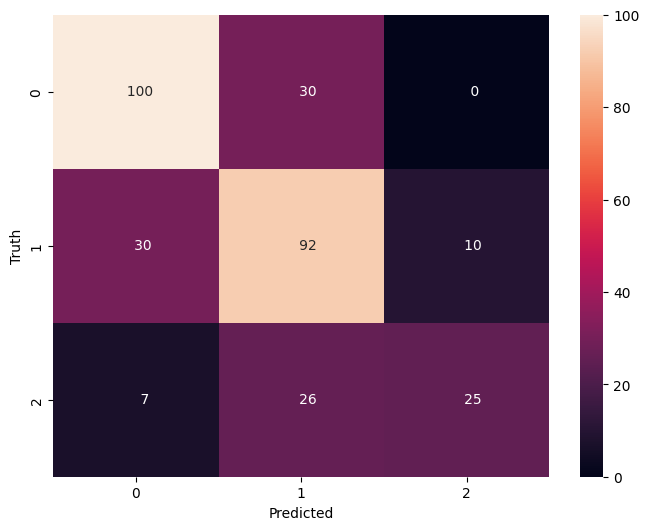

In [177]:
plt.figure(figsize = (8, 6))
sn.heatmap(cm, annot=True, fmt='5g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       130
           1       0.62      0.70      0.66       132
           2       0.71      0.43      0.54        58

    accuracy                           0.68       320
   macro avg       0.69      0.63      0.65       320
weighted avg       0.68      0.68      0.67       320



In [179]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
auc(fpr, tpr)

0.7795472492761253

In [181]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

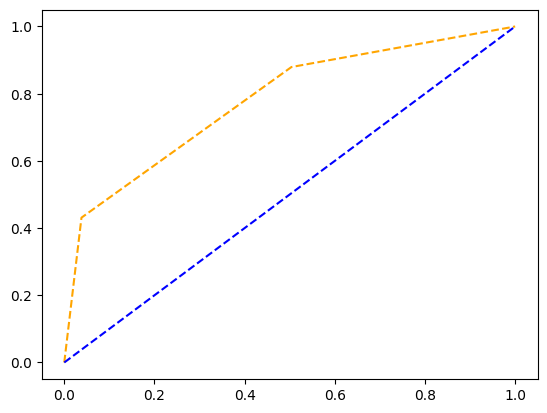

In [182]:
plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.show();